# Acknowledgements

This project is inspired by the JanataHack Machine Learning for IoT competition hosted by Analytics Vidhya. More details can be found [here](https://https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-iot/#ProblemStatement).



# Introduction

As part of an initiative to transform our city into a smart city, the government is focusing on improving the efficiency of its services through digital and intelligent solutions. One critical issue being addressed is traffic management. Efficient traffic flow is crucial for reducing congestion, minimizing delays, and enhancing the overall quality of life for citizens.

To tackle this problem, we aim to implement a robust traffic prediction system by analyzing traffic patterns at four key junctions in the city. These patterns vary significantly between normal working days, holidays, and special occasions, making accurate forecasting essential for infrastructure planning and managing traffic peaks.

# Business Understanding

Our objective is to predict the traffic patterns at these four junctions for the next four months. The historical data spans 20 months and includes records from sensors that collected data at different intervals and periods. This variability presents a challenge in creating accurate forecasts, especially when some junctions provide sparse or limited data.

By developing a reliable traffic prediction algorithm, we will provide the government with the insights necessary to make informed decisions, ultimately contributing to the larger goal of making our city smarter and more efficient.

# Data Importing

In [6]:
# Install the readr package if you haven't already
install.packages("readr")

# Load the readr package
library(readr)

# Read the CSV file
df <- read_csv('/content/train_ML_IOT.csv')

# Display the first few rows of the dataframe
data(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 48120 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (3): Junction, Vehicles, ID
dttm (1): DateTime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in data(df):
“data set ‘df’ not found”


In [7]:
str(df)

spc_tbl_ [48,120 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DateTime: POSIXct[1:48120], format: "2015-11-01 00:00:00" "2015-11-01 01:00:00" ...
 $ Junction: num [1:48120] 1 1 1 1 1 1 1 1 1 1 ...
 $ Vehicles: num [1:48120] 15 13 10 7 9 6 9 8 11 12 ...
 $ ID      : num [1:48120] 2.02e+10 2.02e+10 2.02e+10 2.02e+10 2.02e+10 ...
 - attr(*, "spec")=
  .. cols(
  ..   DateTime = col_datetime(format = ""),
  ..   Junction = col_double(),
  ..   Vehicles = col_double(),
  ..   ID = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


#Data Understanding

In [8]:
junction_counts <- table(df$Junction)
print(junction_counts)


    1     2     3     4 
14592 14592 14592  4344 


In [9]:
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
Vehicles_summary <- summary(df$Vehicles)
print(Vehicles_summary)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   15.00   22.79   29.00  180.00 


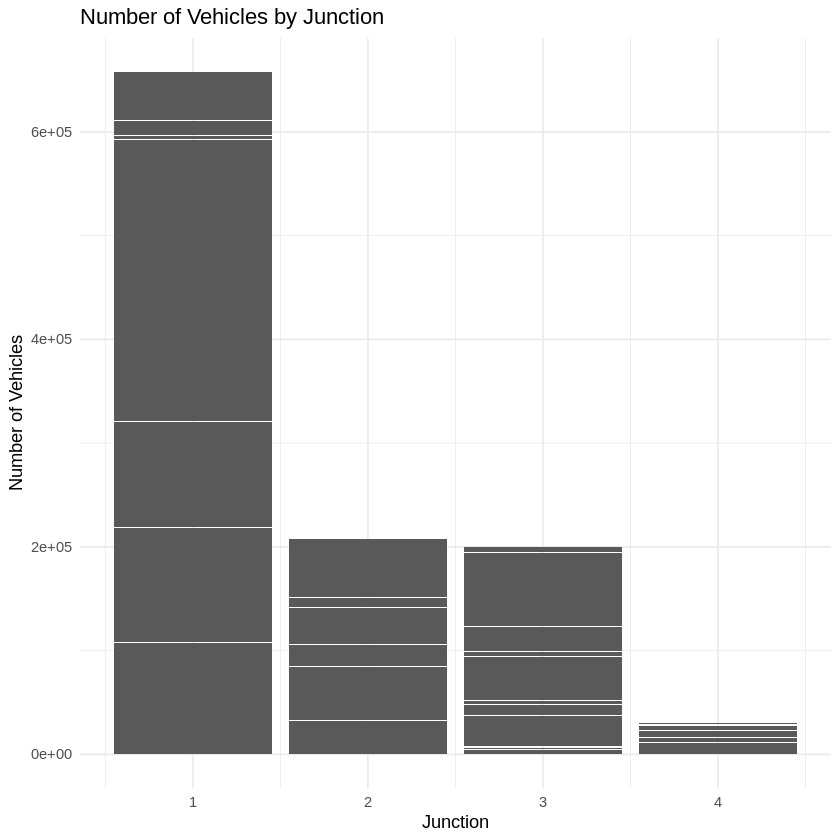

In [11]:
ggplot(data = df, aes(x = Junction, y = Vehicles)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Vehicles by Junction",
       x = "Junction",
       y = "Number of Vehicles") +

  theme_minimal()

# Data Preparation

In [12]:
install.packages("xts")
install.packages("lubridate")

# Load the required libraries
library(xts)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [13]:
df <- df[, !(names(df) %in% c("ID"))]


In [14]:
df <- df[, !(names(df) %in% c("date"))]


In [15]:
df

DateTime            Junction Vehicles
1     2015-11-01 00:00:00 1        15      
2     2015-11-01 01:00:00 1        13      
3     2015-11-01 02:00:00 1        10      
4     2015-11-01 03:00:00 1         7      
5     2015-11-01 04:00:00 1         9      
6     2015-11-01 05:00:00 1         6      
7     2015-11-01 06:00:00 1         9      
8     2015-11-01 07:00:00 1         8      
9     2015-11-01 08:00:00 1        11      
10    2015-11-01 09:00:00 1        12      
11    2015-11-01 10:00:00 1        15      
12    2015-11-01 11:00:00 1        17      
13    2015-11-01 12:00:00 1        16      
14    2015-11-01 13:00:00 1        15      
15    2015-11-01 14:00:00 1        16      
16    2015-11-01 15:00:00 1        12      
17    2015-11-01 16:00:00 1        12      
18    2015-11-01 17:00:00 1        16      
19    2015-11-01 18:00:00 1        17      
20    2015-11-01 19:00:00 1        20      
21    2015-11-01 20:00:00 1        17      
22    2015-11-01 21:00:00 1        19      
23    2015-11-01 22:00:00 1        20      
24    2015-11-01 23:00:00 1        15      
25    2015-11-02 00:00:00 1        14      
26    2015-11-02 01:00:00 1        12      
27    2015-11-02 02:00:00 1        14      
28    2015-11-02 03:00:00 1        12      
29    2015-11-02 04:00:00 1        12      
30    2015-11-02 05:00:00 1        11      
⋮     ⋮                   ⋮        ⋮       
48091 2017-06-29 18:00:00 4        19      
48092 2017-06-29 19:00:00 4         9      
48093 2017-06-29 20:00:00 4        13      
48094 2017-06-29 21:00:00 4        12      
48095 2017-06-29 22:00:00 4        15      
48096 2017-06-29 23:00:00 4        11      
48097 2017-06-30 00:00:00 4         9      
48098 2017-06-30 01:00:00 4         7      
48099 2017-06-30 02:00:00 4         5      
48100 2017-06-30 03:00:00 4         6      
48101 2017-06-30 04:00:00 4         5      
48102 2017-06-30 05:00:00 4         5      
48103 2017-06-30 06:00:00 4         6      
48104 2017-06-30 07:00:00 4         4      
48105 2017-06-30 08:00:00 4         5      
48106 2017-06-30 09:00:00 4         7      
48107 2017-06-30 10:00:00 4        15      
48108 2017-06-30 11:00:00 4        14      
48109 2017-06-30 12:00:00 4         9      
48110 2017-06-30 13:00:00 4        11      
48111 2017-06-30 14:00:00 4        10      
48112 2017-06-30 15:00:00 4        14      
48113 2017-06-30 16:00:00 4        16      
48114 2017-06-30 17:00:00 4        16      
48115 2017-06-30 18:00:00 4        17      
48116 2017-06-30 19:00:00 4        11      
48117 2017-06-30 20:00:00 4        30      
48118 2017-06-30 21:00:00 4        16      
48119 2017-06-30 22:00:00 4        22      
48120 2017-06-30 23:00:00 4        12

In [16]:
str(df)

tibble [48,120 × 3] (S3: tbl_df/tbl/data.frame)
 $ DateTime: POSIXct[1:48120], format: "2015-11-01 00:00:00" "2015-11-01 01:00:00" ...
 $ Junction: num [1:48120] 1 1 1 1 1 1 1 1 1 1 ...
 $ Vehicles: num [1:48120] 15 13 10 7 9 6 9 8 11 12 ...


In [17]:
length(which(is.na(df)==TRUE))

[1] 0

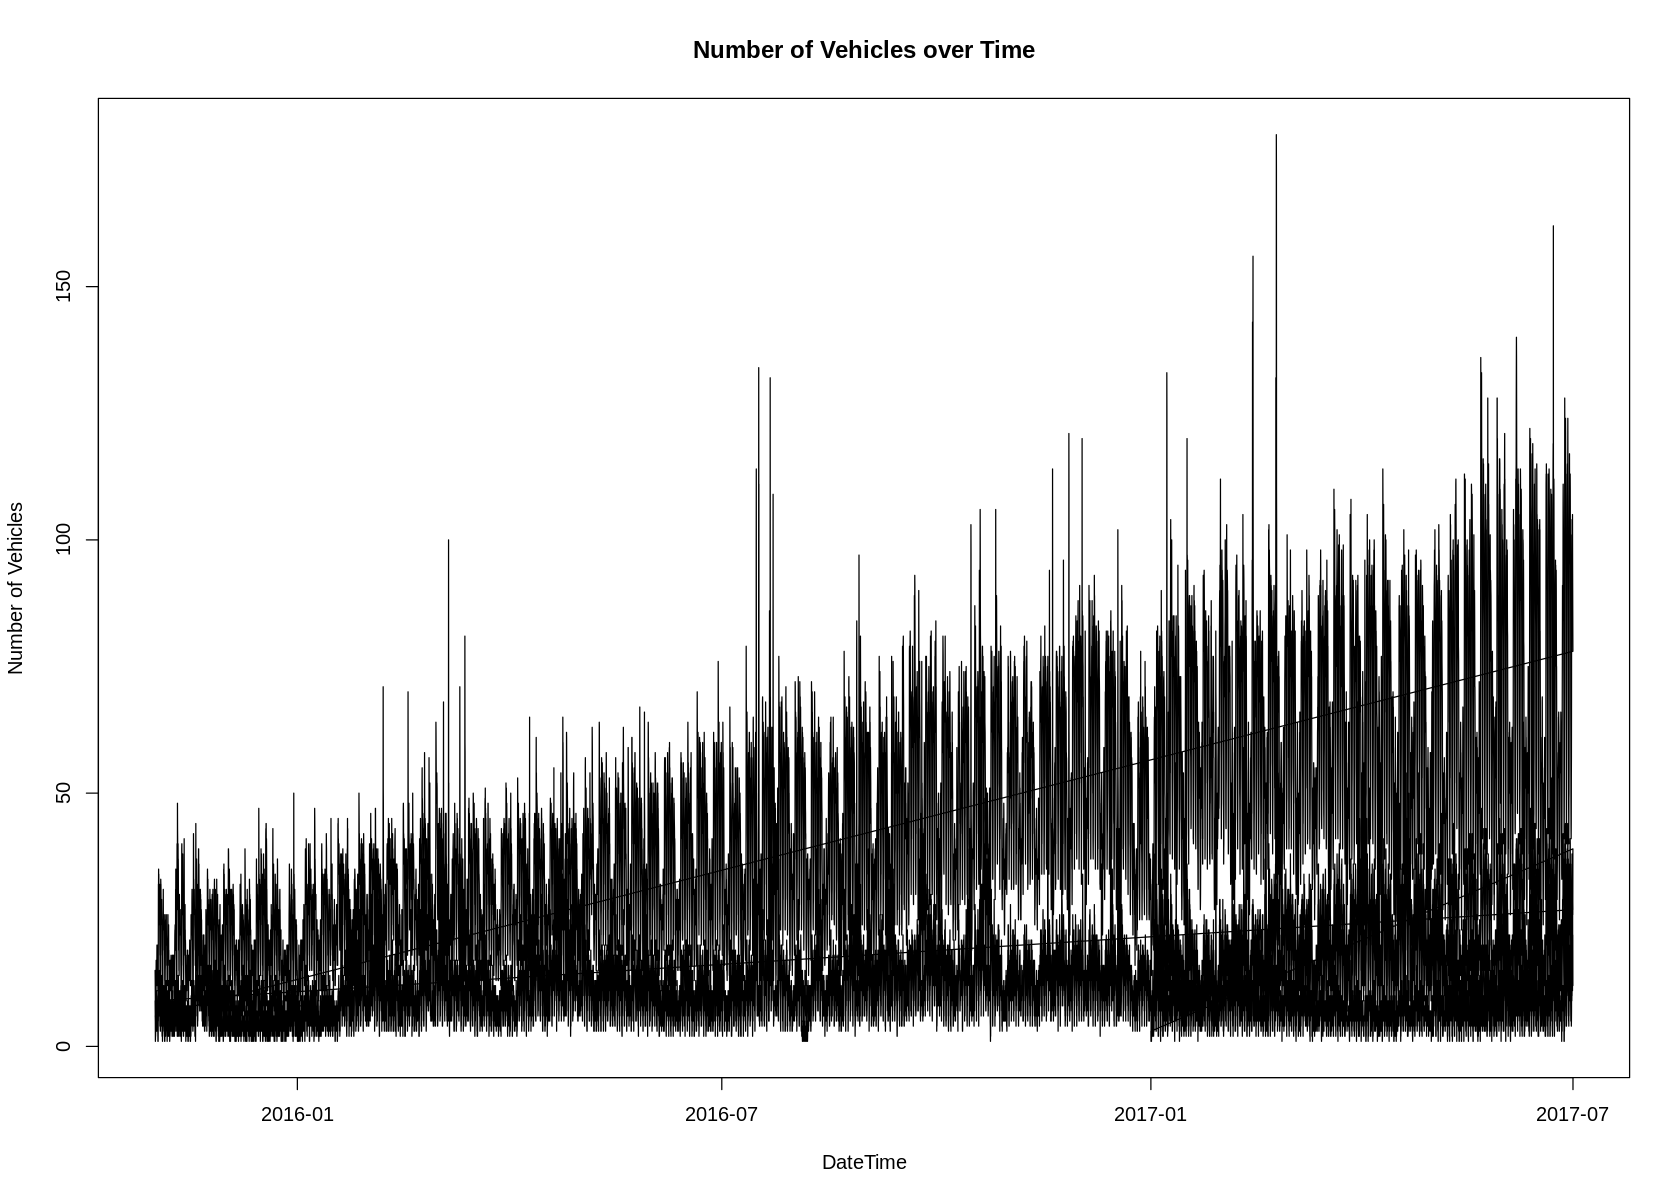

In [18]:
options(repr.plot.width = 14, repr.plot.height = 10)

# Determine the range for the x-axis
max_date <- max(df$DateTime)
min_date <- min(df$DateTime)
range_date <- c(min_date, max_date)

# Plotting with a larger scale for the x-axis and y-axis
plot(df$DateTime, df$Vehicles, type = "l",
     xlab = "DateTime", ylab = "Number of Vehicles",
     main = "Number of Vehicles over Time",
     xlim = range_date)

## Split junctions

In [19]:
junction_datasets <- split(df, df$Junction)

# Assign each dataset to separate variables
dfJ1 <- junction_datasets[[1]]
dfJ2 <- junction_datasets[[2]]
dfJ3 <- junction_datasets[[3]]
dfJ4 <- junction_datasets[[4]]

In [20]:
# Drop the Junction column from each dataset
dfJ1 <- subset(dfJ1, select = -Junction)
dfJ2 <- subset(dfJ2, select = -Junction)
dfJ3 <- subset(dfJ3, select = -Junction)
dfJ4 <- subset(dfJ4, select = -Junction)


In [21]:
num_rows <- nrow(dfJ4)

# Number of variables (columns)
num_vars <- ncol(dfJ4)

# Print the results
print(num_rows)  # Number of rows
print(num_vars)  # Number of variables

[1] 4344
[1] 2


In [22]:
dfJ1_xts <- xts(dfJ1$Vehicles, order.by = dfJ1$DateTime)
str(dfJ1_xts)
start(dfJ1_xts)
end(dfJ1_xts)

An xts object on 2015-11-01 / 2017-06-30 23:00:00 containing: 
  Data:    double [14592, 1]
  Index:   POSIXct,POSIXt [14592] (TZ: "UTC")


[1] "2015-11-01 UTC"

[1] "2017-06-30 23:00:00 UTC"

In [23]:
dfJ2_xts <- xts(dfJ2$Vehicles, order.by = dfJ2$DateTime)
str(dfJ2_xts)
start(dfJ2_xts)
end(dfJ2_xts)

An xts object on 2015-11-01 / 2017-06-30 23:00:00 containing: 
  Data:    double [14592, 1]
  Index:   POSIXct,POSIXt [14592] (TZ: "UTC")


[1] "2015-11-01 UTC"

[1] "2017-06-30 23:00:00 UTC"

In [24]:
dfJ3_xts <- xts(dfJ3$Vehicles, order.by = dfJ3$DateTime)
str(dfJ3_xts)
start(dfJ3_xts)
end(dfJ3_xts)

An xts object on 2015-11-01 / 2017-06-30 23:00:00 containing: 
  Data:    double [14592, 1]
  Index:   POSIXct,POSIXt [14592] (TZ: "UTC")


[1] "2015-11-01 UTC"

[1] "2017-06-30 23:00:00 UTC"

In [25]:
dfJ4_xts <- xts(dfJ4$Vehicles, order.by = dfJ4$DateTime)
str(dfJ4_xts)
start(dfJ4_xts)
end(dfJ4_xts)

An xts object on 2017-01-01 / 2017-06-30 23:00:00 containing: 
  Data:    double [4344, 1]
  Index:   POSIXct,POSIXt [4344] (TZ: "UTC")


[1] "2017-01-01 UTC"

[1] "2017-06-30 23:00:00 UTC"

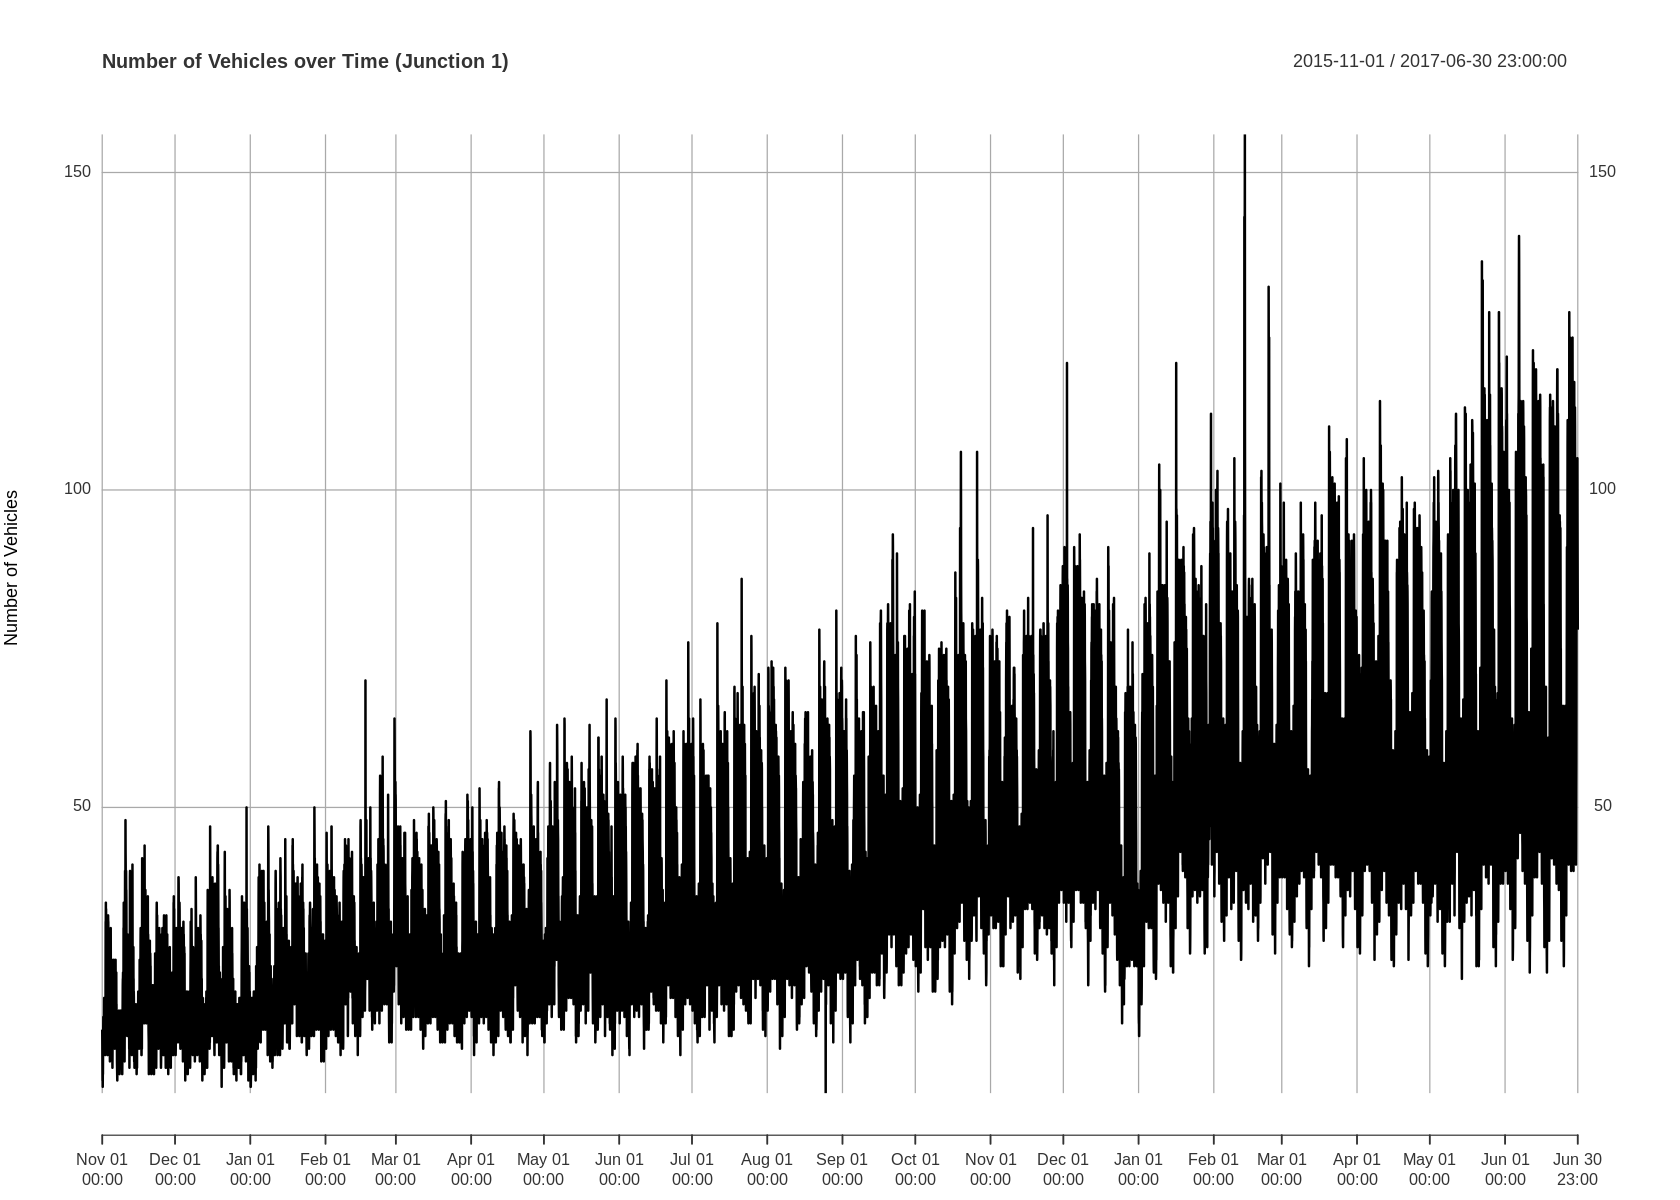

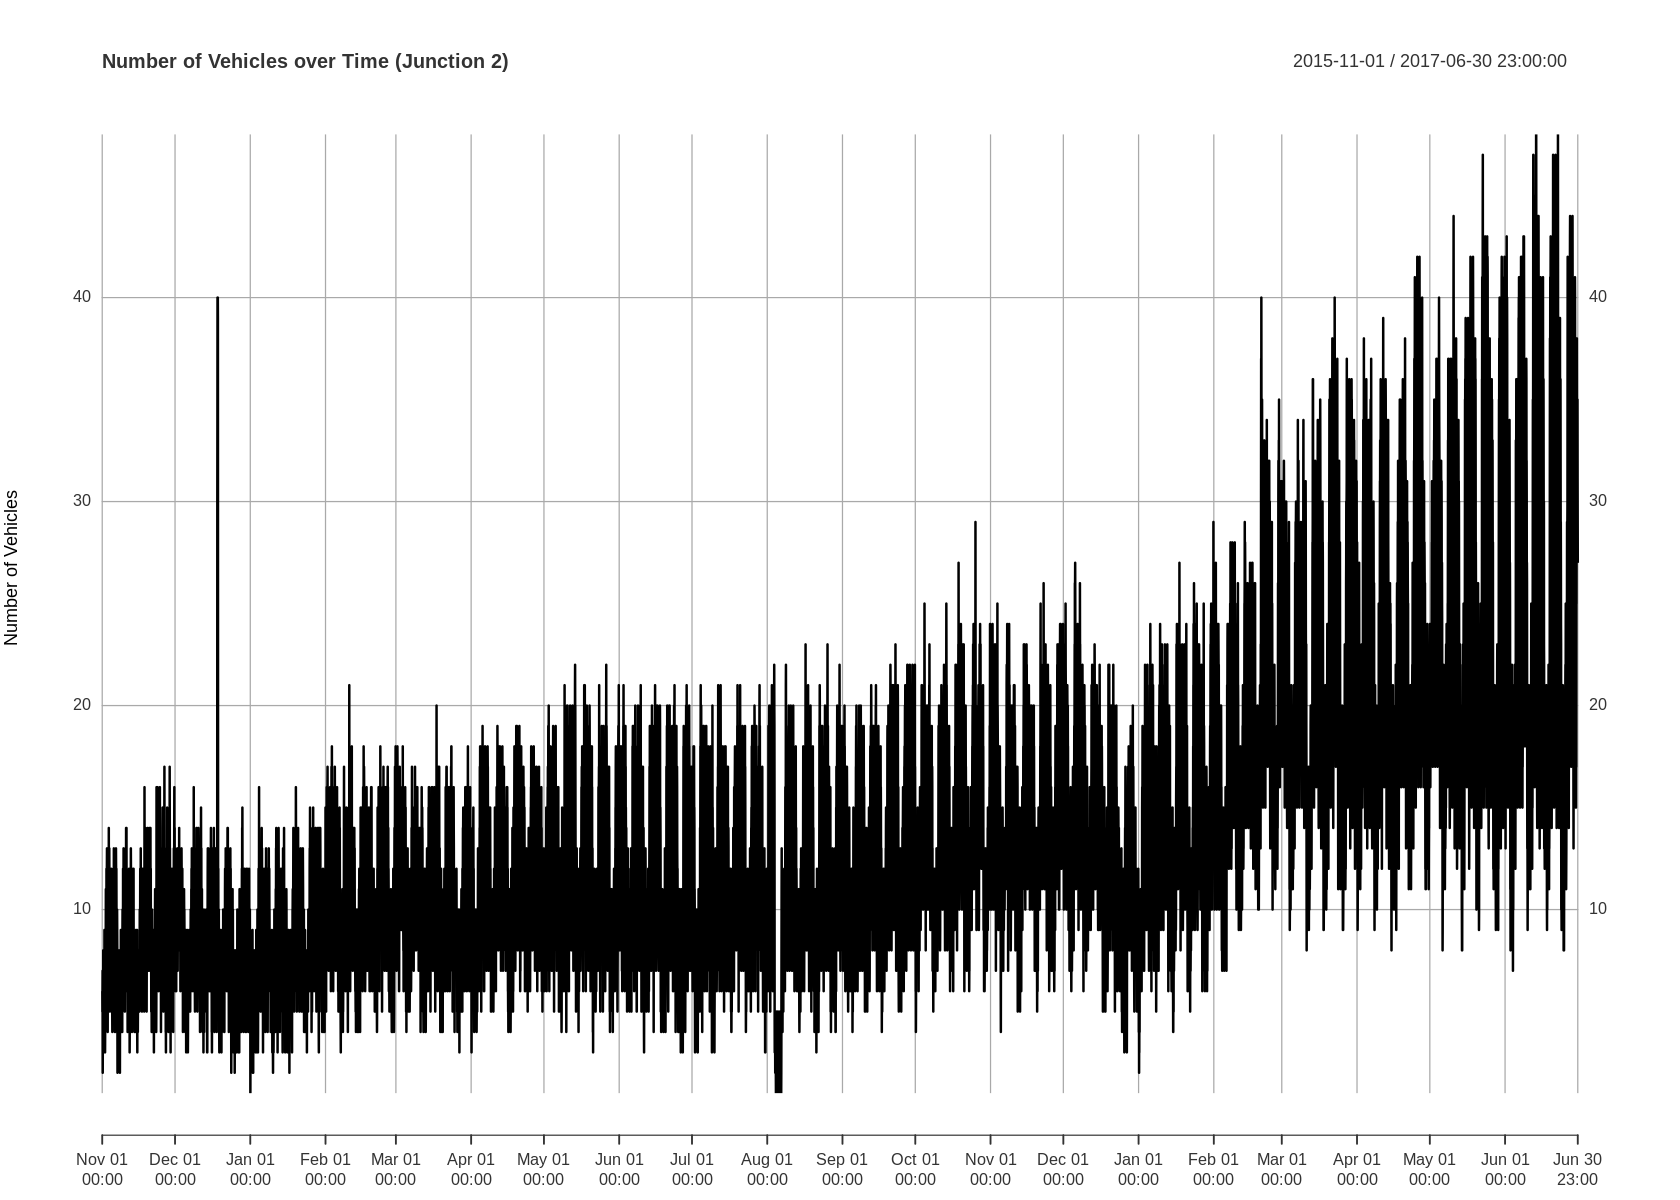

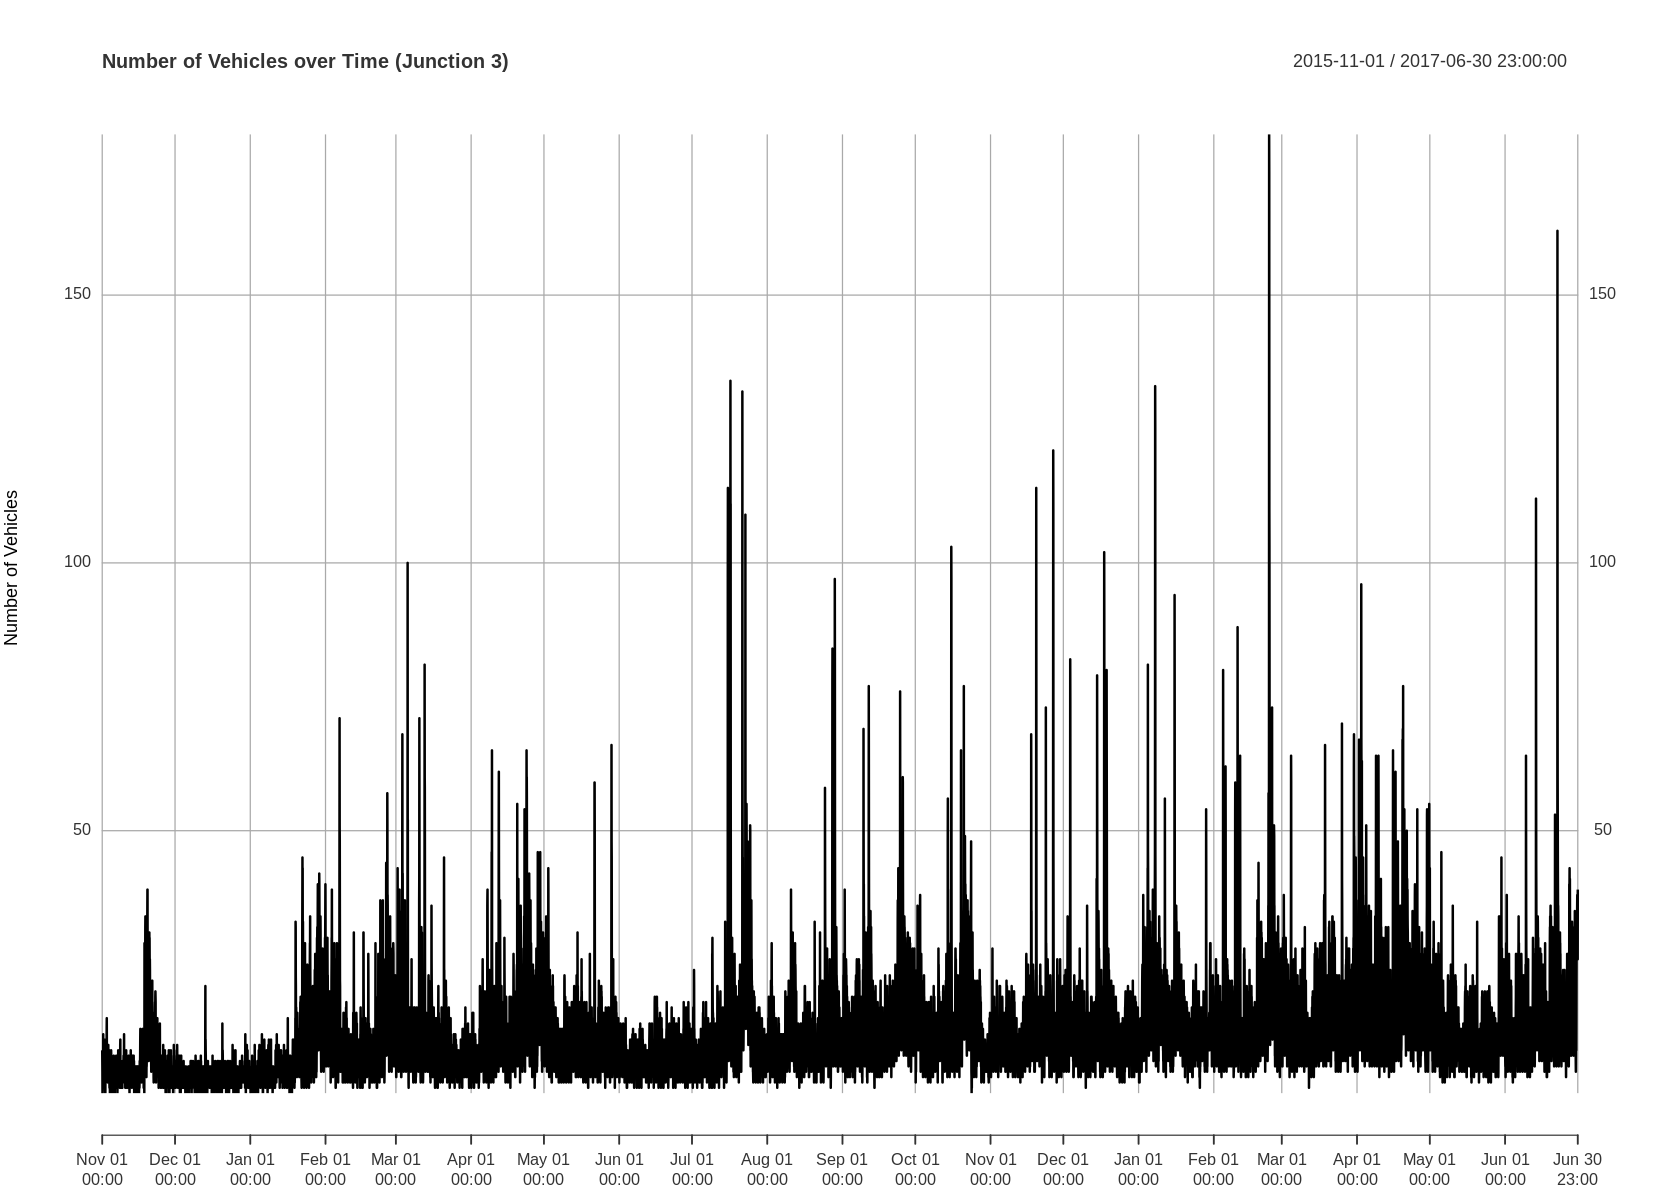

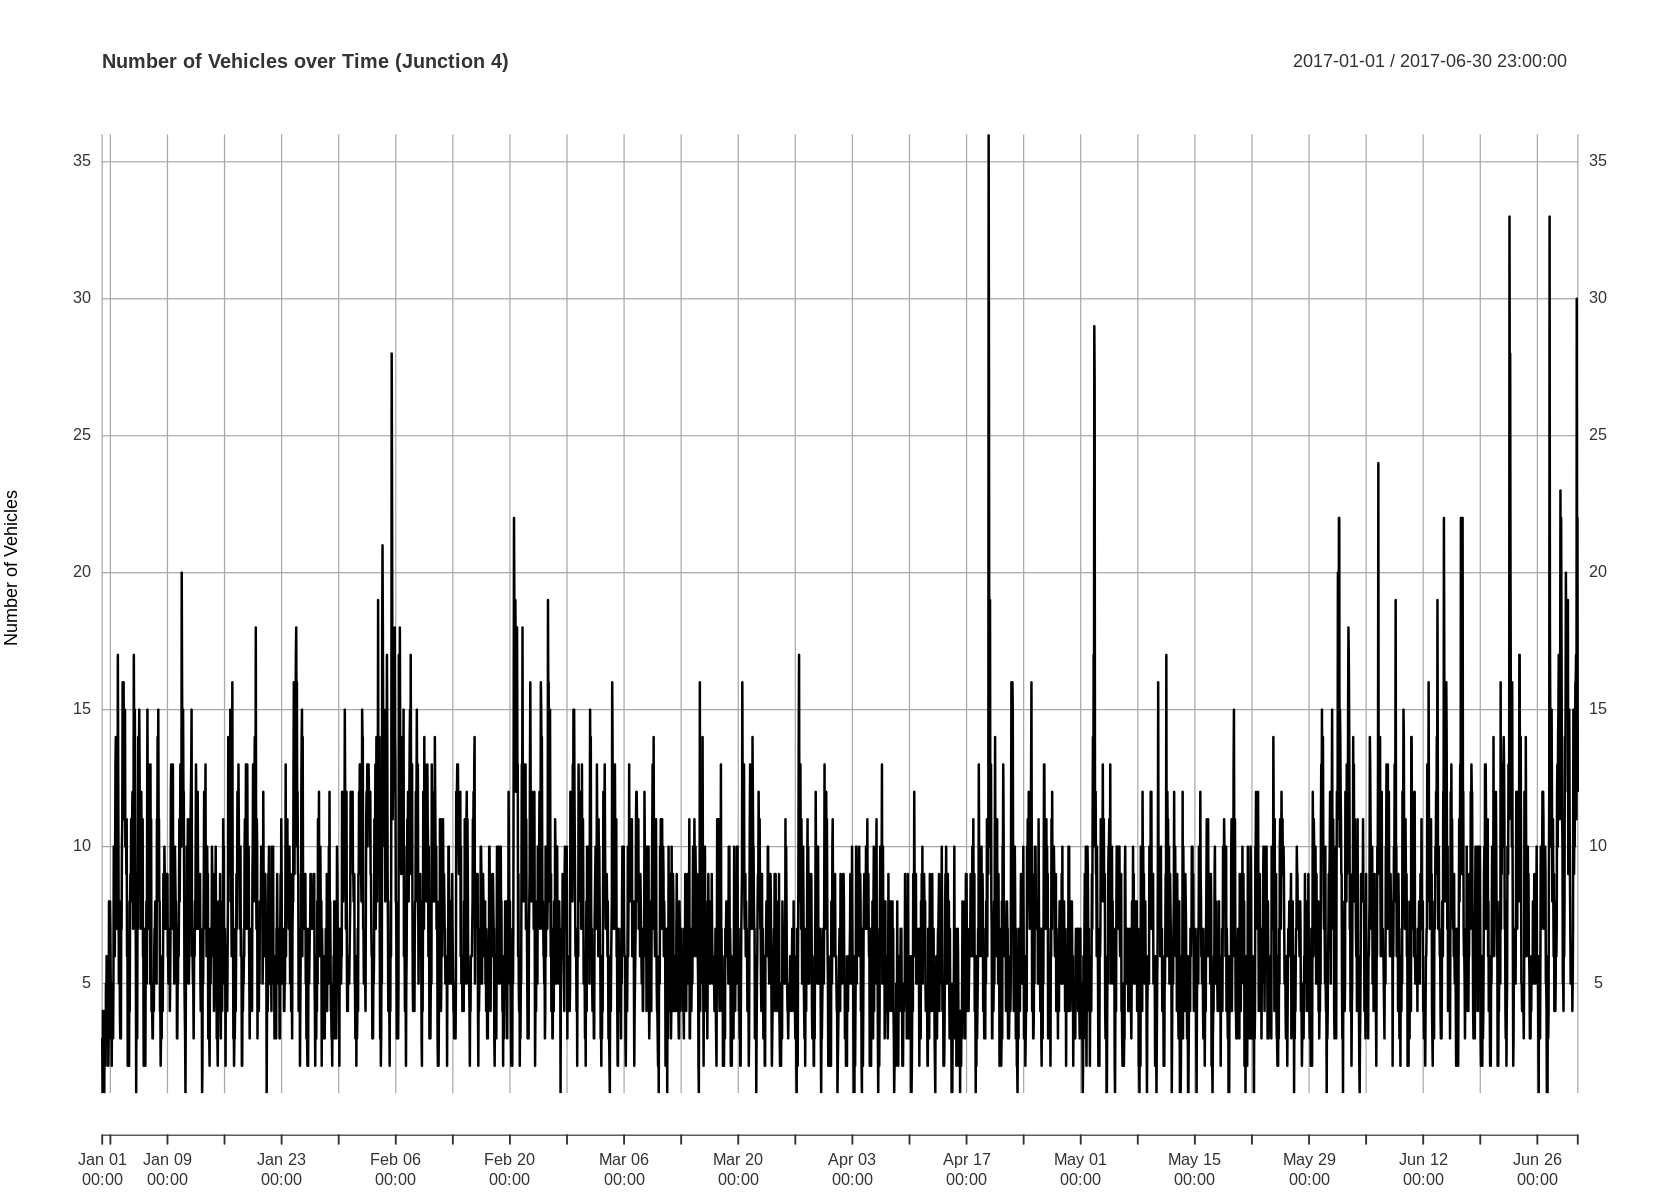

In [27]:
# Set the size of the plot
options(repr.plot.width = 14, repr.plot.height = 10)

# Plotting dfJ1_xts with a larger and clearer visualization
plot(dfJ1_xts, main = "Number of Vehicles over Time (Junction 1)",
     xlab = "DateTime", ylab = "Number of Vehicles",
     xlim = c(start(dfJ1_xts), end(dfJ1_xts)),
     lwd = 2)  # Customize line color and thickness
grid()

# Plotting dfJ2_xts with a larger and clearer visualization
plot(dfJ2_xts, main = "Number of Vehicles over Time (Junction 2)",
     xlab = "DateTime", ylab = "Number of Vehicles",
     xlim = c(start(dfJ2_xts), end(dfJ2_xts)),
     lwd = 2)  # Customize line color and thickness
grid()

# Plotting dfJ3_xts with a larger and clearer visualization
plot(dfJ3_xts, main = "Number of Vehicles over Time (Junction 3)",
     xlab = "DateTime", ylab = "Number of Vehicles",
     xlim = c(start(dfJ3_xts), end(dfJ3_xts)),
     lwd = 2)  # Customize line color and thickness
grid()

# Plotting dfJ4_xts with a larger and clearer visualization
plot(dfJ4_xts, main = "Number of Vehicles over Time (Junction 4)",
     xlab = "DateTime", ylab = "Number of Vehicles",
     xlim = c(start(dfJ4_xts), end(dfJ4_xts)),
     lwd = 2)  # Customize line color and thickness
grid()

=>The time series plots of hourly observations of number of vehicules per junction data over two years show :

Junction1: a steady upward trend, indicating that the nbr of vehicules have been increasing over time. There are clear seasonal patterns, suggesting a seasonal effect. The data exhibit high volatility, with fluctuations increasing during certain periods, indicating periods of high variability. The series does not appear to be stationary due to the presence of trends and seasonal effects, indicating that further analysis are necessary.

Junction2: a steady upward trend, indicating that the nbr of vehicules have been increasing over time. There are clear seasonal patterns, suggesting a seasonal effect. The data exhibit high volatility, with fluctuations increasing during certain periods, indicating periods of high variability. The series does not appear to be stationary due to the presence of trends and seasonal effects, indicating that further analysis are necessary. We also notice the presence of some ouliers where the nbr of vehicules is to high compared to the rest of the serie.

Junction3: The data exhibit high volatility, with fluctuations increasing during certain periods, indicating periods of high variability. Additionally, there is significant noise present, showing irregular variations.

Junction4: No trend is really visible, indicating that the nbr of vehicules is overall constant over time. There are clear seasonal patterns, suggesting a seasonal effect. The fluctuations appear constant over time.We also notice the presence of some ouliers where the nbr of vehicules is to high compared to the rest of the serie.

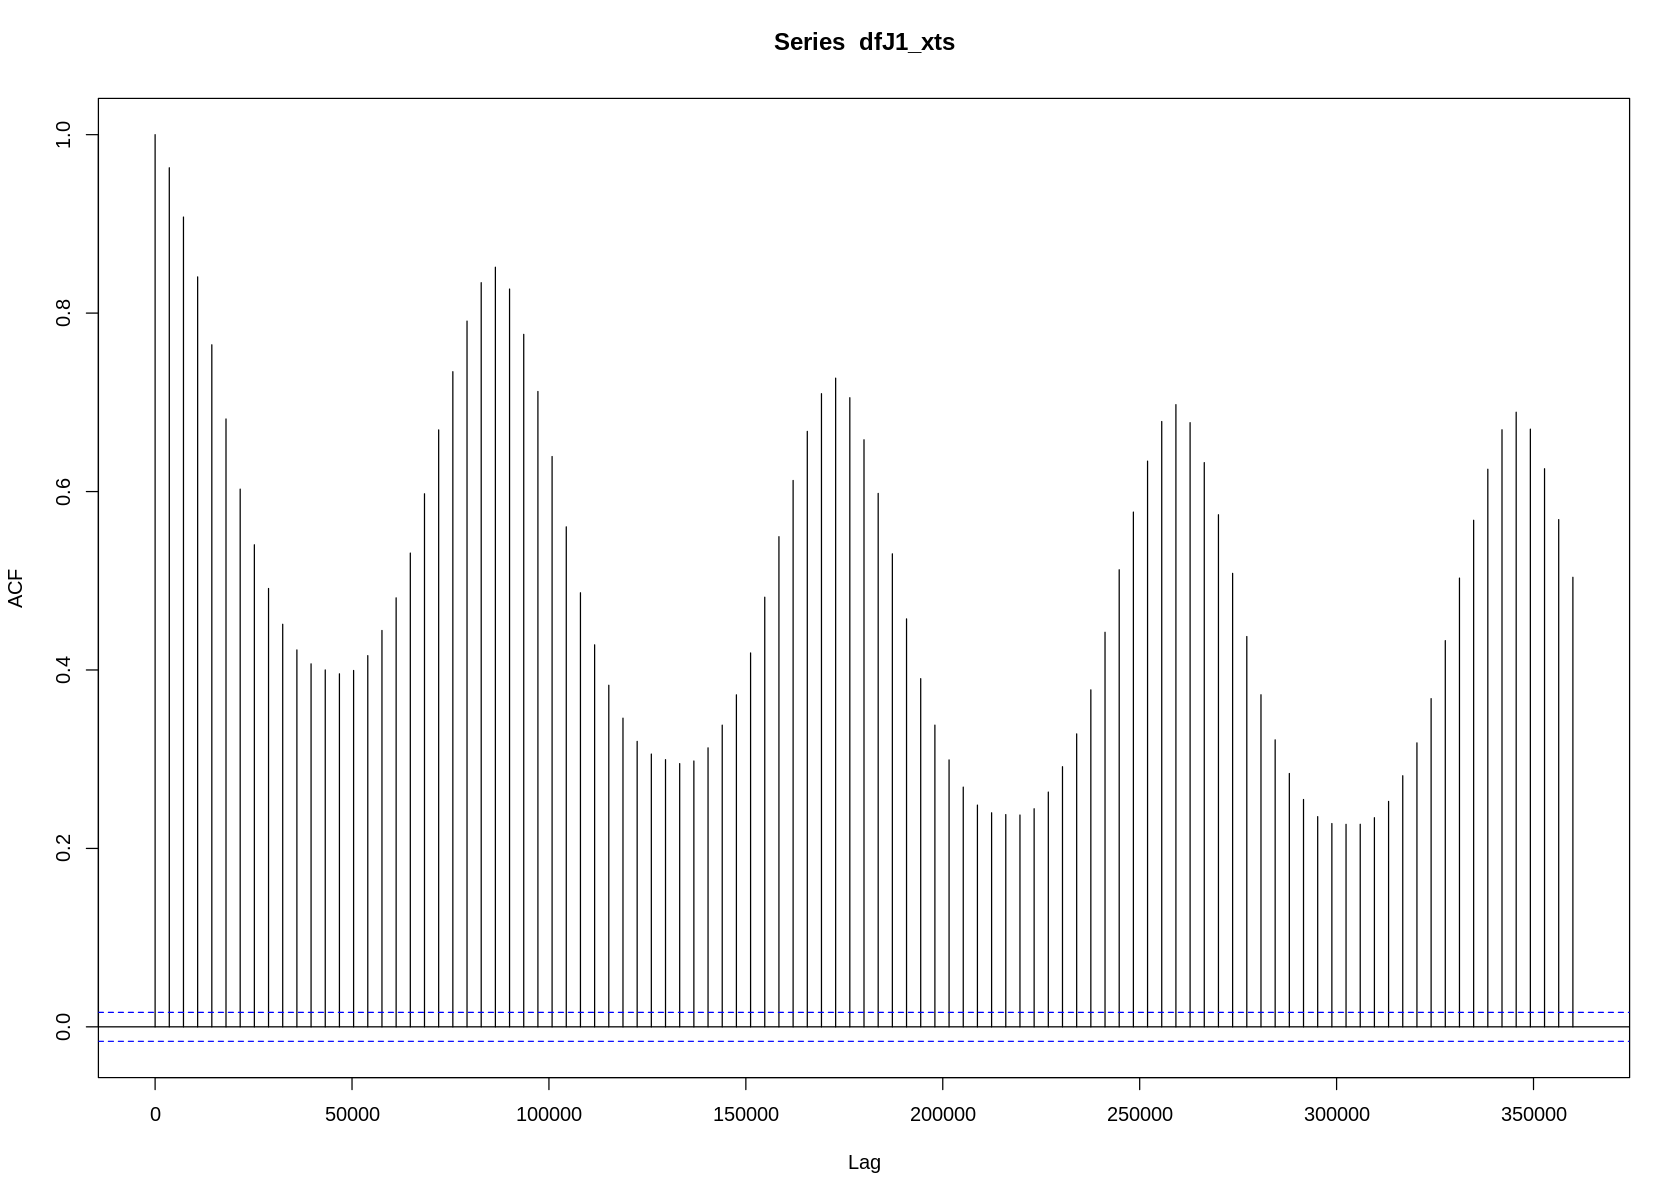

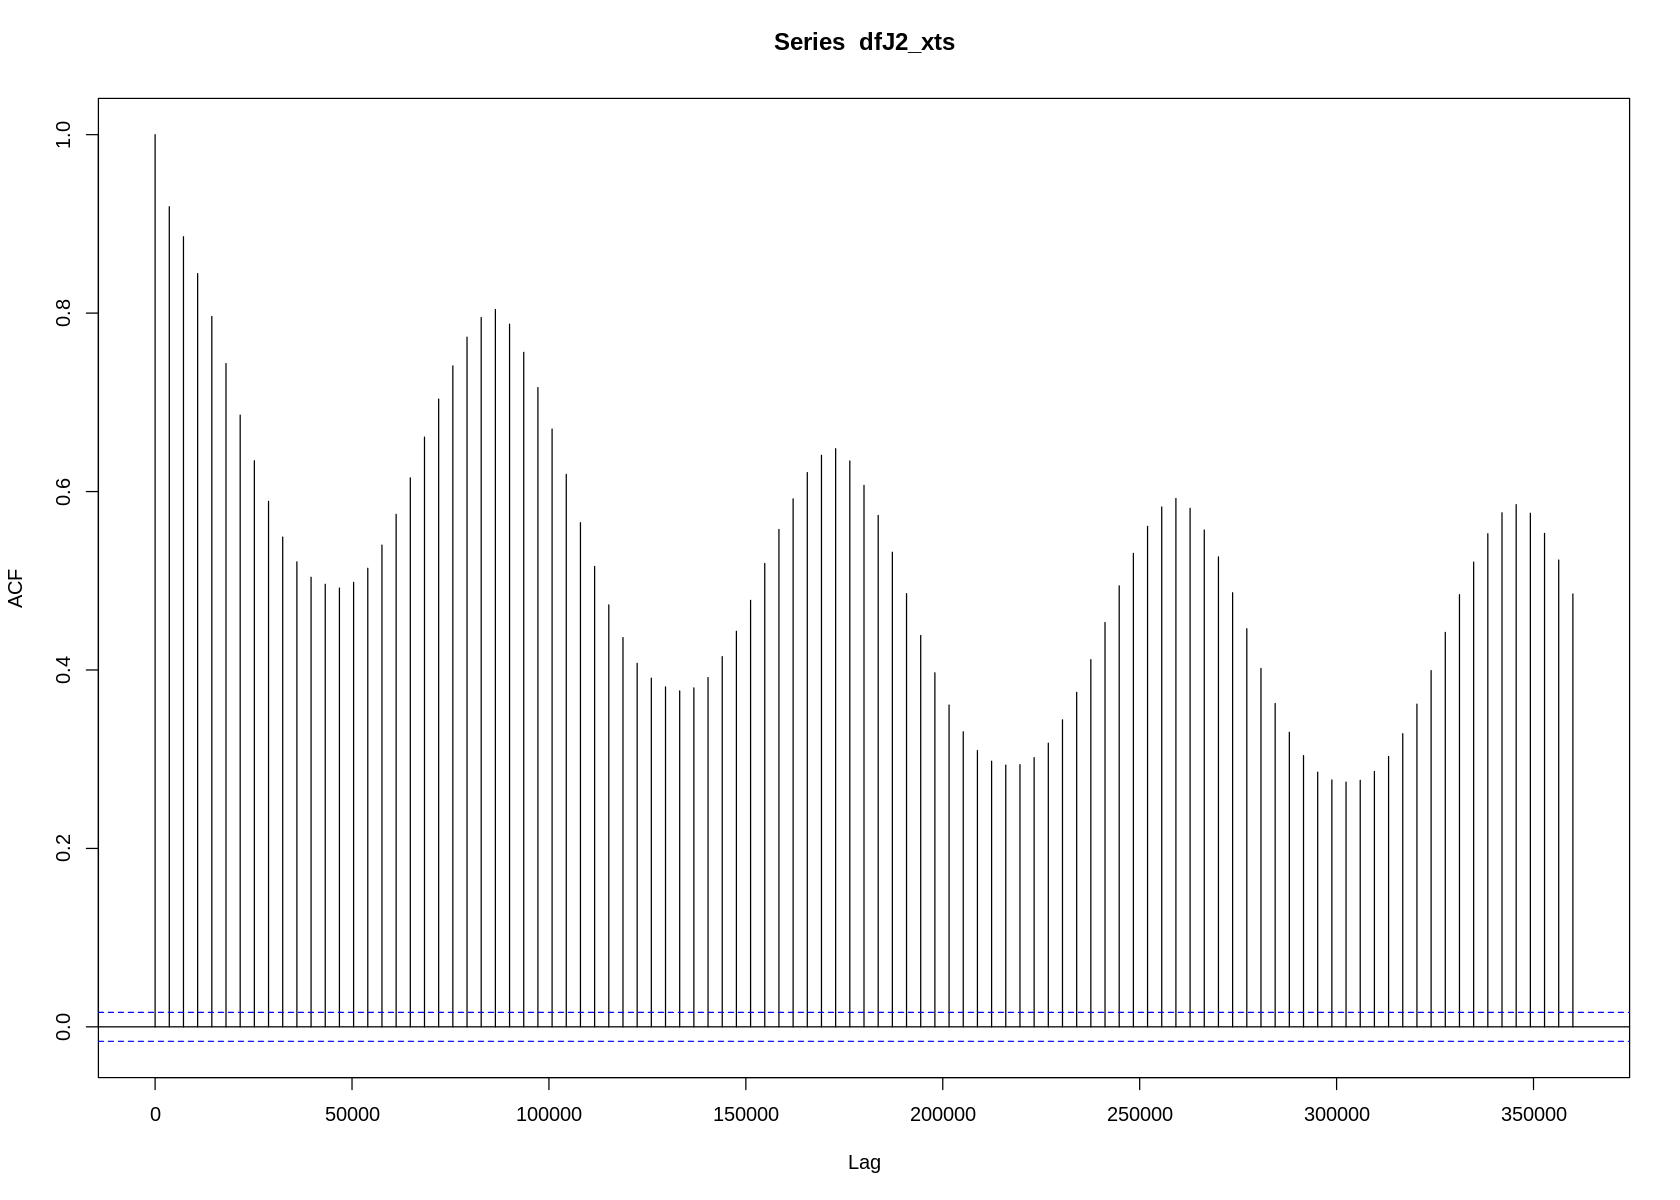

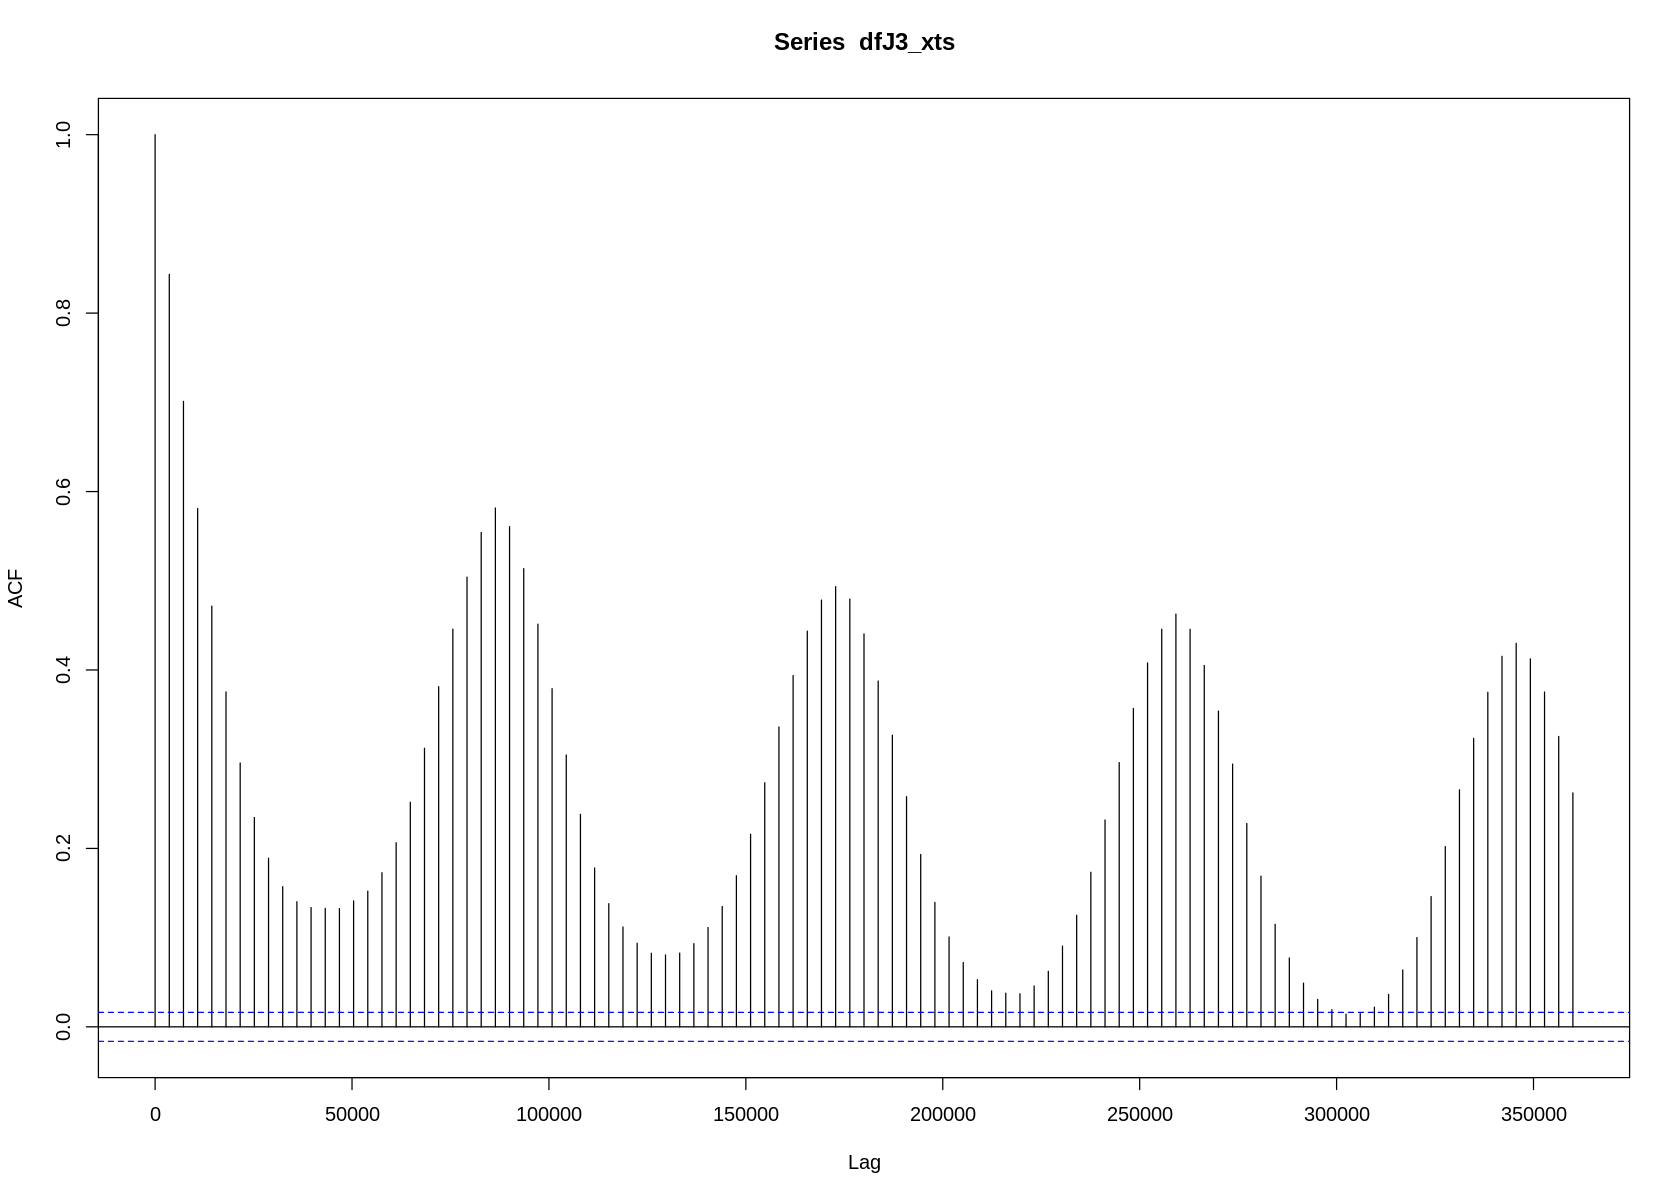

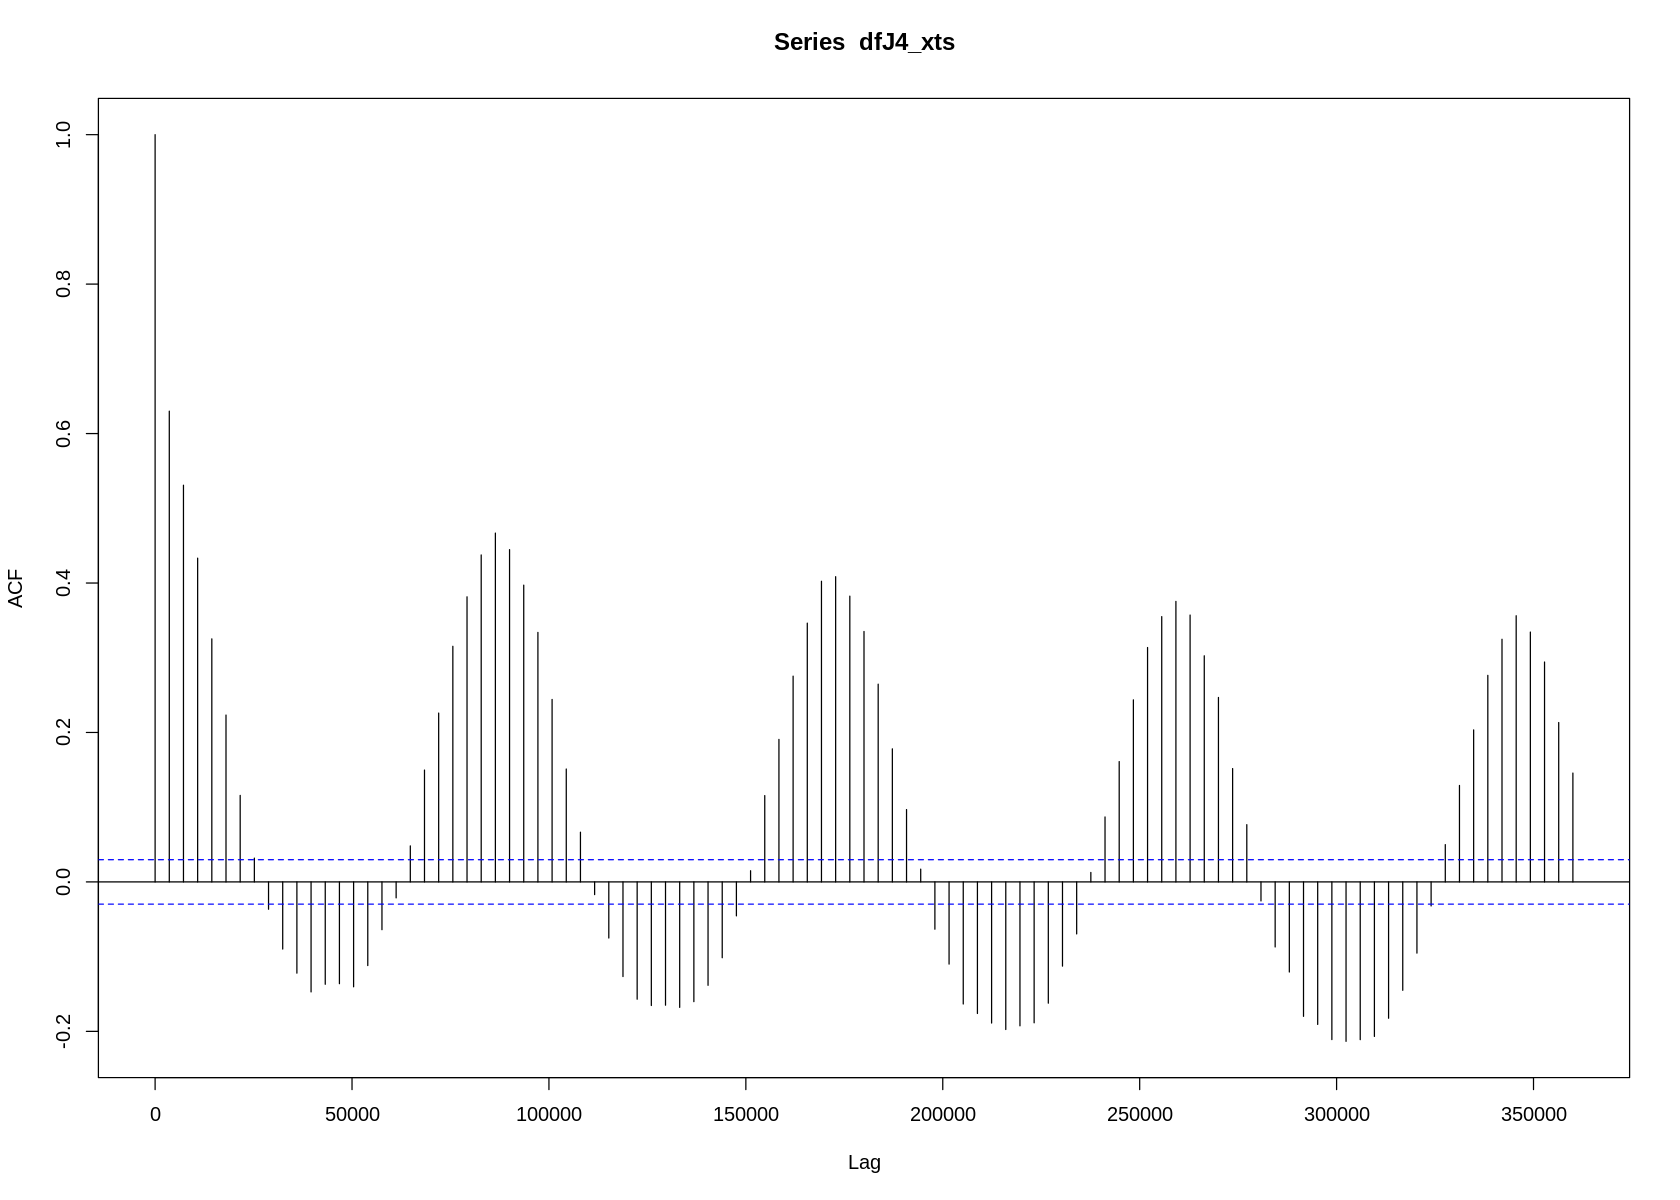

In [28]:
acf(dfJ1_xts,lag=100)
acf(dfJ2_xts,lag=100)
acf(dfJ3_xts,lag=100)
acf(dfJ4_xts,lag=100)


=> The 4 acf plots have comman carateristics has a slow decay which confirms our hypothesis of the presence of a trend as well as a damped repetitive behaviour which informs us about the presence of a seasonality.

due to the high numbeer of observation registered per hour we decide to aggregate data and handle it on daily basis

In [29]:
index_date <- as.Date(index(dfJ1_xts))

# Aggregate data by day
dfJ1_xts_daily <- period.apply(dfJ1_xts, endpoints(index_date, "days"), FUN = sum)
dfJ2_xts_daily <- period.apply(dfJ2_xts, endpoints(index_date, "days"), FUN = sum)
dfJ3_xts_daily <- period.apply(dfJ3_xts, endpoints(index_date, "days"), FUN = sum)
#dfJ4_xts_daily <- period.apply(dfJ4_xts, endpoints(index_date, "days"), FUN = sum)


In [30]:
library(xts)

# Ensure the data is correctly formatted and indexed
dfJ4_xts <- as.xts(dfJ4_xts)

# Define the index_date based on the index of the xts object
index_date <- index(dfJ4_xts)

# Calculate endpoints for daily periods
endpoints <- endpoints(index_date, "days")

# Check the endpoints to ensure they are within valid range
if (length(endpoints) <= 1) {
    stop("The endpoints function did not return enough periods.")
}

# Check if any endpoint is out of bounds
if (any(endpoints > nrow(dfJ4_xts))) {
    stop("Some endpoint indices are out of bounds.")
}

# Apply the sum function to each period defined by endpoints
dfJ4_xts_daily <- period.apply(dfJ4_xts, INDEX = endpoints, FUN = sum)

# Print the result
print(dfJ4_xts_daily)


Warning message:
“object timezone ('UTC') is different from system timezone ('')
  NOTE: set 'options(xts_check_TZ = FALSE)' to disable this warning
    This note is displayed once per session”


                    m.c.seq.row..seq.n...seq.col..drop...FALSE.
2017-01-01 23:00:00                                          93
2017-01-02 23:00:00                                         182
2017-01-03 23:00:00                                         229
2017-01-04 23:00:00                                         192
2017-01-05 23:00:00                                         234
2017-01-06 23:00:00                                         185
2017-01-07 23:00:00                                         183
2017-01-08 23:00:00                                         158
2017-01-09 23:00:00                                         193
2017-01-10 23:00:00                                         230
                ...                                            
2017-06-21 23:00:00                                         200
2017-06-22 23:00:00                                         290
2017-06-23 23:00:00                                         220
2017-06-24 23:00:00                     

In [31]:
daily_counts <- apply.daily(dfJ4_xts, sum)


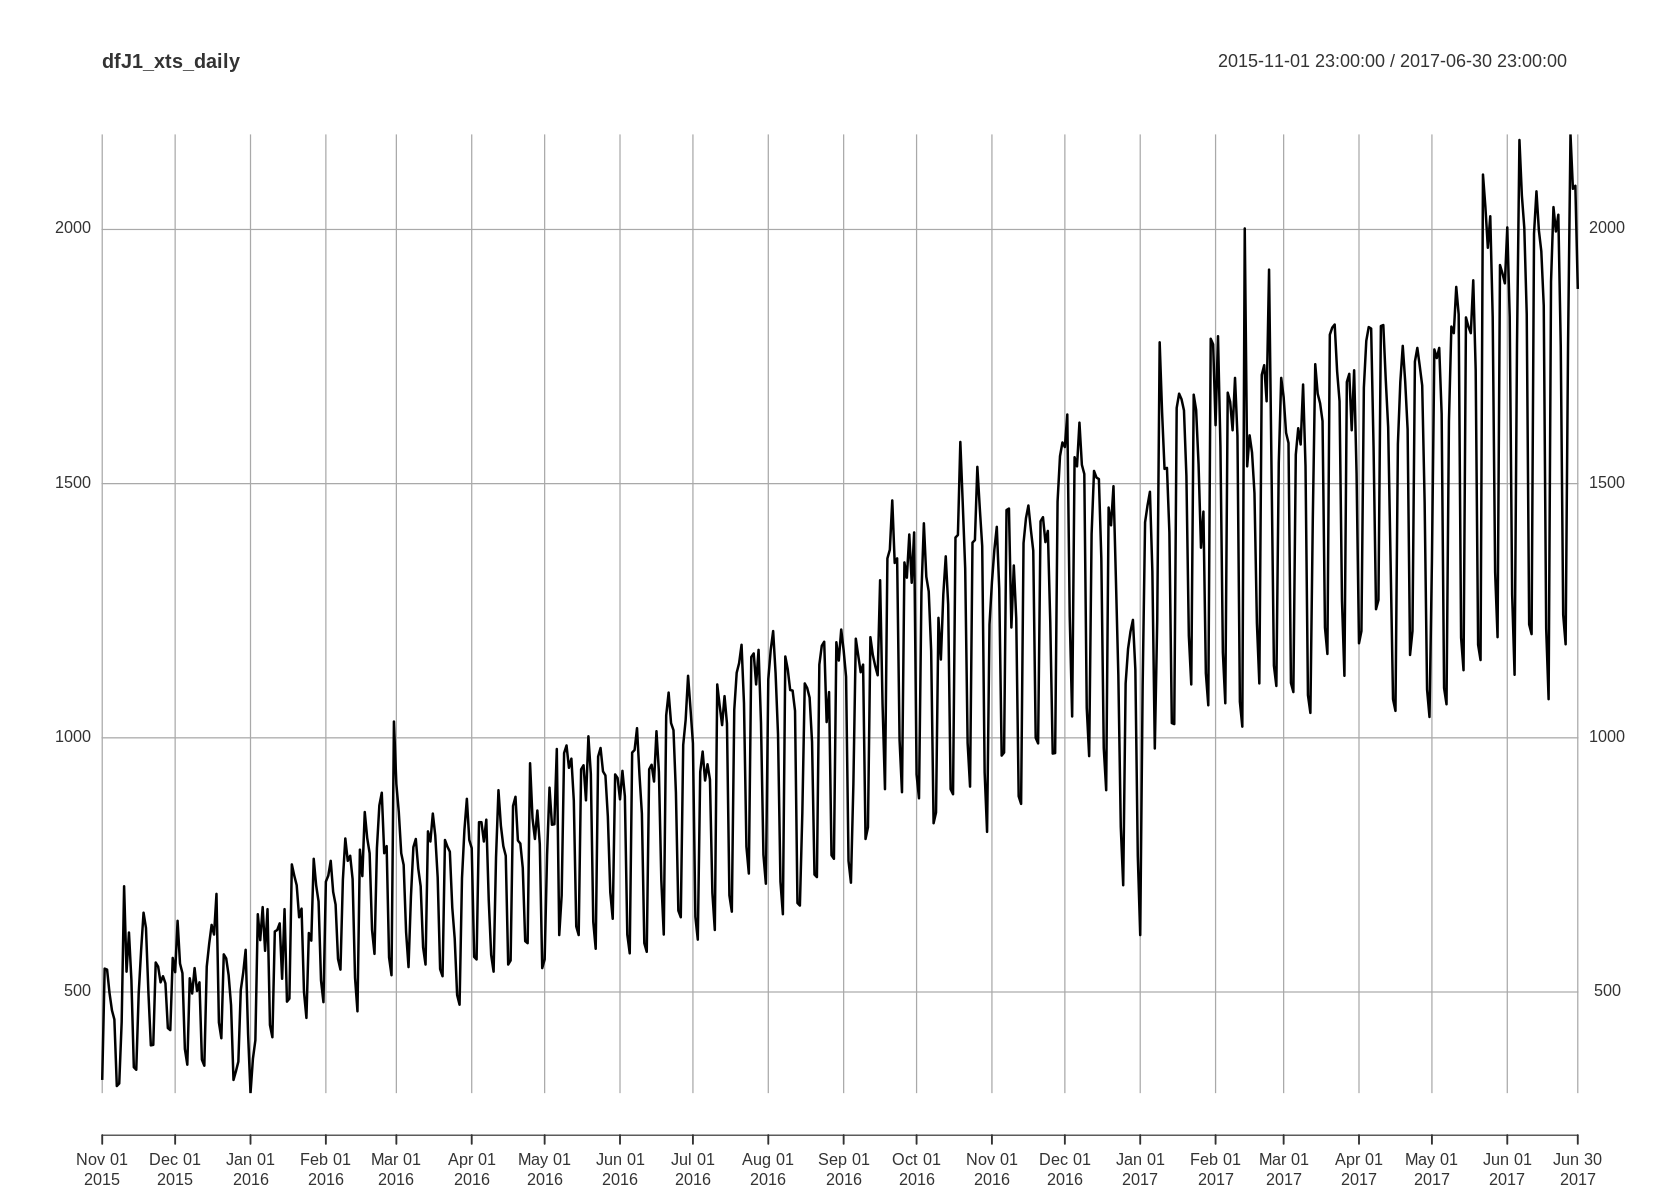

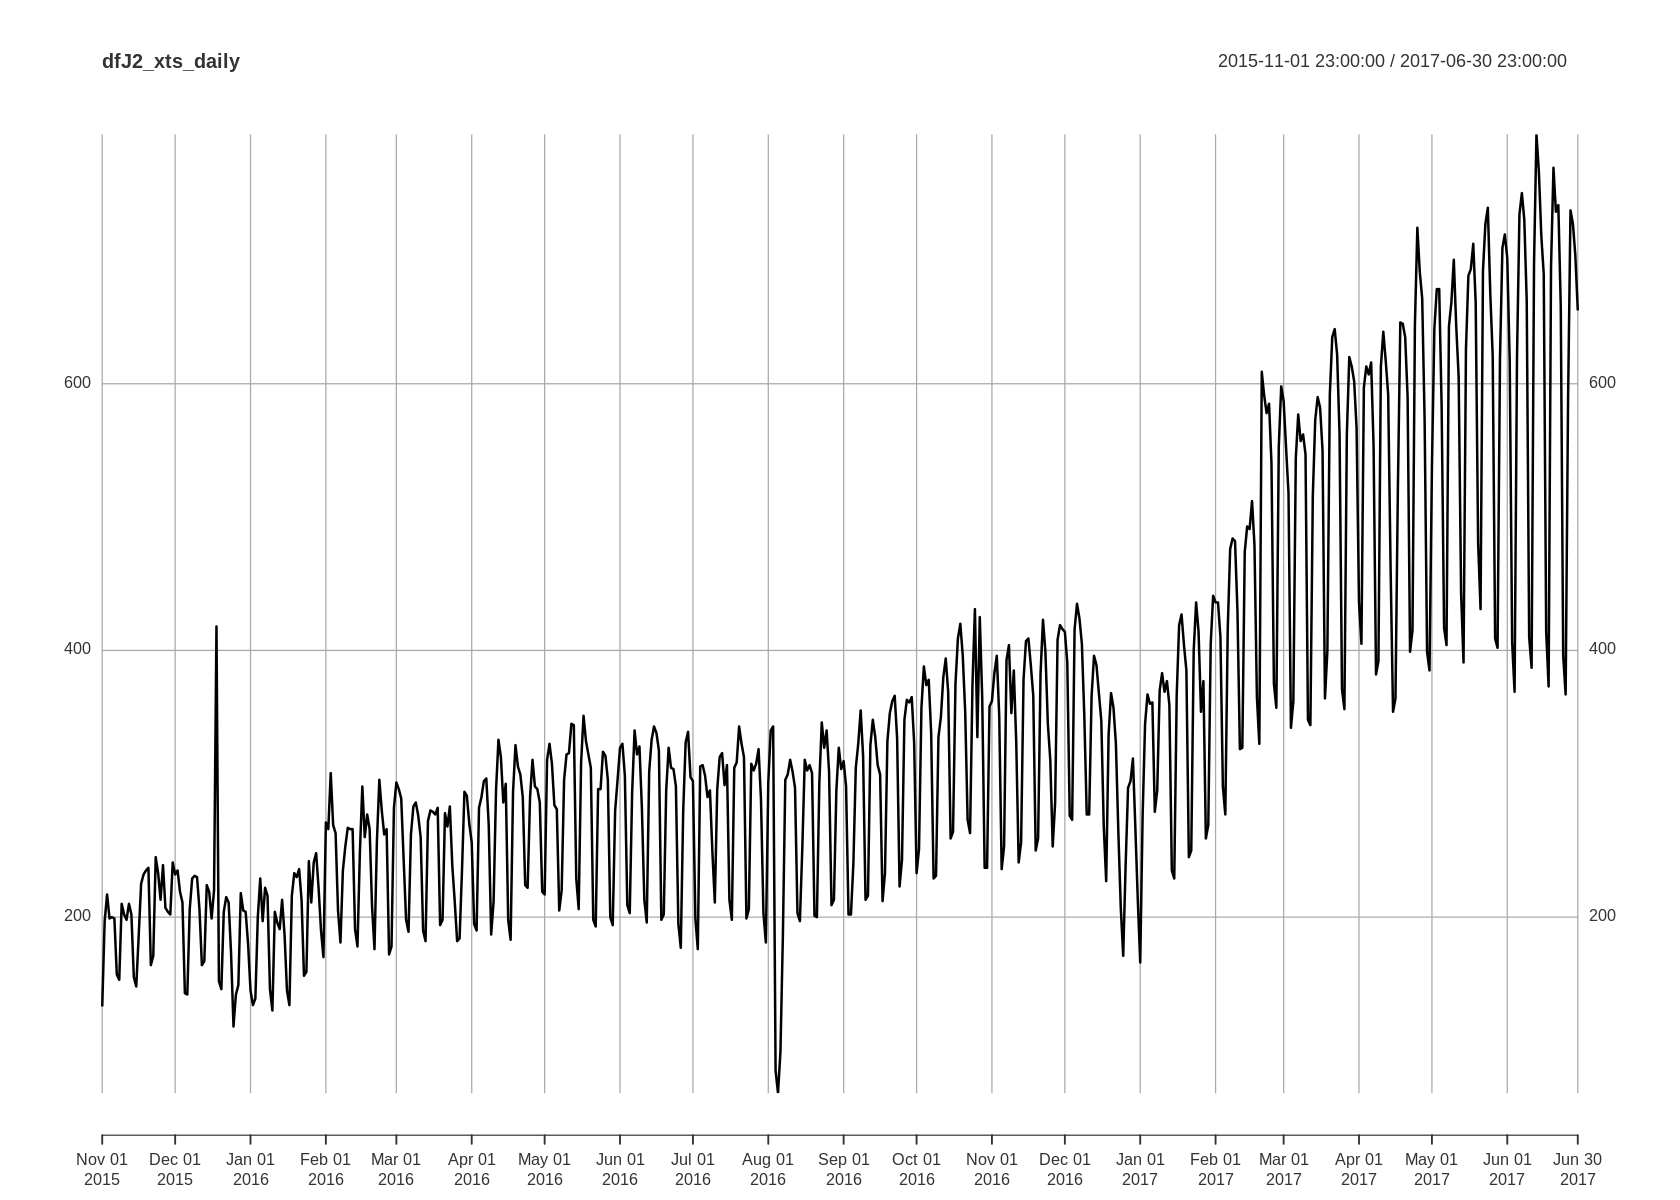

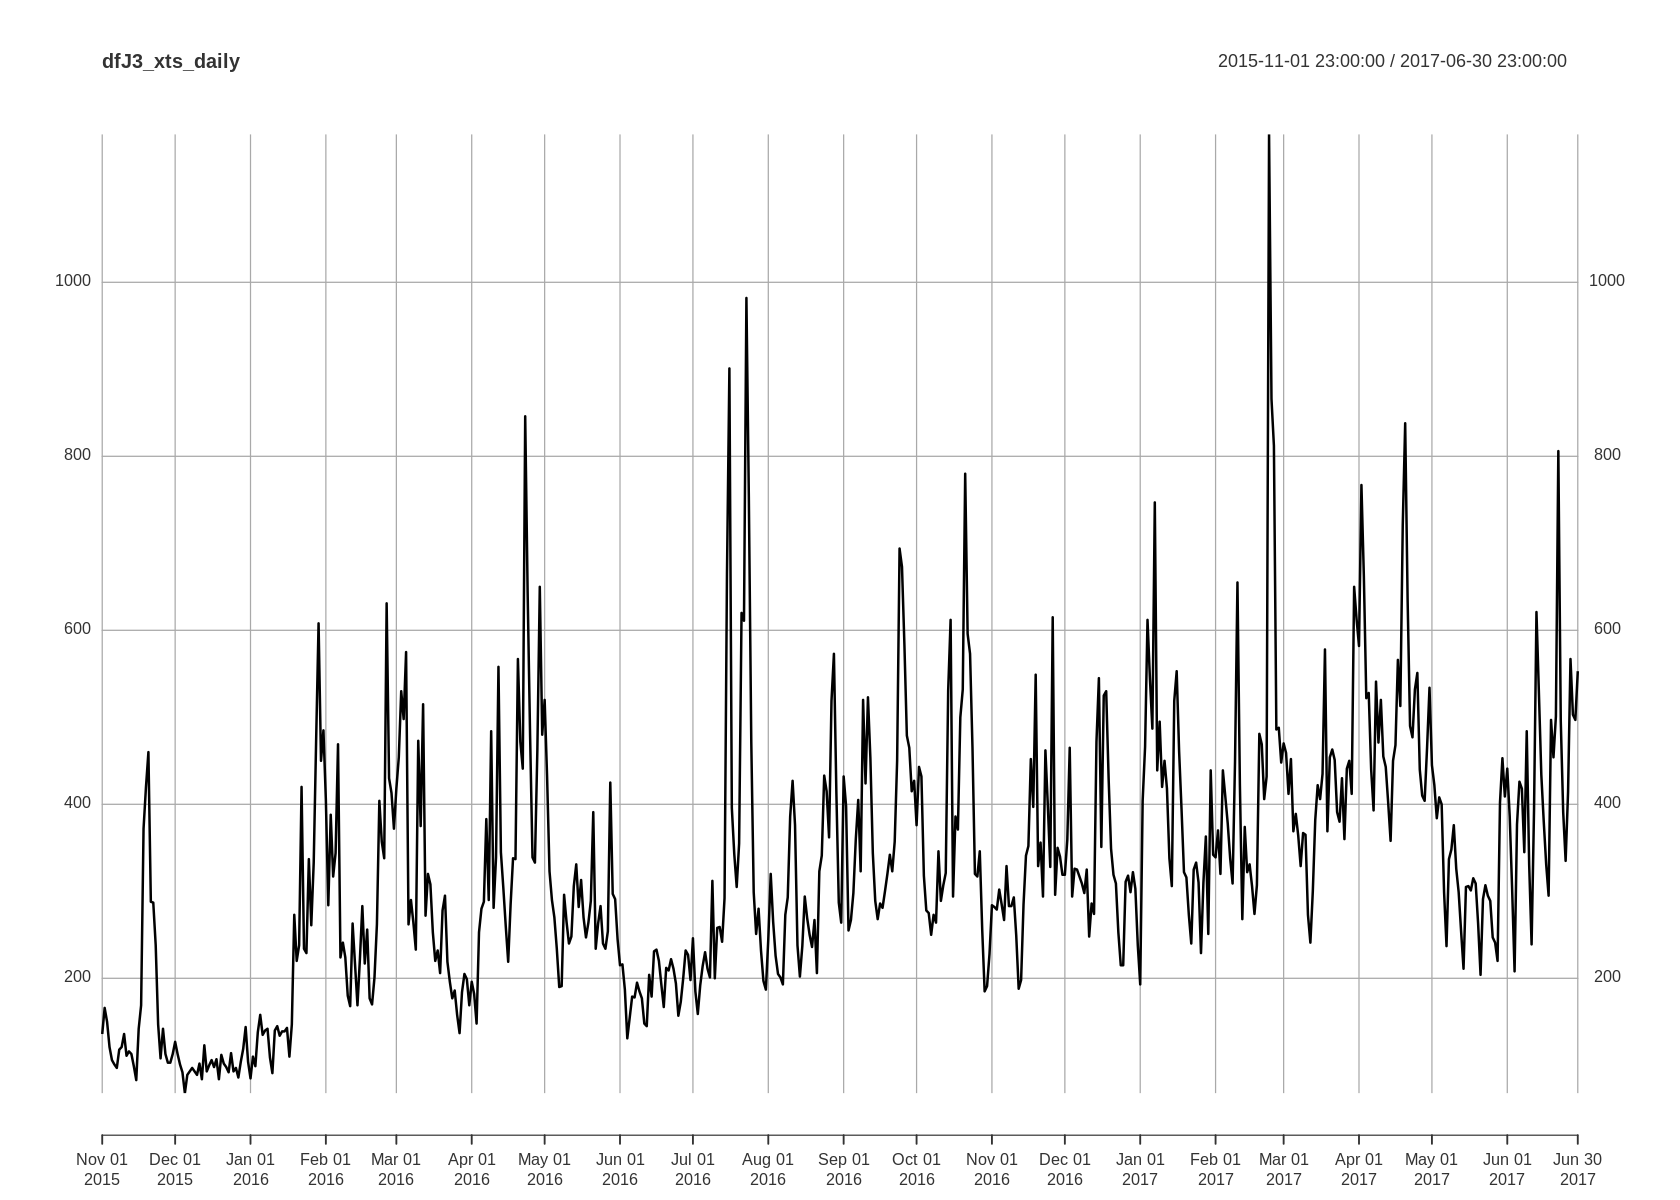

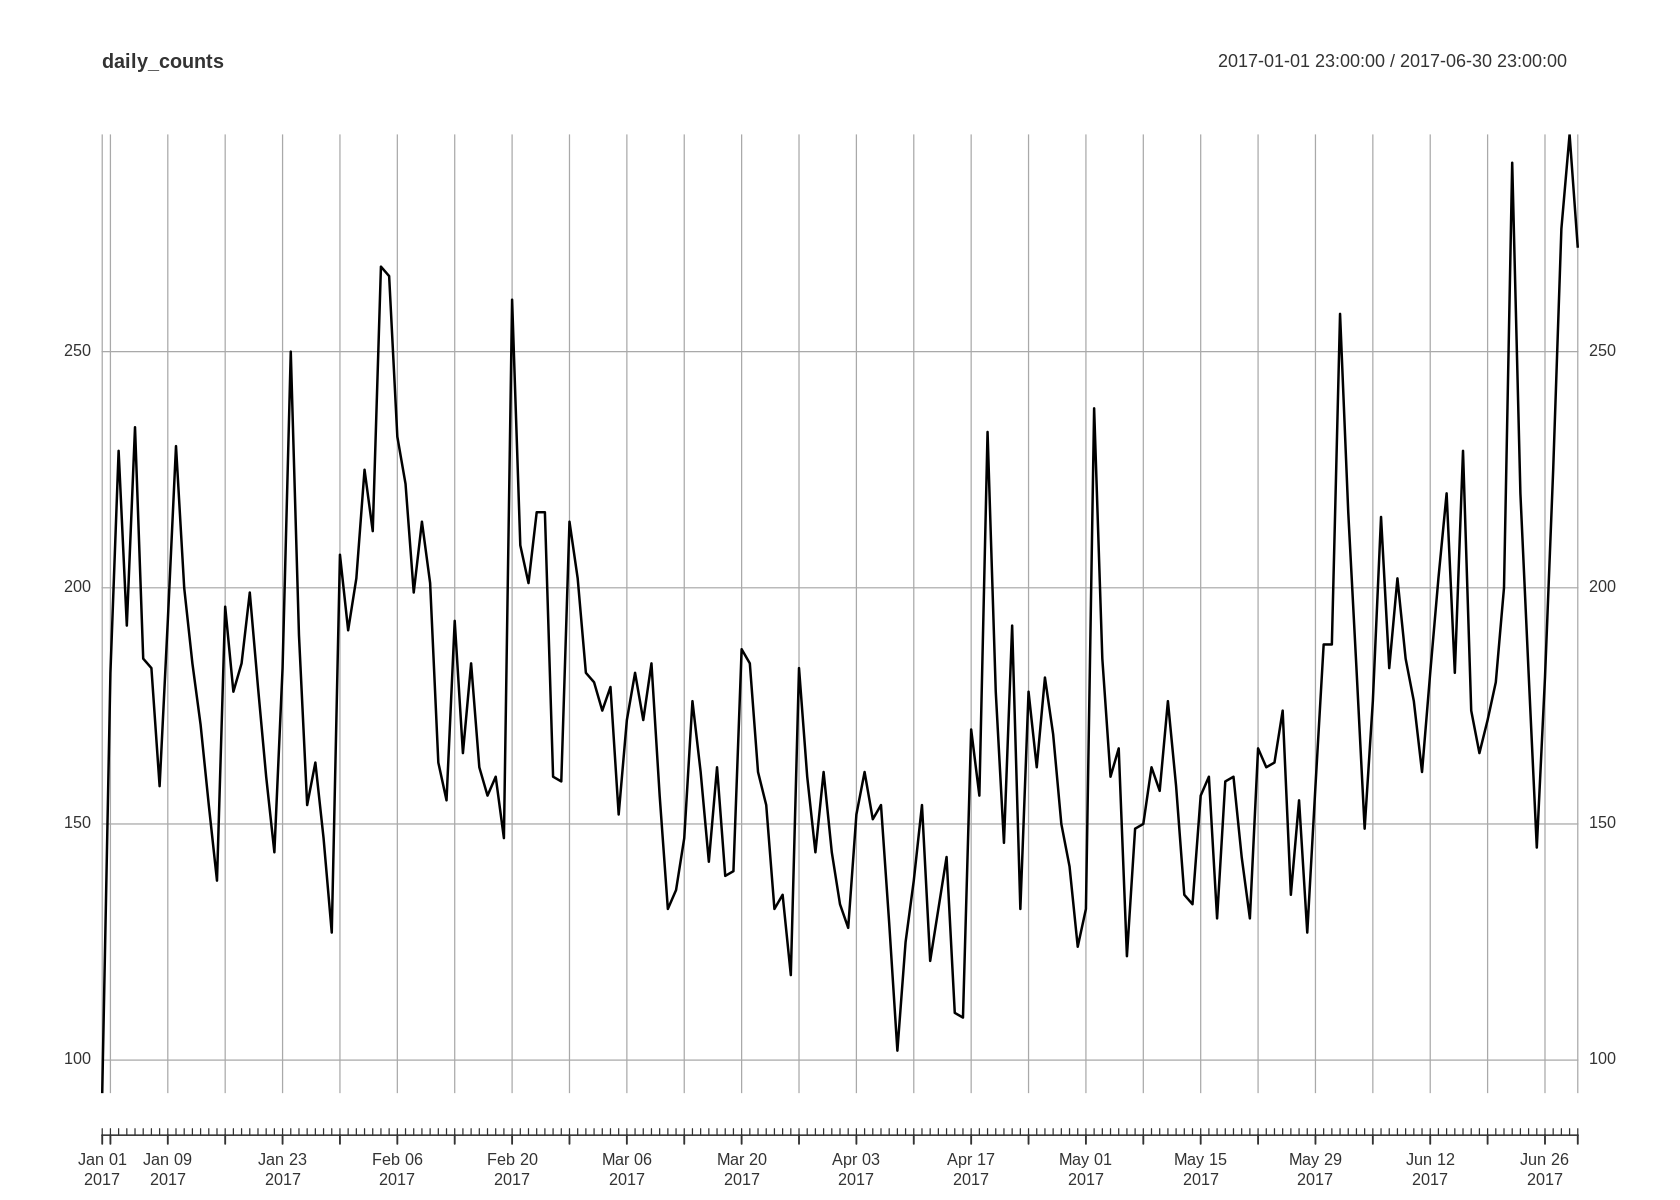

In [32]:
plot(dfJ1_xts_daily)
plot(dfJ2_xts_daily)
plot(dfJ3_xts_daily)
plot(daily_counts)

# Modeling

determenistic part modeling with linear regression

In [38]:
install.packages('forecast')
library(forecast)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Junction1**

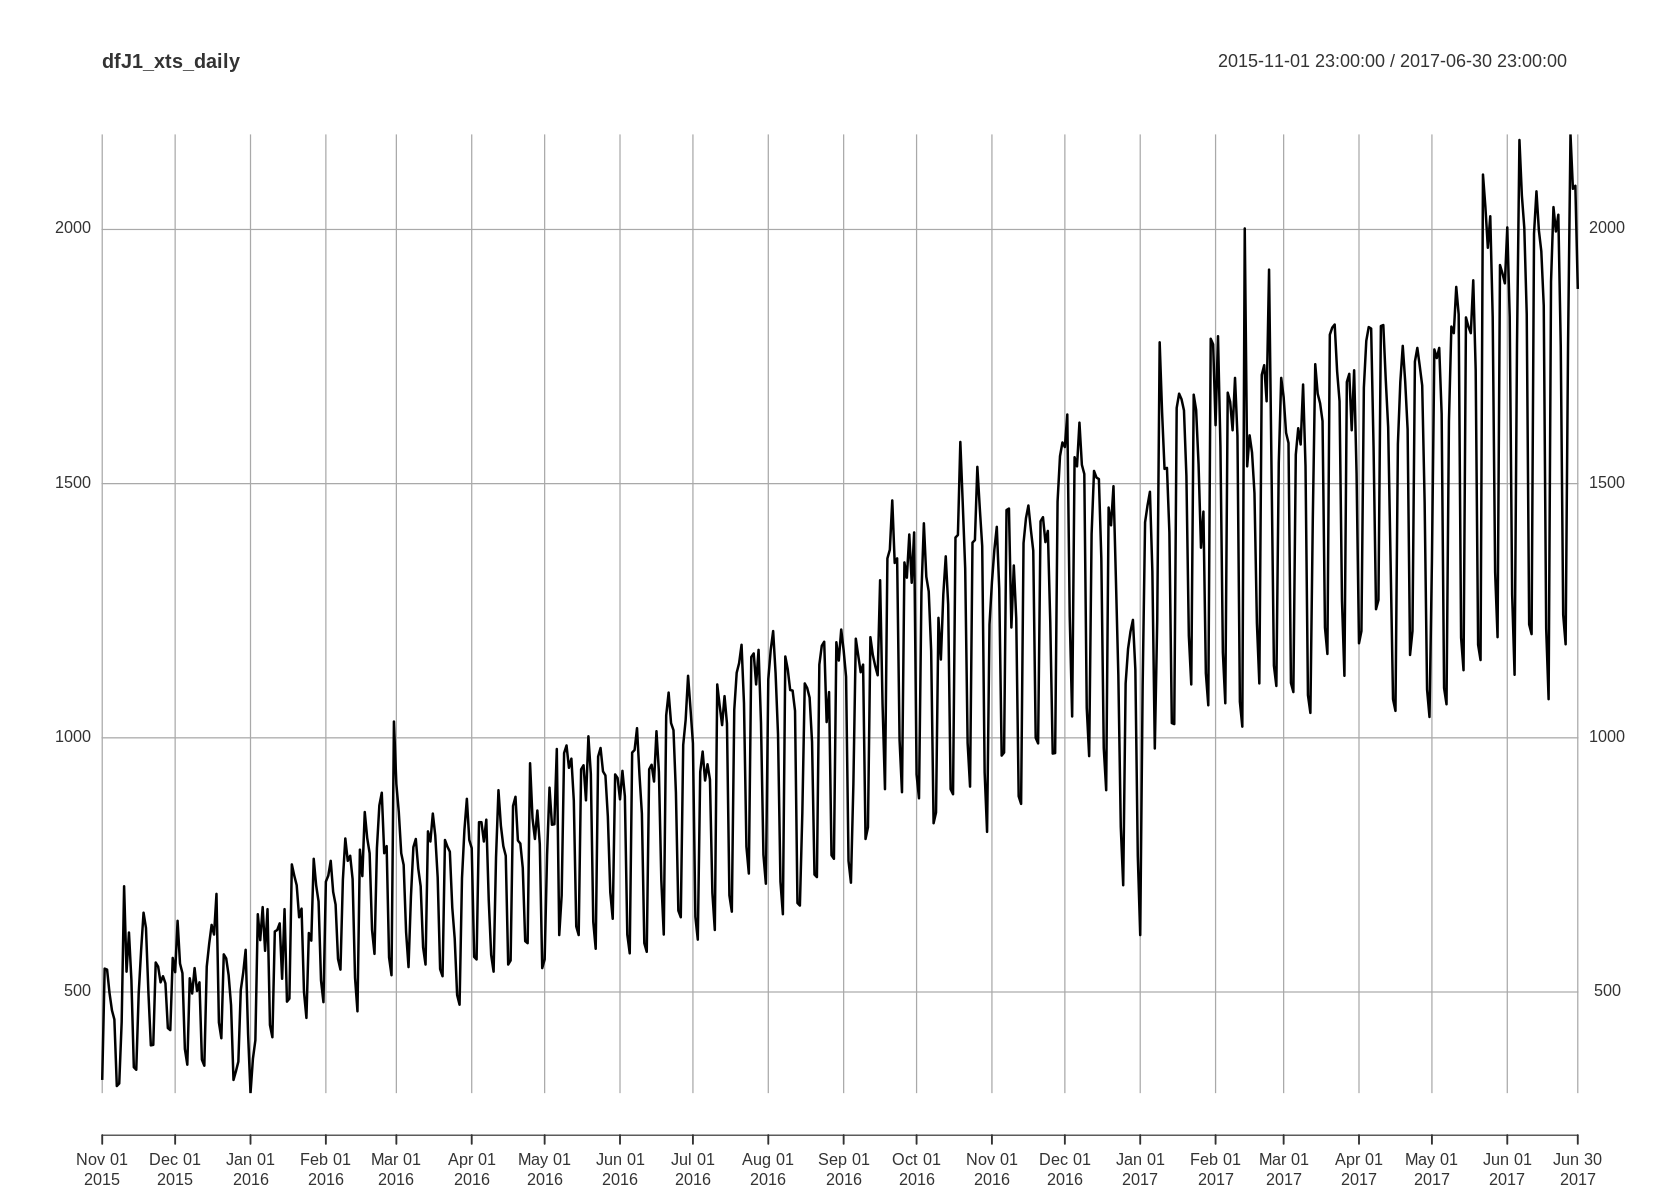

In [39]:
plot(dfJ1_xts_daily)


## First linear regression model with variable time (time index of dfJ1_xts_daily )

In [40]:
# Perform linear regression
lm_model <- lm(dfJ1_xts_daily[,1] ~ index(dfJ1_xts_daily), data = dfJ1_xts_daily)

# Print summary of the linear regression model
summary(lm_model)


Call:
lm(formula = dfJ1_xts_daily[, 1] ~ index(dfJ1_xts_daily), data = dfJ1_xts_daily)

Residuals:
    Min      1Q  Median      3Q     Max 
-740.04 -140.95   52.11  144.54  555.68 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.629e+04  8.572e+02  -42.34   <2e-16 ***
index(dfJ1_xts_daily)  2.538e-05  5.820e-07   43.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 217.6 on 606 degrees of freedom
Multiple R-squared:  0.7583,	Adjusted R-squared:  0.7579 
F-statistic:  1901 on 1 and 606 DF,  p-value: < 2.2e-16


p_value<o.oo1 so time is significant

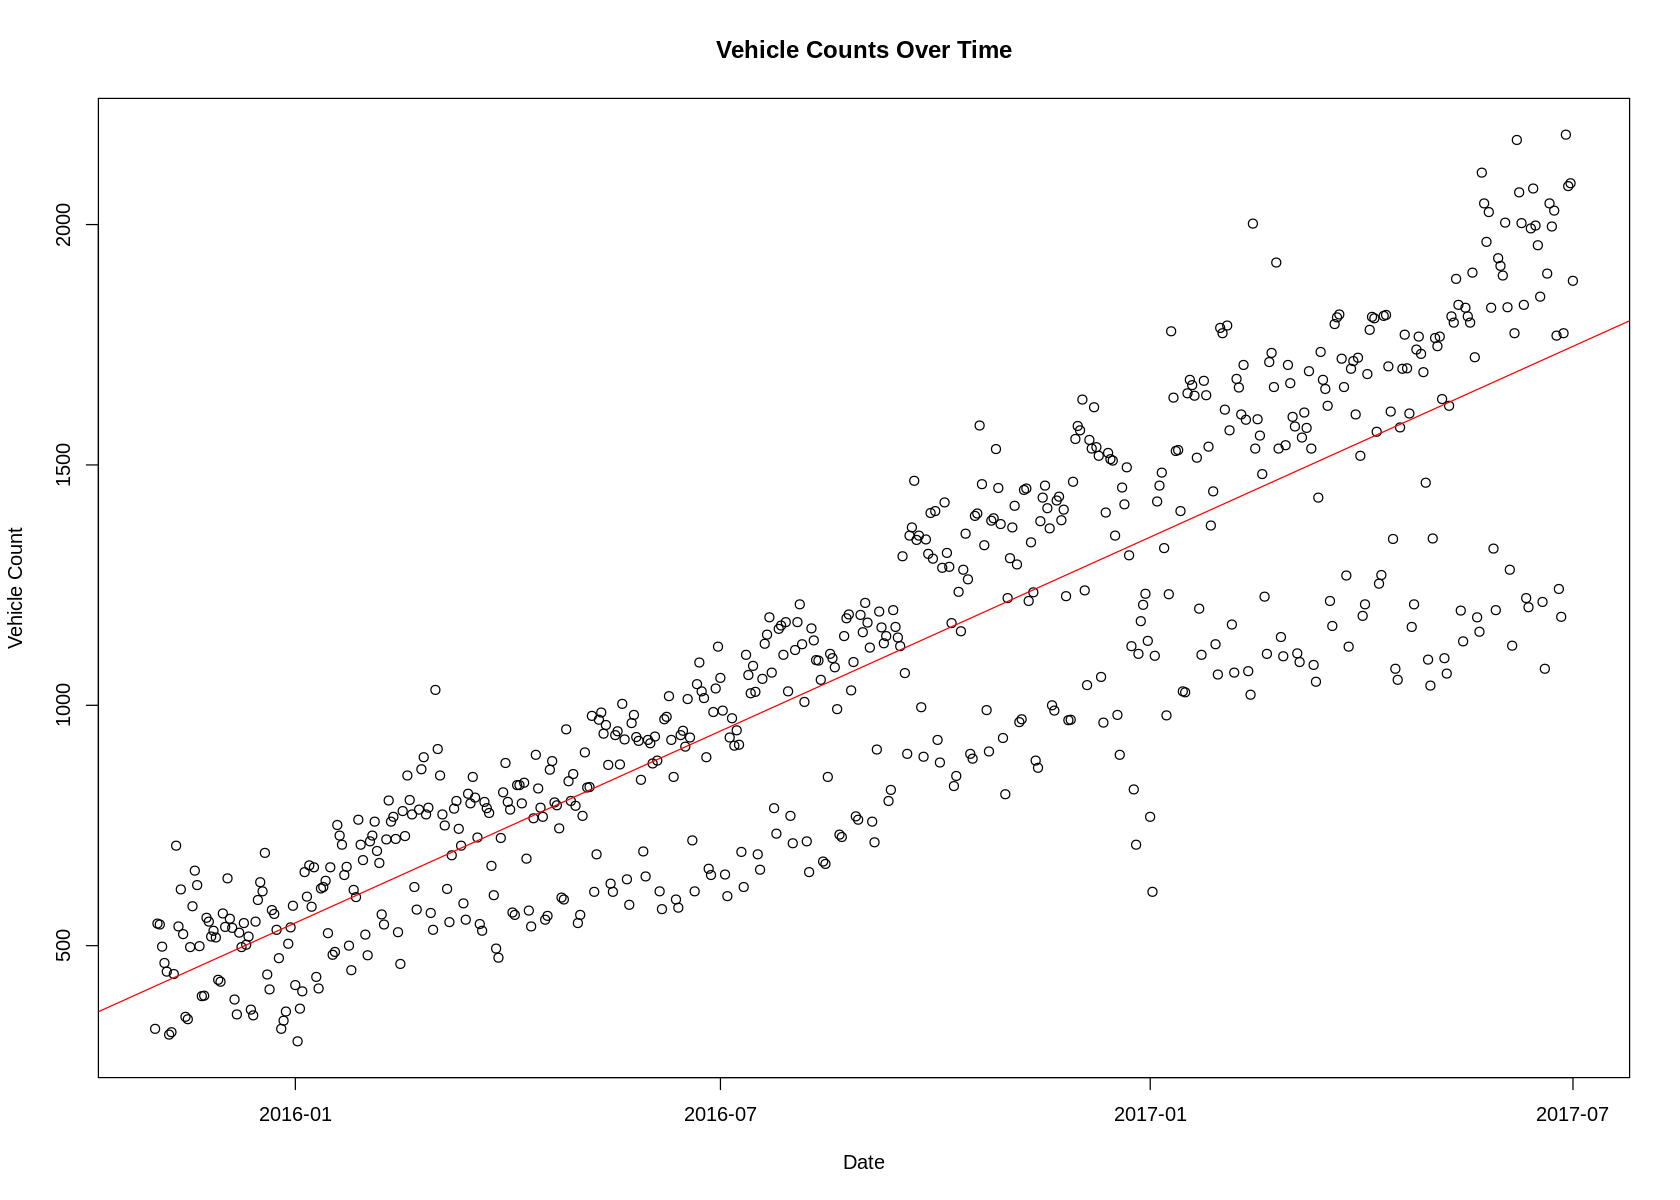

In [41]:
# Plot the data along with the regression line
plot(index(dfJ1_xts_daily), dfJ1_xts_daily[,1],
     main = "Vehicle Counts Over Time",
     xlab = "Date",
     ylab = "Vehicle Count")
abline(lm_model, col = "red")


The linear regression line provides a basic understanding of the trend in vehicle counts, but the presence of variability and potential seasonality suggests that:

Additional Modeling: More sophisticated models (e.g., time series models that account for seasonality and autocorrelation) might better capture the underlying patterns in the data.
Model Fit: The fit could be evaluated using statistical metrics (e.g., R-squared, residual analysis) to determine how well the model explains the variability in vehicle counts.

In [42]:
# Apply logarithmic transformation to the dependent variable
log_counts <- log(dfJ1_xts_daily[,1])

# Perform linear regression on the transformed data
lm_model_log <- lm(log_counts ~ index(dfJ1_xts_daily), data = dfJ1_xts_daily)

# Print summary of the linear regression model
summary(lm_model_log)


Call:
lm(formula = log_counts ~ index(dfJ1_xts_daily), data = dfJ1_xts_daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74839 -0.17173  0.06594  0.16213  0.44399 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.029e+01  8.362e-01  -36.23   <2e-16 ***
index(dfJ1_xts_daily)  2.525e-08  5.678e-10   44.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2123 on 606 degrees of freedom
Multiple R-squared:  0.7655,	Adjusted R-squared:  0.7651 
F-statistic:  1978 on 1 and 606 DF,  p-value: < 2.2e-16


In [43]:
library(tseries)
adf_test <- adf.test(dfJ1_xts_daily[,1], alternative = "stationary")
print(adf_test)

Warning message in adf.test(dfJ1_xts_daily[, 1], alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dfJ1_xts_daily[, 1]
Dickey-Fuller = -6.1069, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



p_value<0.001 the time serie is not stationary. we will execute differenciation to get rid of the trend

In [44]:
diff_series <- diff(dfJ1_xts_daily[,1])

In [45]:
library(tseries)
adf_test <- adf.test(dfJ1_xts_daily[,1], alternative = "stationary")
print(adf_test)

Warning message in adf.test(dfJ1_xts_daily[, 1], alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dfJ1_xts_daily[, 1]
Dickey-Fuller = -6.1069, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



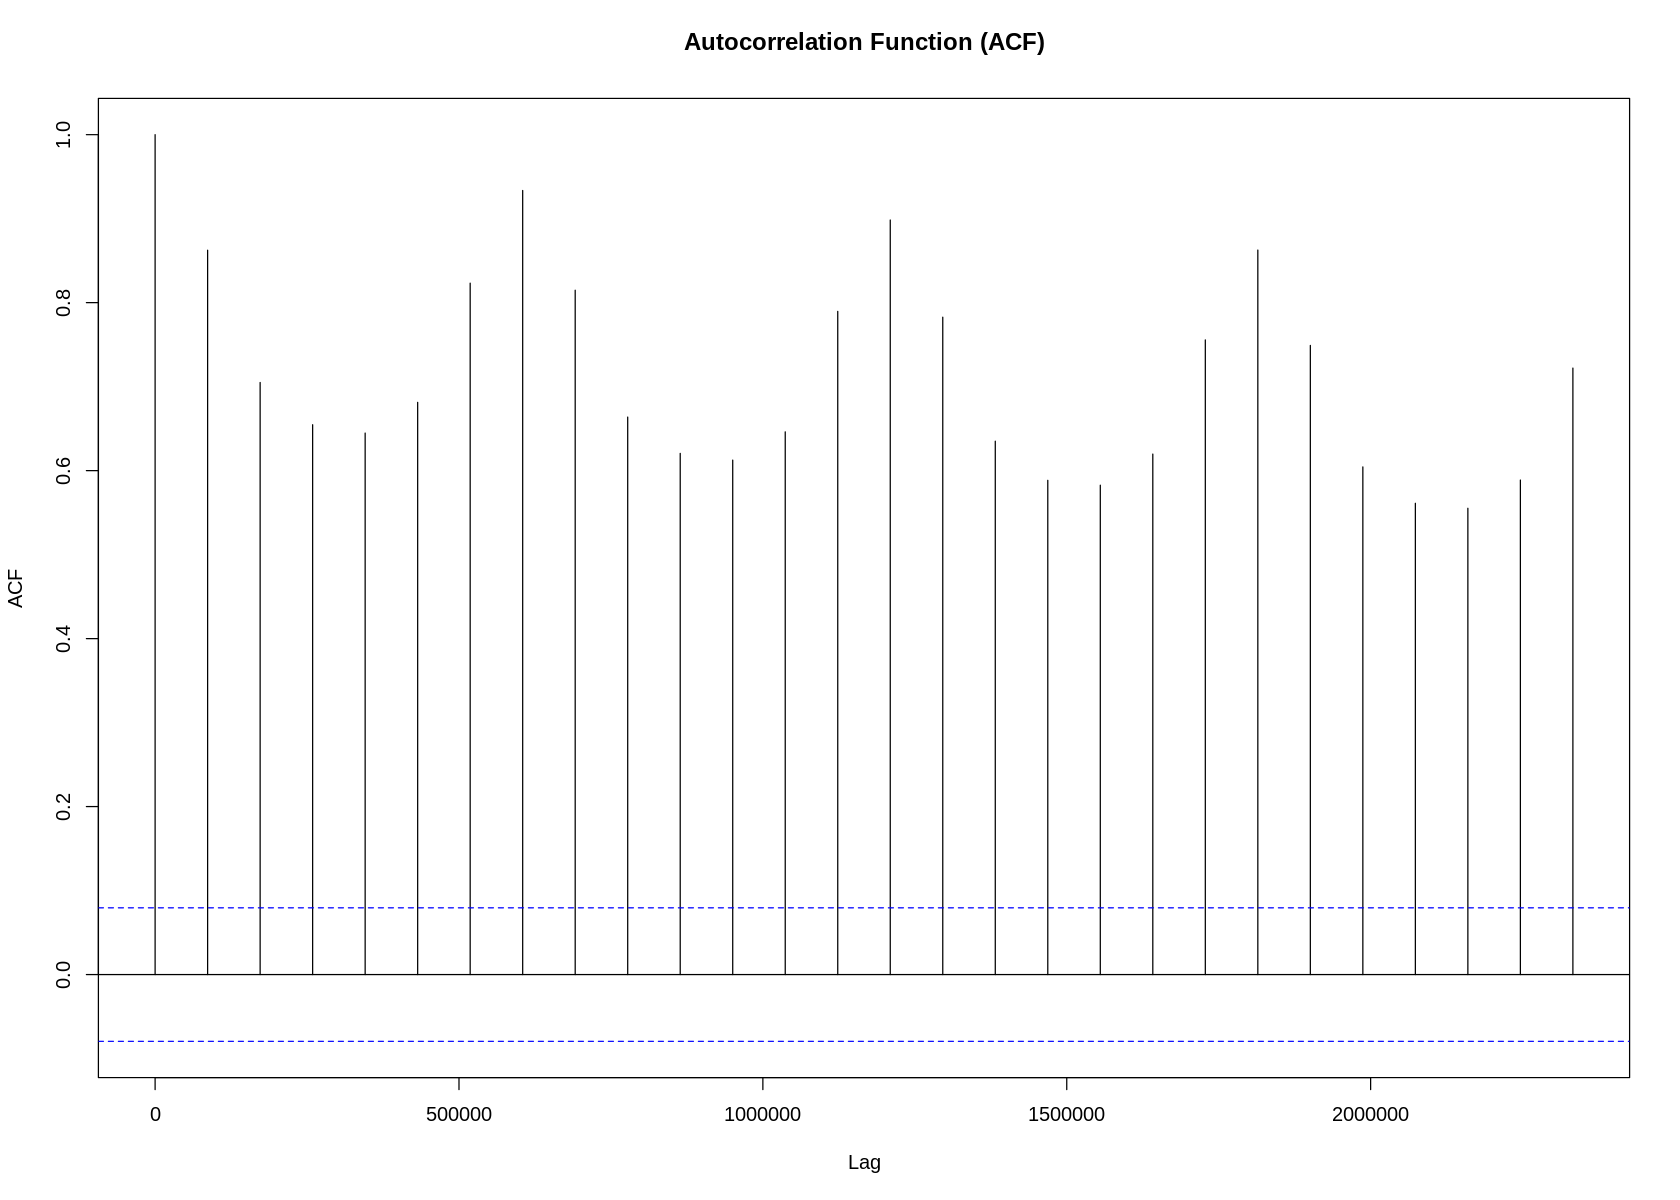

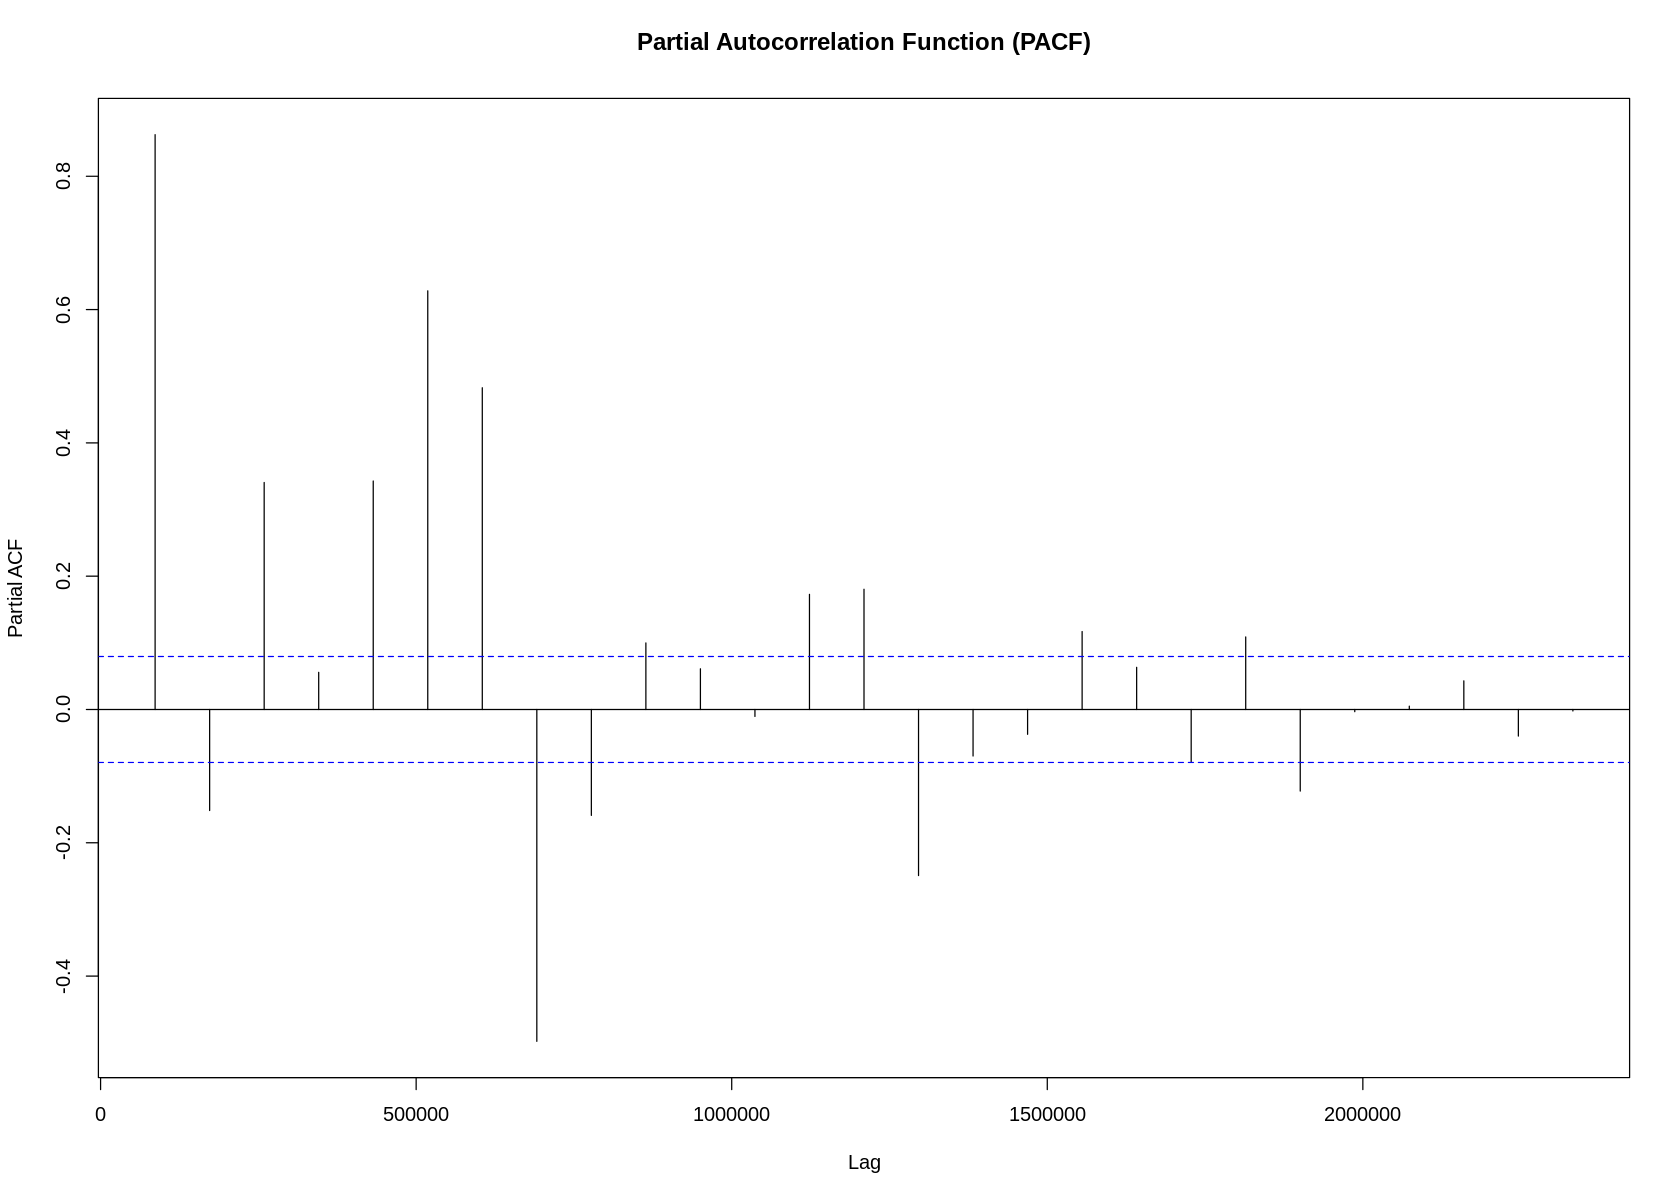

In [46]:
acf(dfJ1_xts_daily[,1], main = "Autocorrelation Function (ACF)")
pacf(dfJ1_xts_daily[,1], main = "Partial Autocorrelation Function (PACF)")


there is still trend we will move on to auto arima to know the number of diffrenciation necessary

In [47]:
# Fit ARIMA model using auto.arima()
library(forecast)
arima_model <- auto.arima(dfJ1_xts_daily[,1])

# Print model summary
print(summary(arima_model))

Series: dfJ1_xts_daily[, 1] 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1      ma2
      0.0360  -0.2422  -0.6695
s.e.  0.0634   0.0500   0.0453

sigma^2 = 32394:  log likelihood = -4012.83
AIC=8033.66   AICc=8033.73   BIC=8051.3

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 23.60804 179.3902 136.0896 -0.1783323 13.49585 0.1258609 -0.015014


In [48]:
# Fit the ARIMA model
library(forecast)
arima_model <- Arima(dfJ1_xts_daily[,1], order = c(1,1,2))
arima_model1 <- Arima(dfJ1_xts_daily[,1], order = c(0,1,1))
arima_model2 <- Arima(dfJ1_xts_daily[,1], order = c(1,1,0))
arima_model3 <- Arima(dfJ1_xts_daily[,1], order = c(1,0,0))

# Print the model summary
summary(arima_model)
summary(arima_model1)
summary(arima_model2)
summary(arima_model3)

Series: dfJ1_xts_daily[, 1] 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1      ma2
      0.0360  -0.2422  -0.6695
s.e.  0.0634   0.0500   0.0453

sigma^2 = 32394:  log likelihood = -4012.83
AIC=8033.66   AICc=8033.73   BIC=8051.3

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 23.60804 179.3902 136.0896 -0.1783323 13.49585 0.1258609 -0.015014

Series: dfJ1_xts_daily[, 1] 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.2704
s.e.  0.0613

sigma^2 = 50710:  log likelihood = -4148.91
AIC=8301.83   AICc=8301.85   BIC=8310.64

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 1.931831 224.8173 157.0158 -1.381224 15.29067 0.1452143
                    ACF1
Training set -0.09136152

Series: dfJ1_xts_daily[, 1] 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.0753
s.e.  0.0405

sigma^2 = 51619:  log likelihood = -4154.27
AIC=8312.54   AICc=8312.56   BIC=8321.36

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 2.340876 226.8236 151.8931 -1.786251 14.80846 0.1404766 0.03095161

Series: dfJ1_xts_daily[, 1] 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1       mean
      0.8698  1081.7815
s.e.  0.0202    67.9036

sigma^2 = 48702:  log likelihood = -4143.64
AIC=8293.27   AICc=8293.31   BIC=8306.5

Training set error measures:
                   ME    RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set 1.708629 220.322 155.6753 -4.567388 16.21421 0.1439745 0.1282202

according to both auto arima and manual arima models aic and bic of the model arima(1,1,2) is the best one

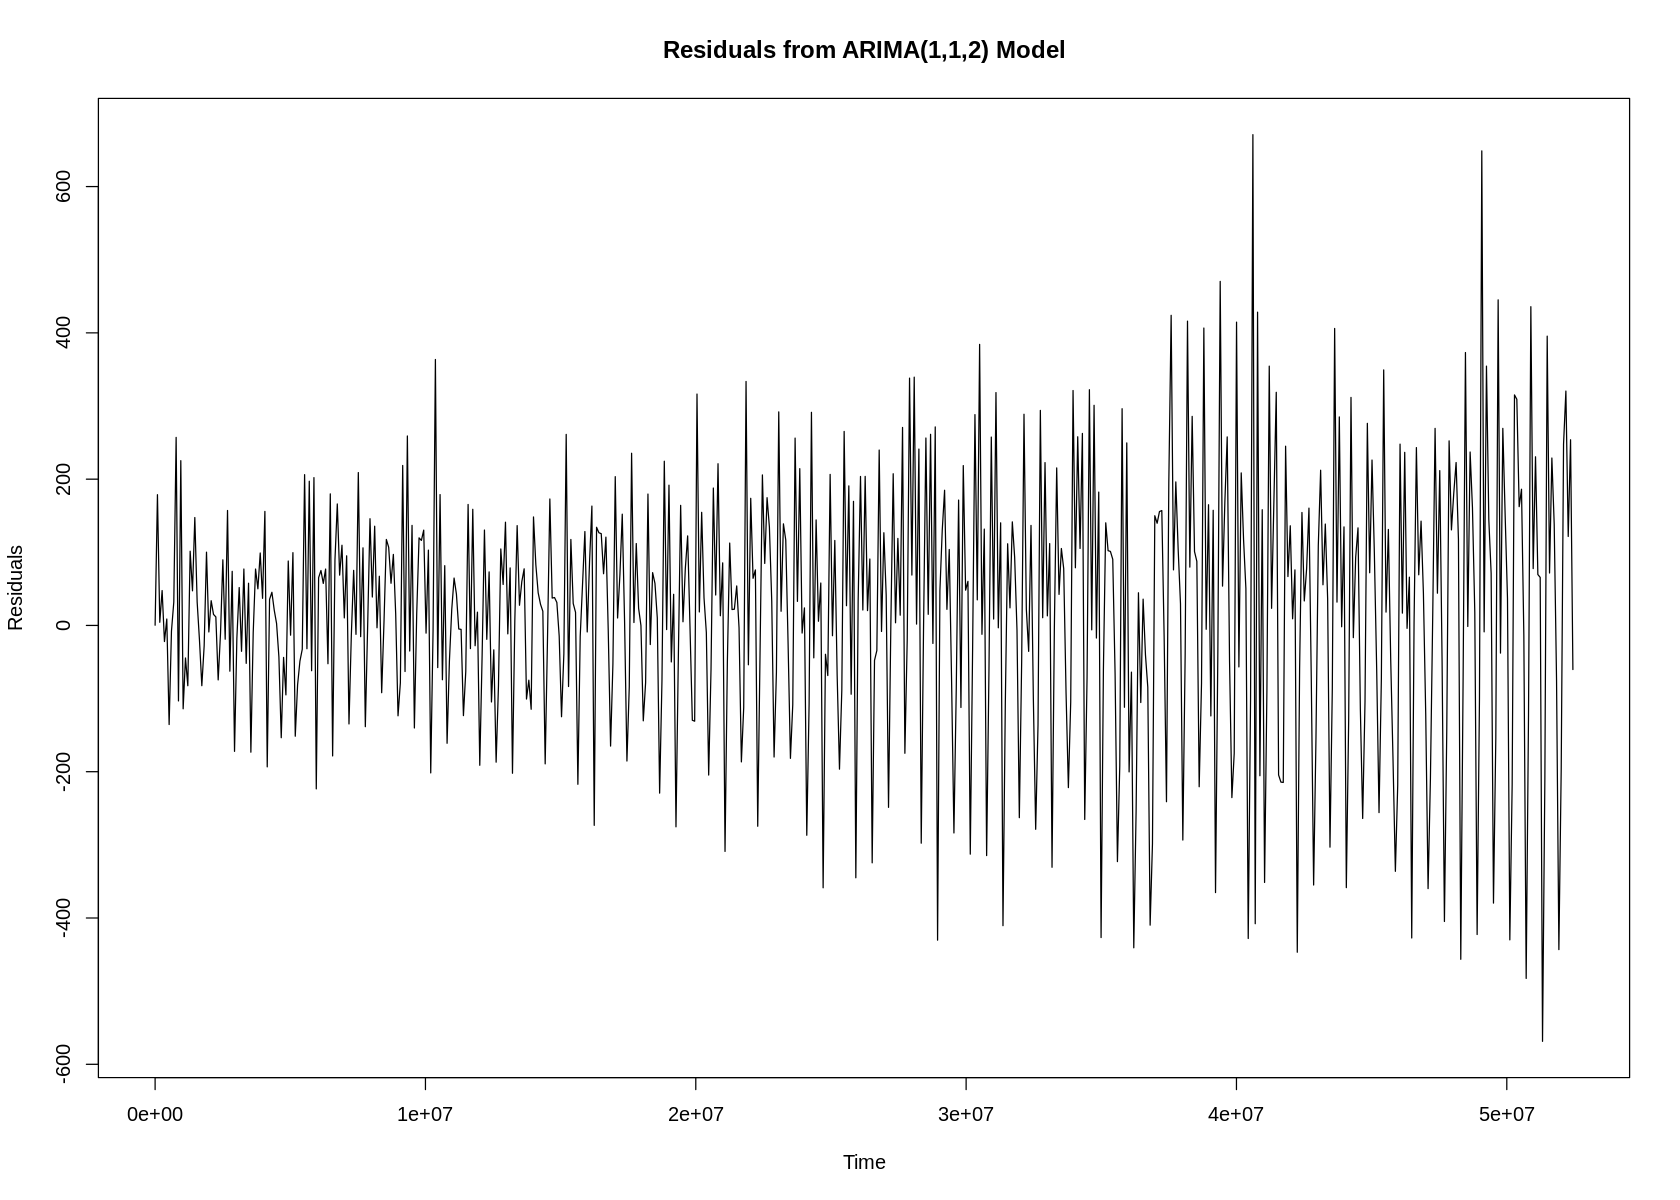

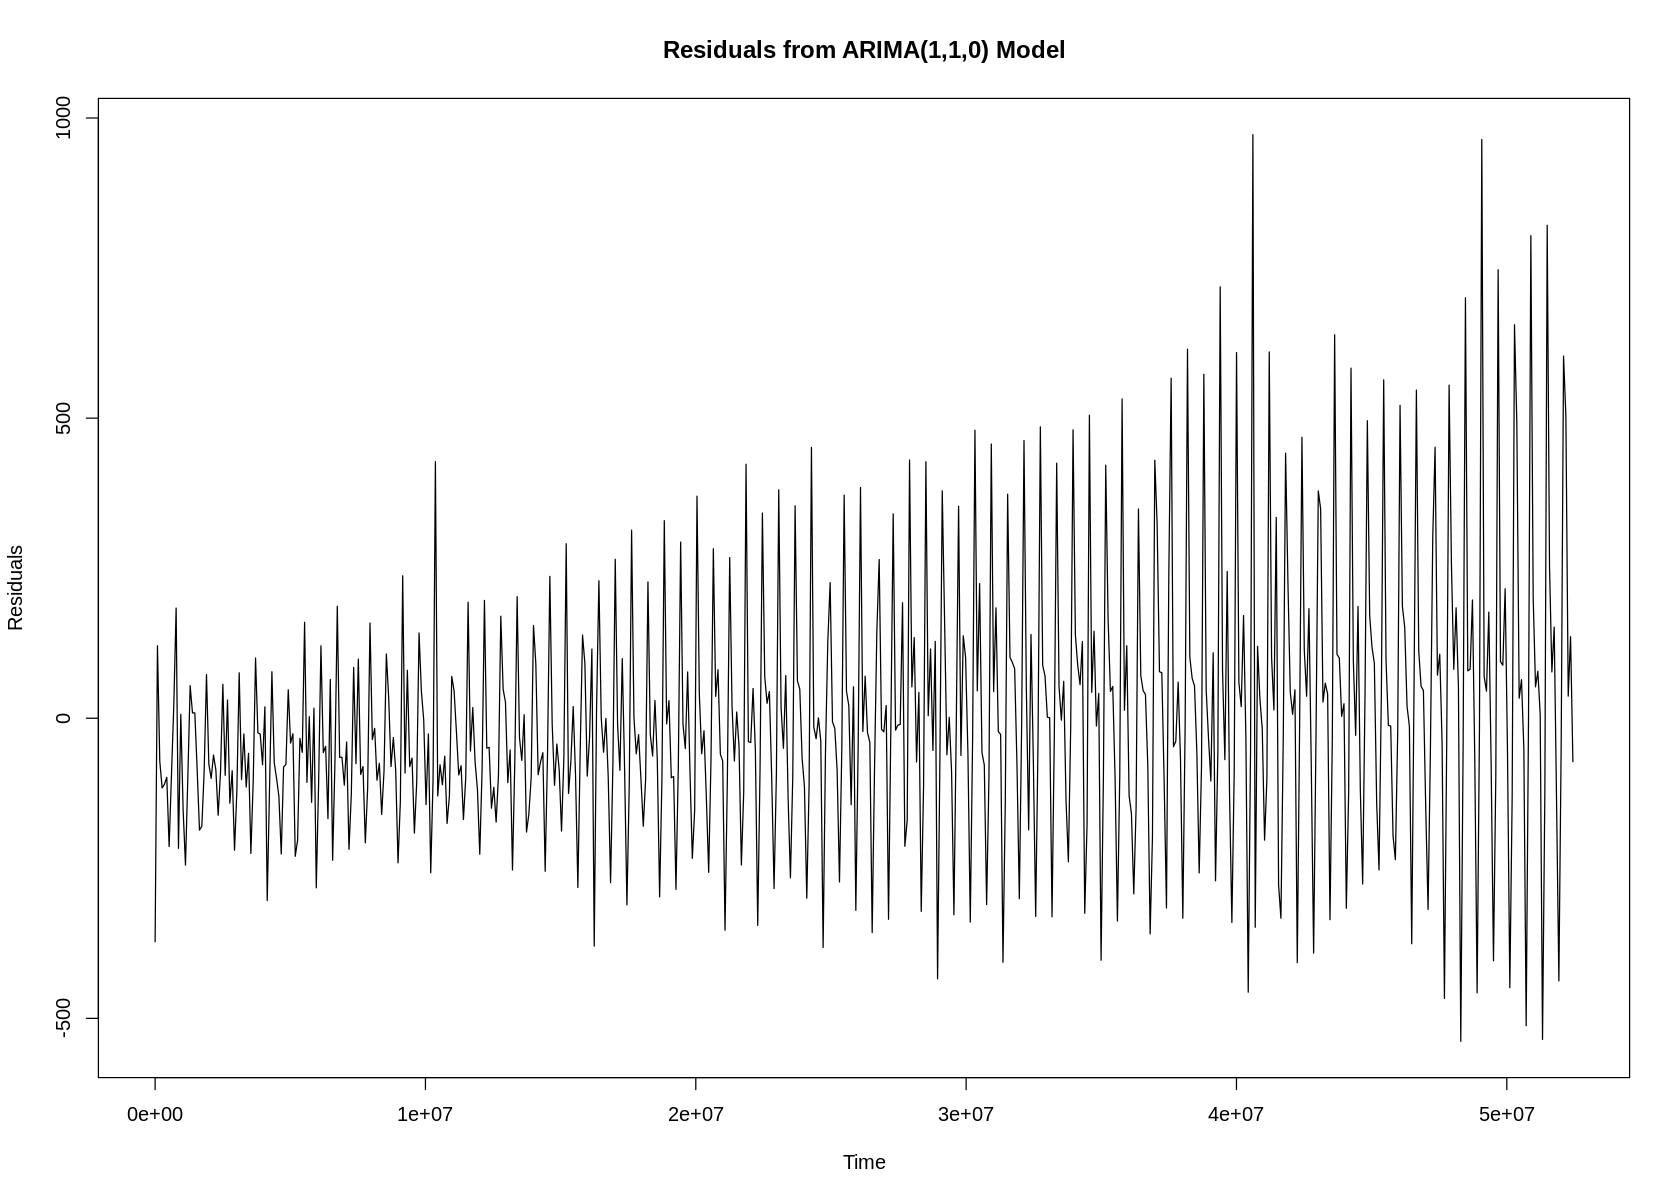

In [49]:
plot(residuals(arima_model), main = "Residuals from ARIMA(1,1,2) Model", ylab = "Residuals")
plot(residuals(arima_model3), main = "Residuals from ARIMA(1,1,0) Model", ylab = "Residuals")


In [50]:
Box.test(residuals(arima_model3), lag = 20, type = "Ljung-Box")



	Box-Ljung test

data:  residuals(arima_model3)
X-squared = 1377.9, df = 20, p-value < 2.2e-16


it is not a white noise

Series: dfJ1_xts_daily[, 1] 
ARIMA(1,1,2) 

Coefficients:
         ar1      ma1      ma2
      0.0360  -0.2422  -0.6695
s.e.  0.0634   0.0500   0.0453

sigma^2 = 32394:  log likelihood = -4012.83
AIC=8033.66   AICc=8033.73   BIC=8051.3

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE      ACF1
Training set 23.60804 179.3902 136.0896 -0.1783323 13.49585 0.1258609 -0.015014


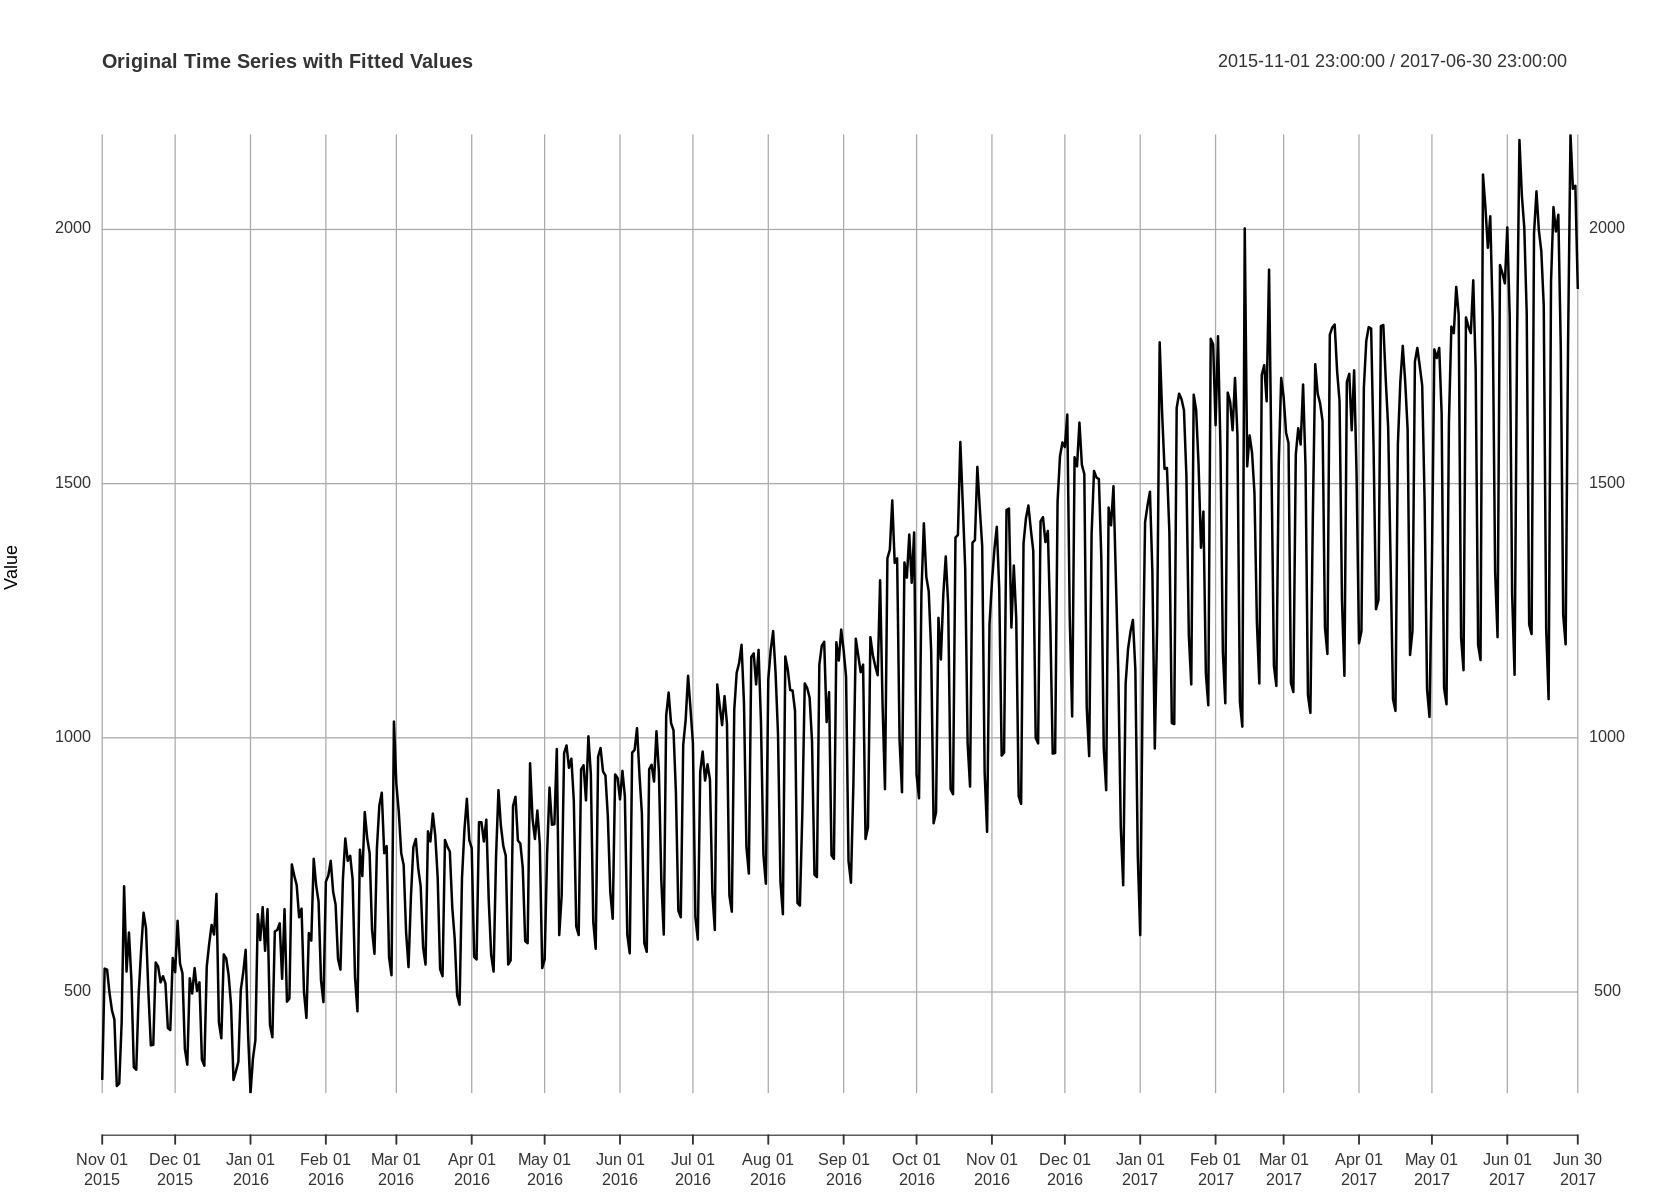

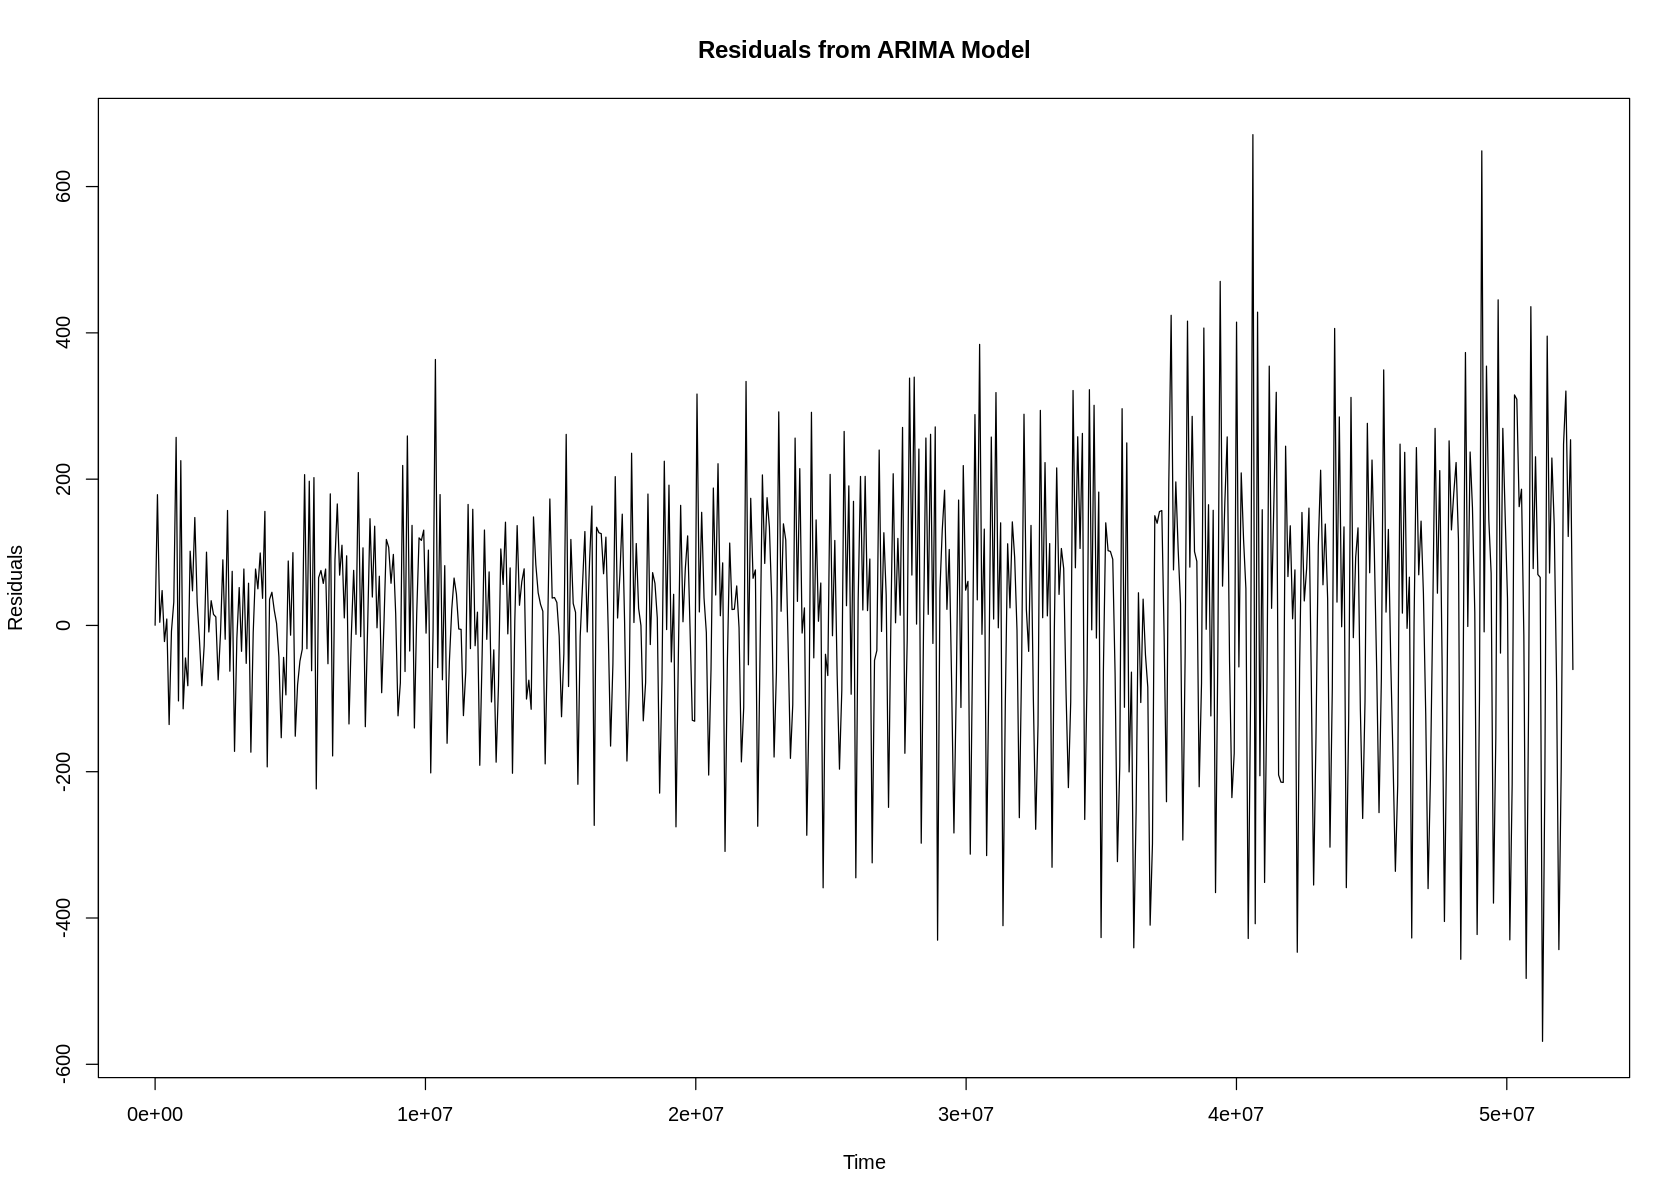

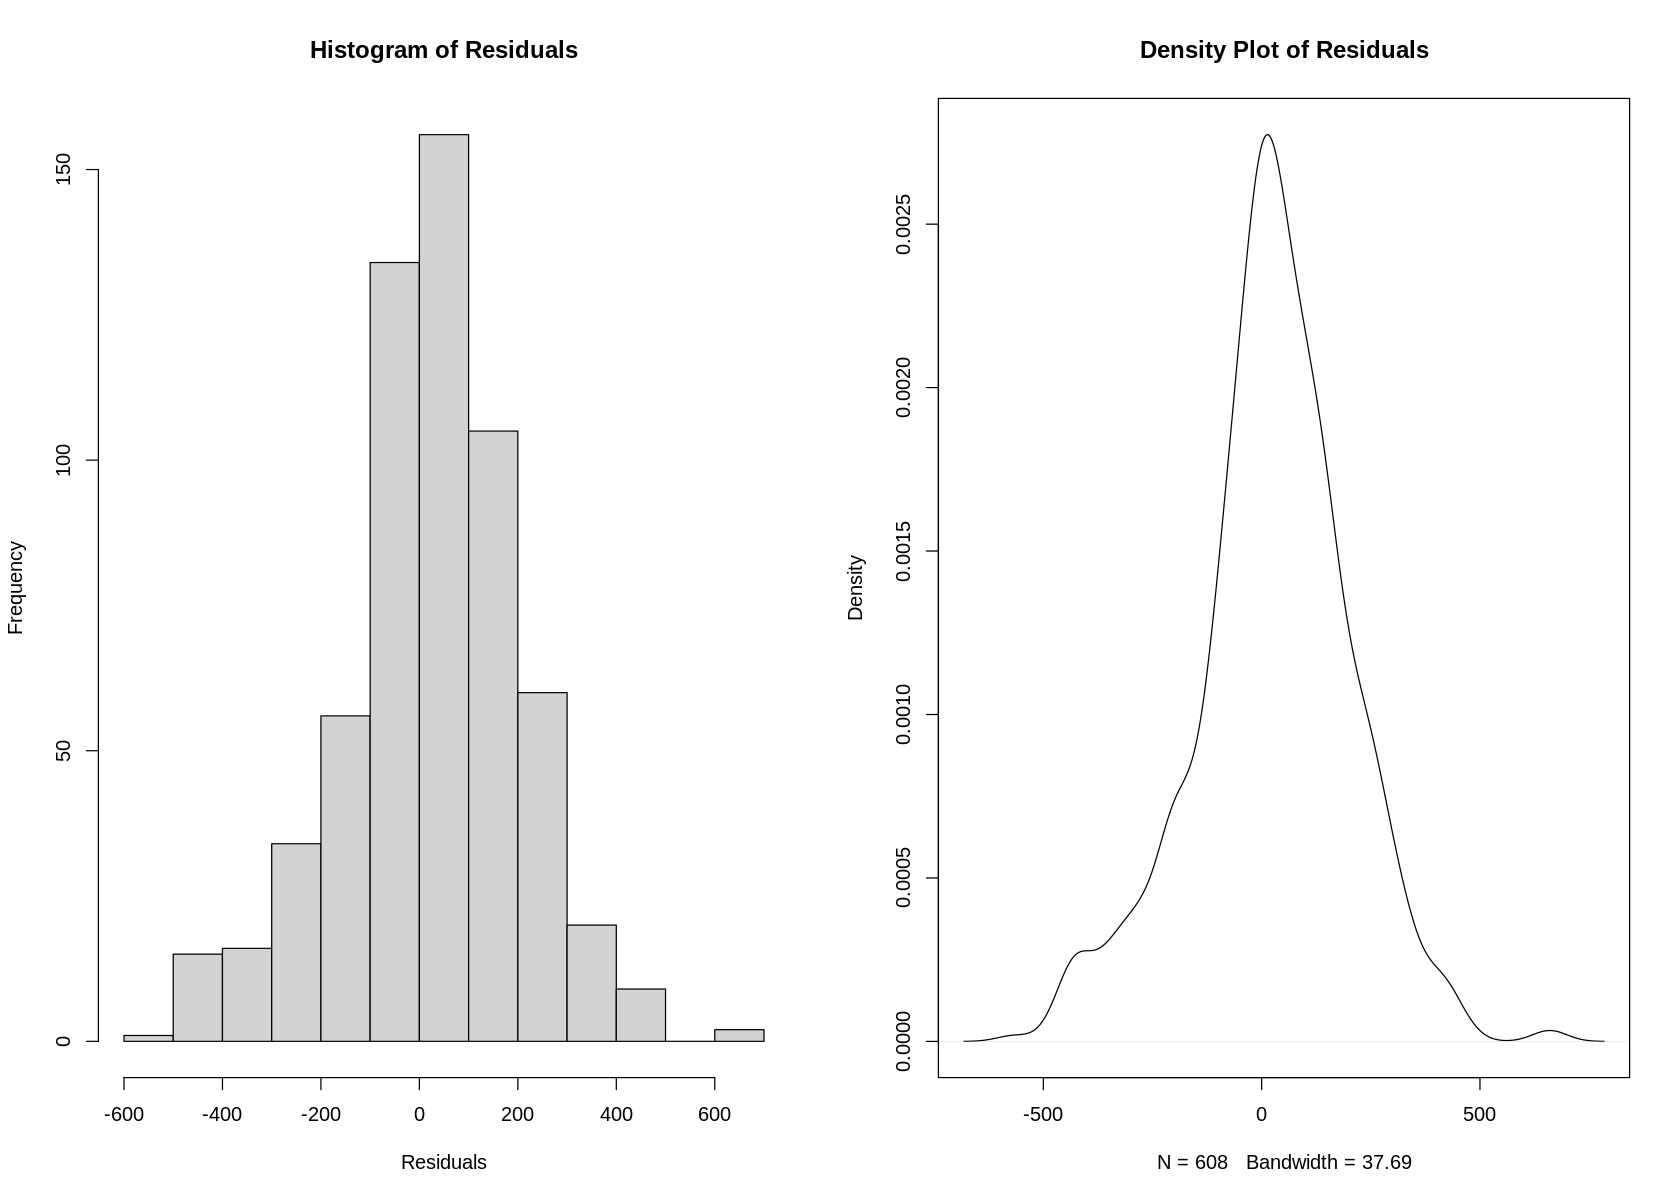


	Box-Ljung test

data:  residuals(arima_model)
X-squared = 1004.8, df = 20, p-value < 2.2e-16


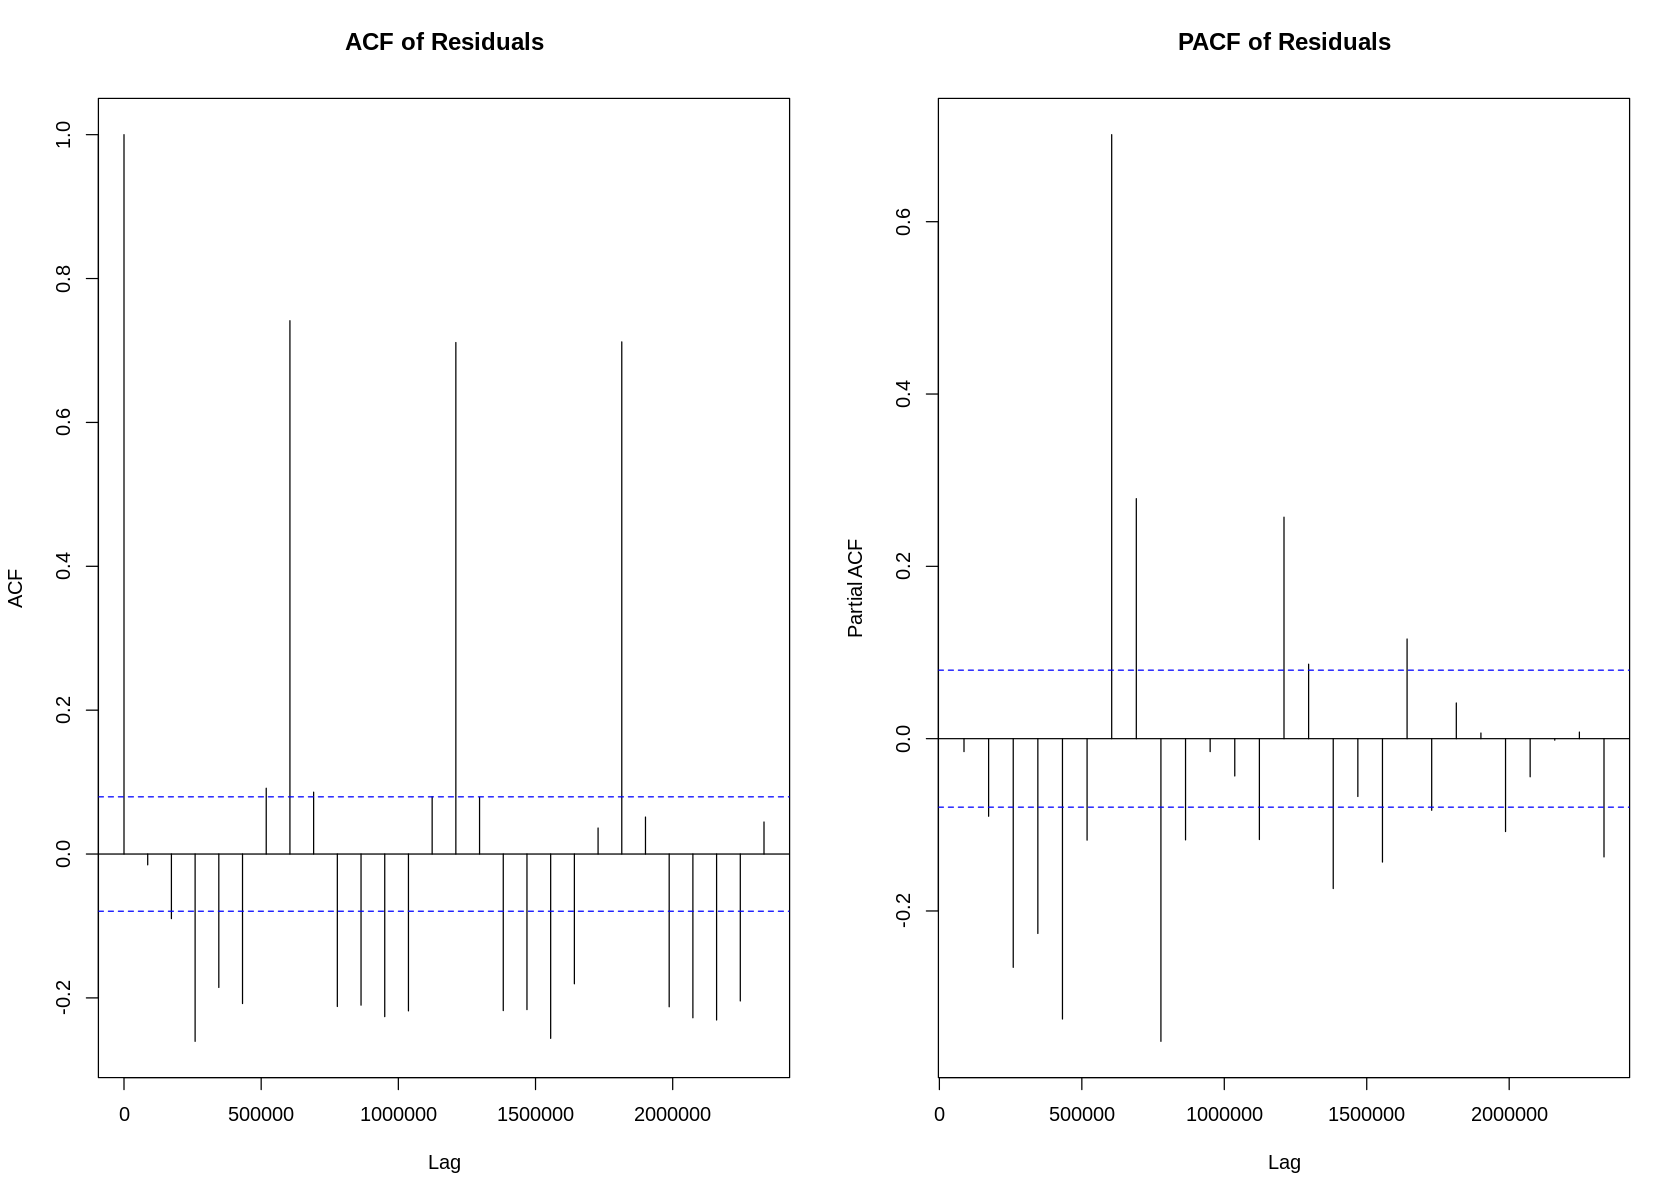

In [51]:
# Load necessary libraries
library(forecast)

# Fit an ARIMA model
arima_model <- auto.arima(dfJ1_xts_daily[,1], seasonal = TRUE)

# Print model summary
print(summary(arima_model))

# Plot original time series with fitted values
plot(dfJ1_xts_daily[,1], main = "Original Time Series with Fitted Values", ylab = "Value")
lines(fitted(arima_model), col = "red")

# Plot residuals
plot(residuals(arima_model), main = "Residuals from ARIMA Model", ylab = "Residuals")

# Histogram and density plot of residuals
par(mfrow = c(1, 2))
hist(residuals(arima_model), main = "Histogram of Residuals", xlab = "Residuals")
plot(density(residuals(arima_model)), main = "Density Plot of Residuals")

# ACF and PACF of residuals
par(mfrow = c(1, 2))
acf(residuals(arima_model), main = "ACF of Residuals")
pacf(residuals(arima_model), main = "PACF of Residuals")

# Ljung-Box test for autocorrelation in residuals
Box.test(residuals(arima_model), lag = 20, type = "Ljung-Box")


### Stochastic part

Warning message in adf.test(Model.res.s$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Model.res.s$residuals
Dickey-Fuller = -9.5797, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



Call:
arima(x = residuals(arima_model), order = c(1, 1, 2), seasonal = list(order = c(1, 
    1, 2), period = 7))

Coefficients:
         ar1      ma1      ma2    sar1     sma1    sma2
      -0.690  -0.5422  -0.1417  0.0543  -0.9120  0.0926
s.e.   0.051   0.0640   0.0681  0.8044   0.7989  0.6487

sigma^2 estimated as 7092:  log likelihood = -3516.28,  aic = 7046.57

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE      MASE
Training set 0.4799313 83.65533 60.19677 61.95674 377.3392 0.2928584
                    ACF1
Training set 0.008286261


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)(1,1,2)[7]
Q* = 12.495, df = 4, p-value = 0.01403

Model df: 6.   Total lags used: 10



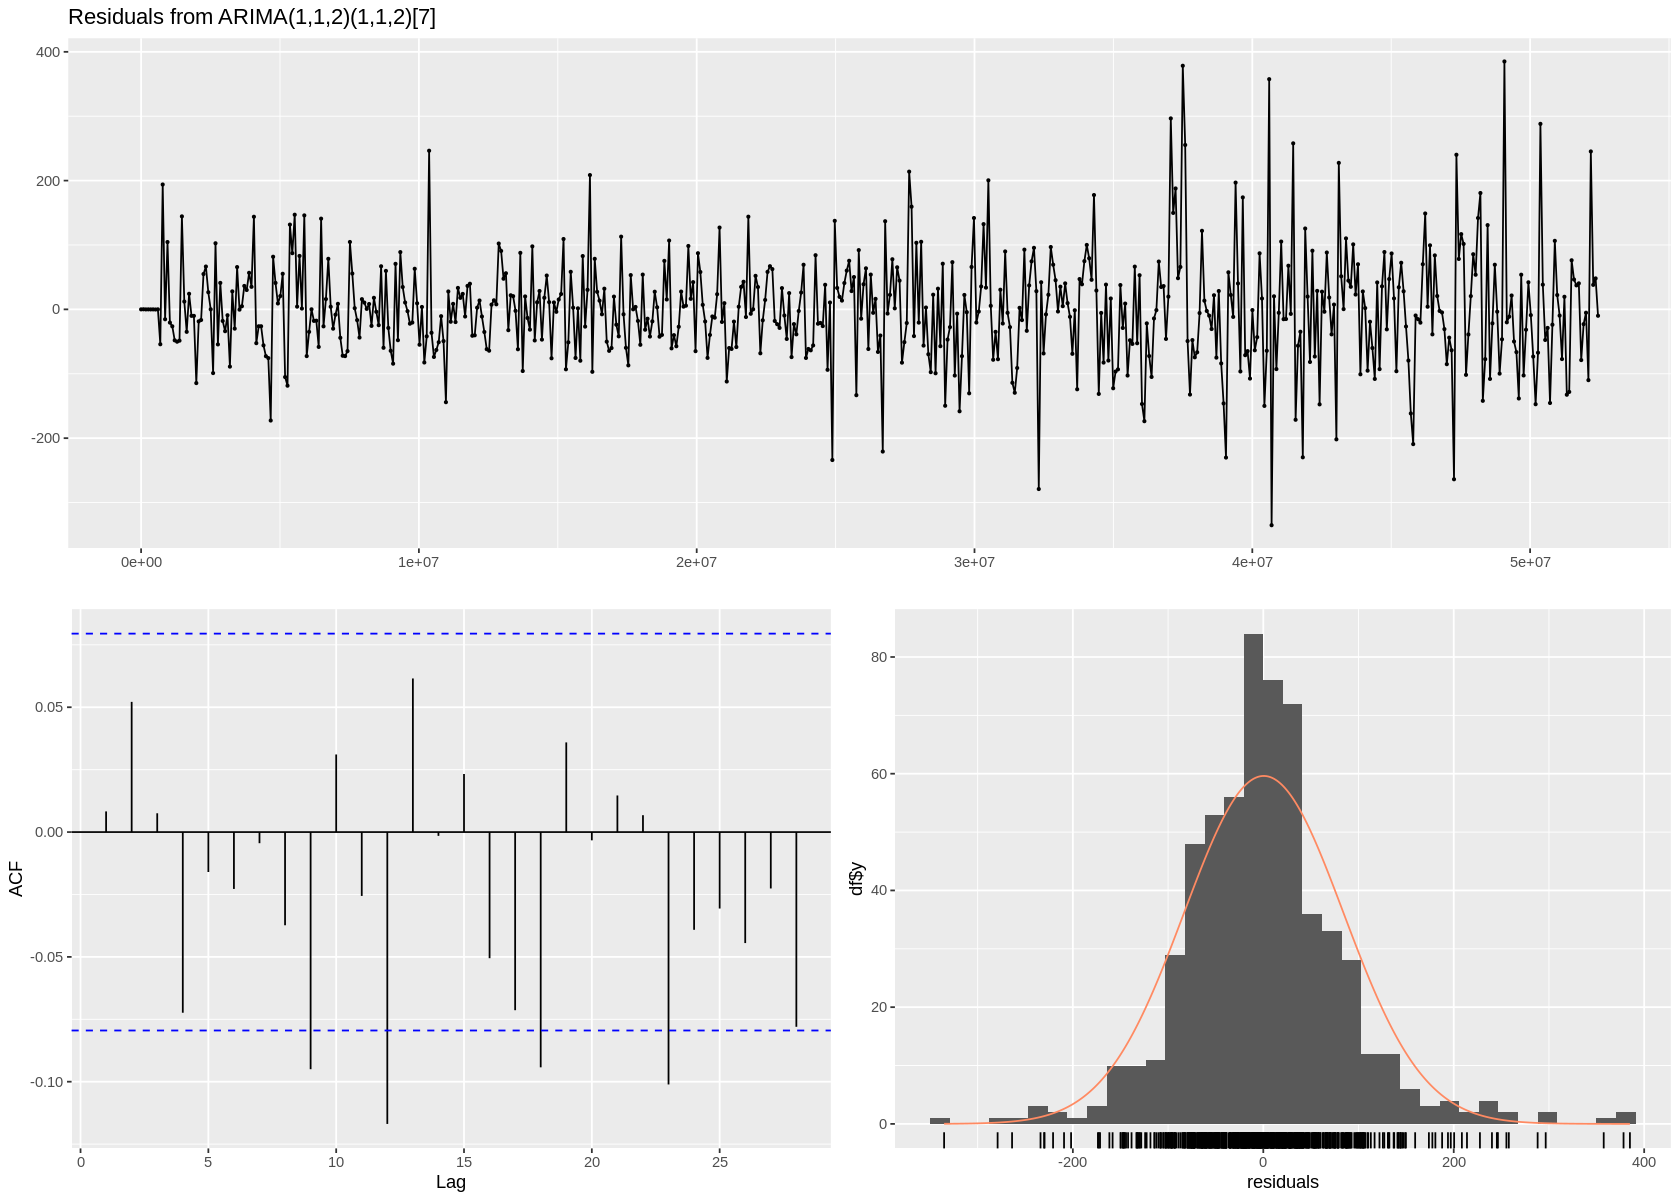

In [52]:
Model.res.s<-arima(residuals(arima_model), order = c(1, 1, 2),seasonal = list(order = c(1,1,2), period = 7))
adf.test(Model.res.s$residuals)
summary(Model.res.s)
checkresiduals(Model.res.s)

Adding a seasonal component (P,D,Q) = (1,1,2) improved the model and got rid of the white noise, correctly representing each aspect of the time series.

### Forecasting with SARIMA model

In [53]:
forecast(Model.res.s ,7)

         Point Forecast       Lo 80      Hi 80      Lo 95      Hi 95
52531201      -378.8508 -486.771781 -270.92982 -543.90170 -213.79991
52617601      -183.4352 -294.226999  -72.64333 -352.87665  -13.99367
52704001       393.2111  271.072913  515.34937  206.41684  580.00545
52790401       113.2233   -8.922389  235.36908  -73.58244  300.02913
52876801       225.7425   98.666491  352.81857   31.39650  420.08856
52963201       149.8167   22.353133  277.28026  -45.12200  344.75540
53049601        10.0704 -120.276815  140.41761 -189.27846  209.41926


## **Junction 2**

**TS Plot**

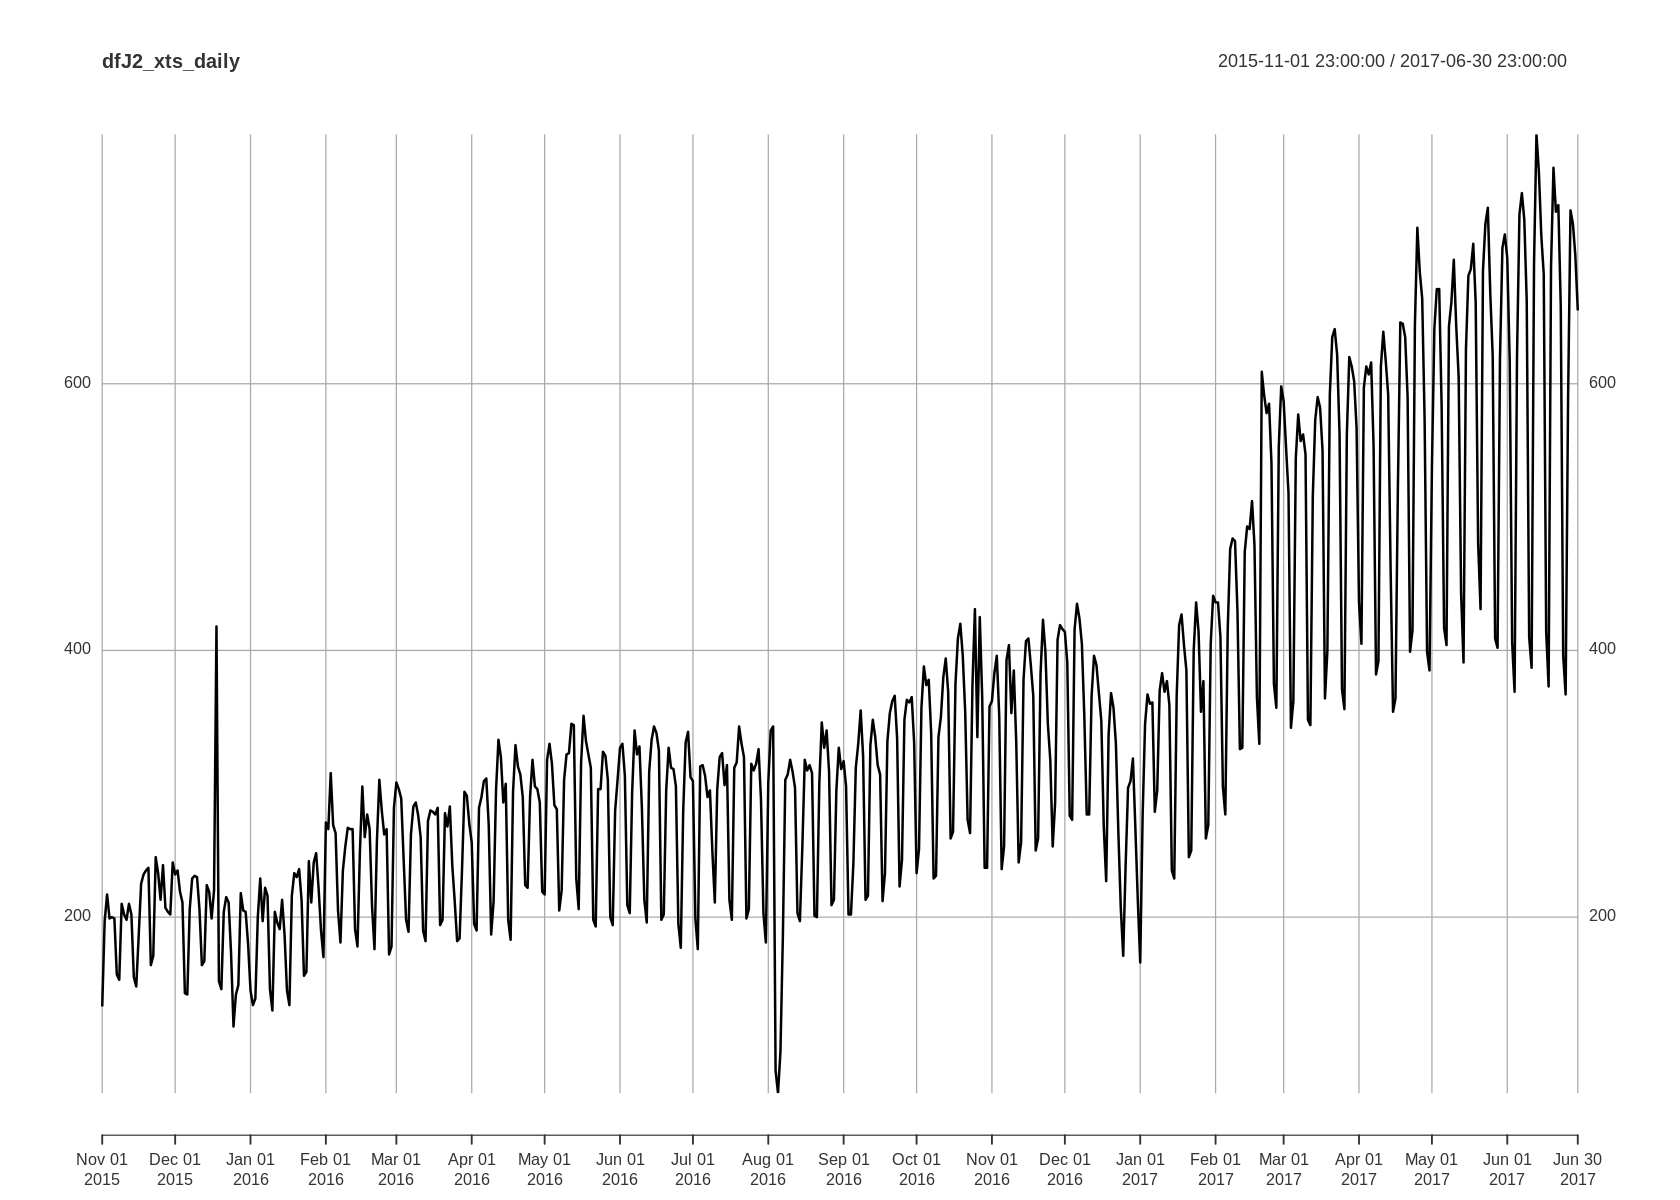

In [54]:
plot(dfJ2_xts_daily)

**Linear Regression**

In [55]:
# Perform linear regression
lm_model <- lm(dfJ2_xts_daily[,1] ~ index(dfJ2_xts_daily), data = dfJ2_xts_daily)

# Print summary of the linear regression model
summary(lm_model)


Call:
lm(formula = dfJ2_xts_daily[, 1] ~ index(dfJ2_xts_daily), data = dfJ2_xts_daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-258.753  -53.561    4.716   53.080  253.129 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -1.107e+04  3.553e+02  -31.15   <2e-16 ***
index(dfJ2_xts_daily)  7.748e-06  2.413e-07   32.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 90.22 on 606 degrees of freedom
Multiple R-squared:  0.6298,	Adjusted R-squared:  0.6292 
F-statistic:  1031 on 1 and 606 DF,  p-value: < 2.2e-16


Enhancing Linear regression

In [56]:
# Apply logarithmic transformation to the dependent variable
log_counts <- log(dfJ2_xts_daily[,1])

# Perform linear regression on the transformed data
lm_model_log <- lm(log_counts ~ index(dfJ2_xts_daily), data = dfJ2_xts_daily)

# Print summary of the linear regression model
summary(lm_model_log)


Call:
lm(formula = log_counts ~ index(dfJ2_xts_daily), data = dfJ2_xts_daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48173 -0.17521  0.07112  0.18956  0.76683 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.617e+01  9.806e-01  -26.69   <2e-16 ***
index(dfJ2_xts_daily)  2.167e-08  6.659e-10   32.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.249 on 606 degrees of freedom
Multiple R-squared:  0.6362,	Adjusted R-squared:  0.6356 
F-statistic:  1060 on 1 and 606 DF,  p-value: < 2.2e-16


p_value<0.001 log of vehiculs  is significant

**Studying Stationarity**

In [57]:
adf_test <- adf.test(dfJ2_xts_daily[,1], alternative = "stationary")
print(adf_test)


	Augmented Dickey-Fuller Test

data:  dfJ2_xts_daily[, 1]
Dickey-Fuller = -2.2001, Lag order = 8, p-value = 0.4936
alternative hypothesis: stationary



=> Given that the p-value=0.4936 is significantly greater than the common significance level of 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the time series is non-stationary. This implies that the series may have trends or other non-stationary behaviors

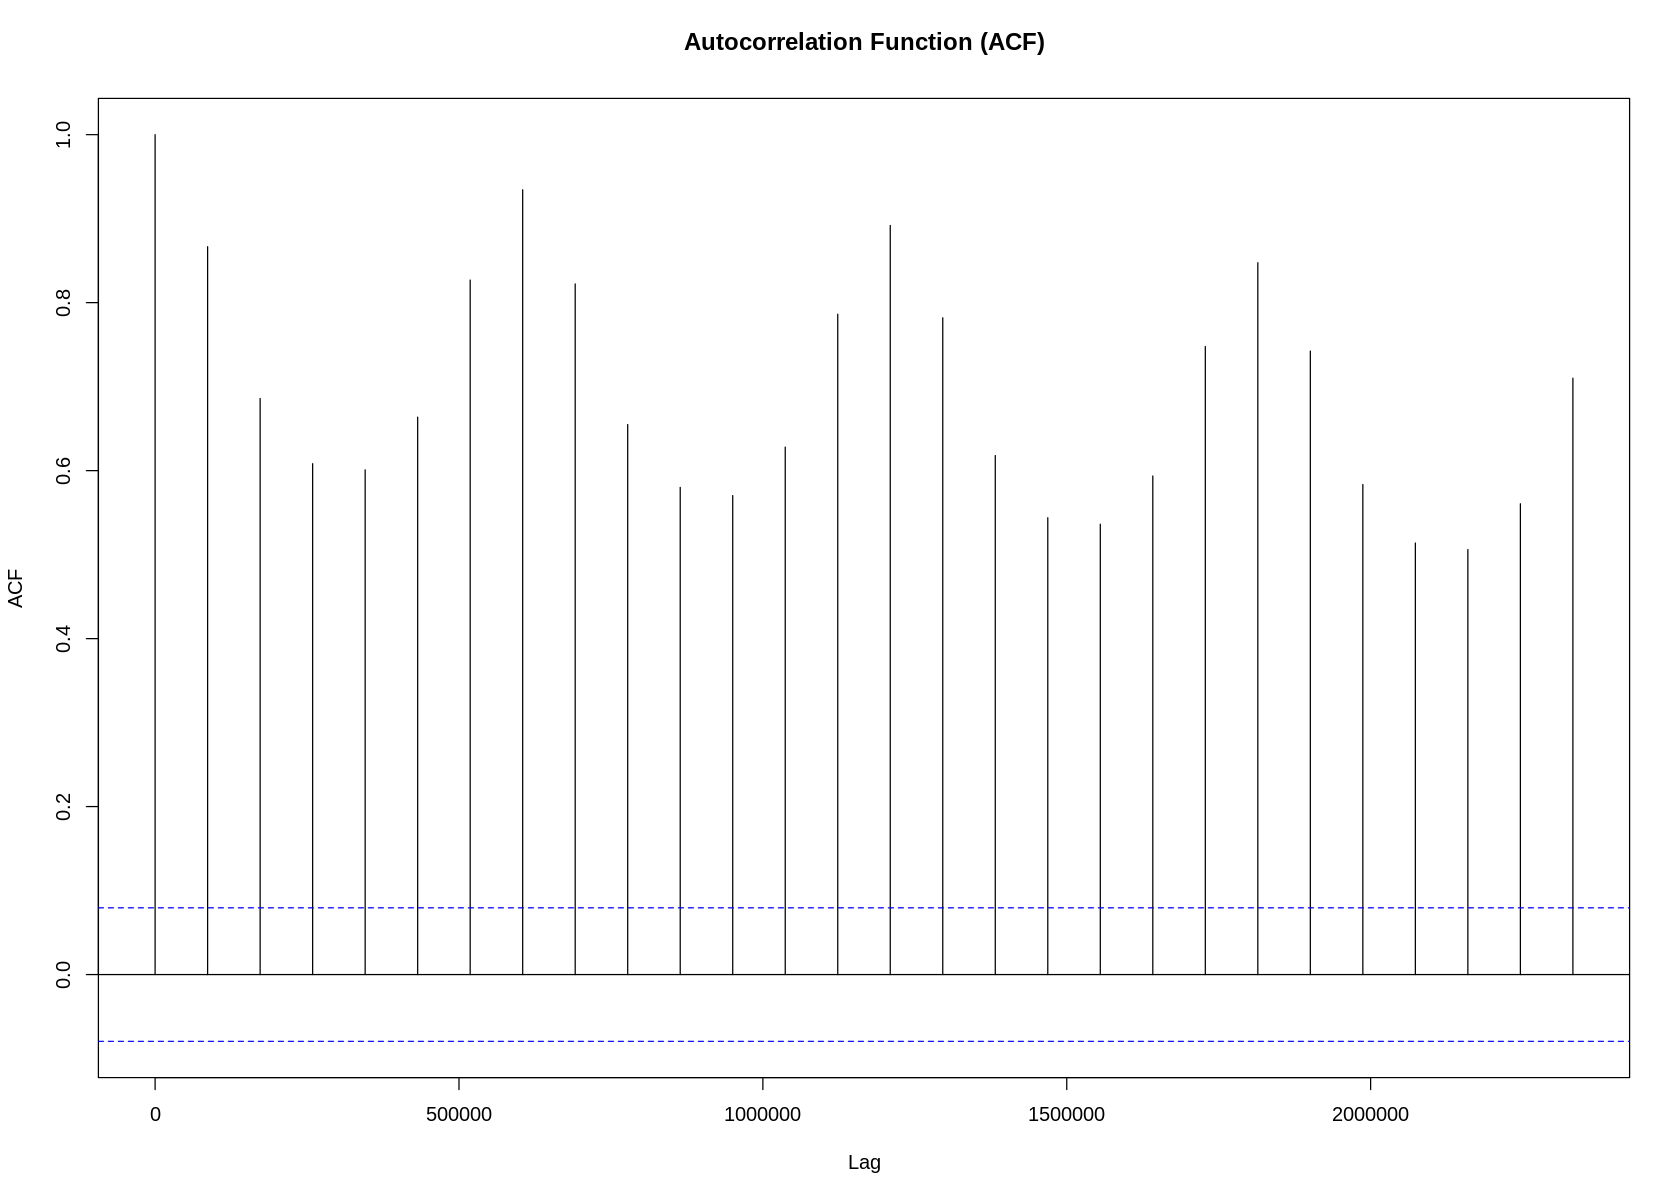

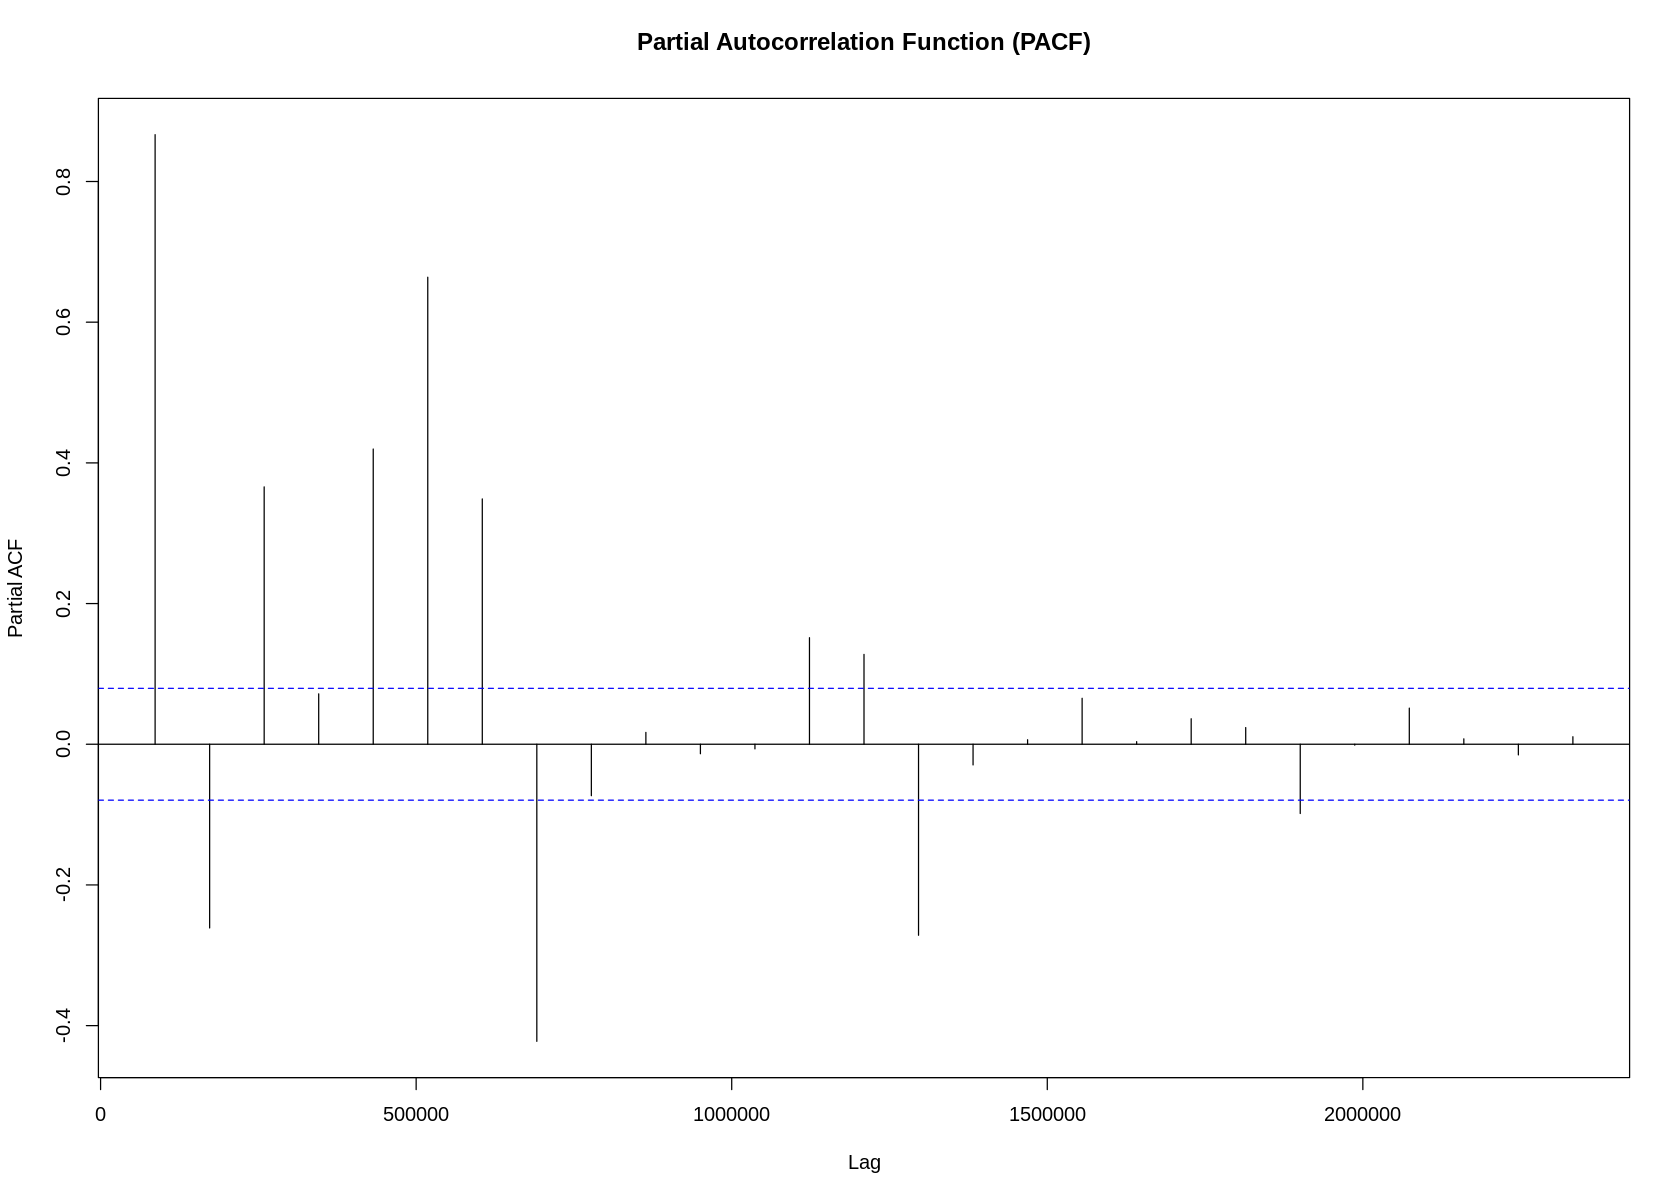

In [58]:
acf(dfJ2_xts_daily[,1], main = "Autocorrelation Function (ACF)")
pacf(dfJ2_xts_daily[,1], main = "Partial Autocorrelation Function (PACF)")


**Differencing**

In [59]:
install.packages("feasts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [60]:
library(feasts)

Loading required package: fabletools



**The function unitroot_ndiffs performs a statistical test to determine the minimum number of differentiations required.**

In [61]:
unitroot_ndiffs(dfJ2_xts_daily)

ndiffs 
     1

In [62]:
J2_diff_series <- diff(dfJ2_xts_daily[,1])

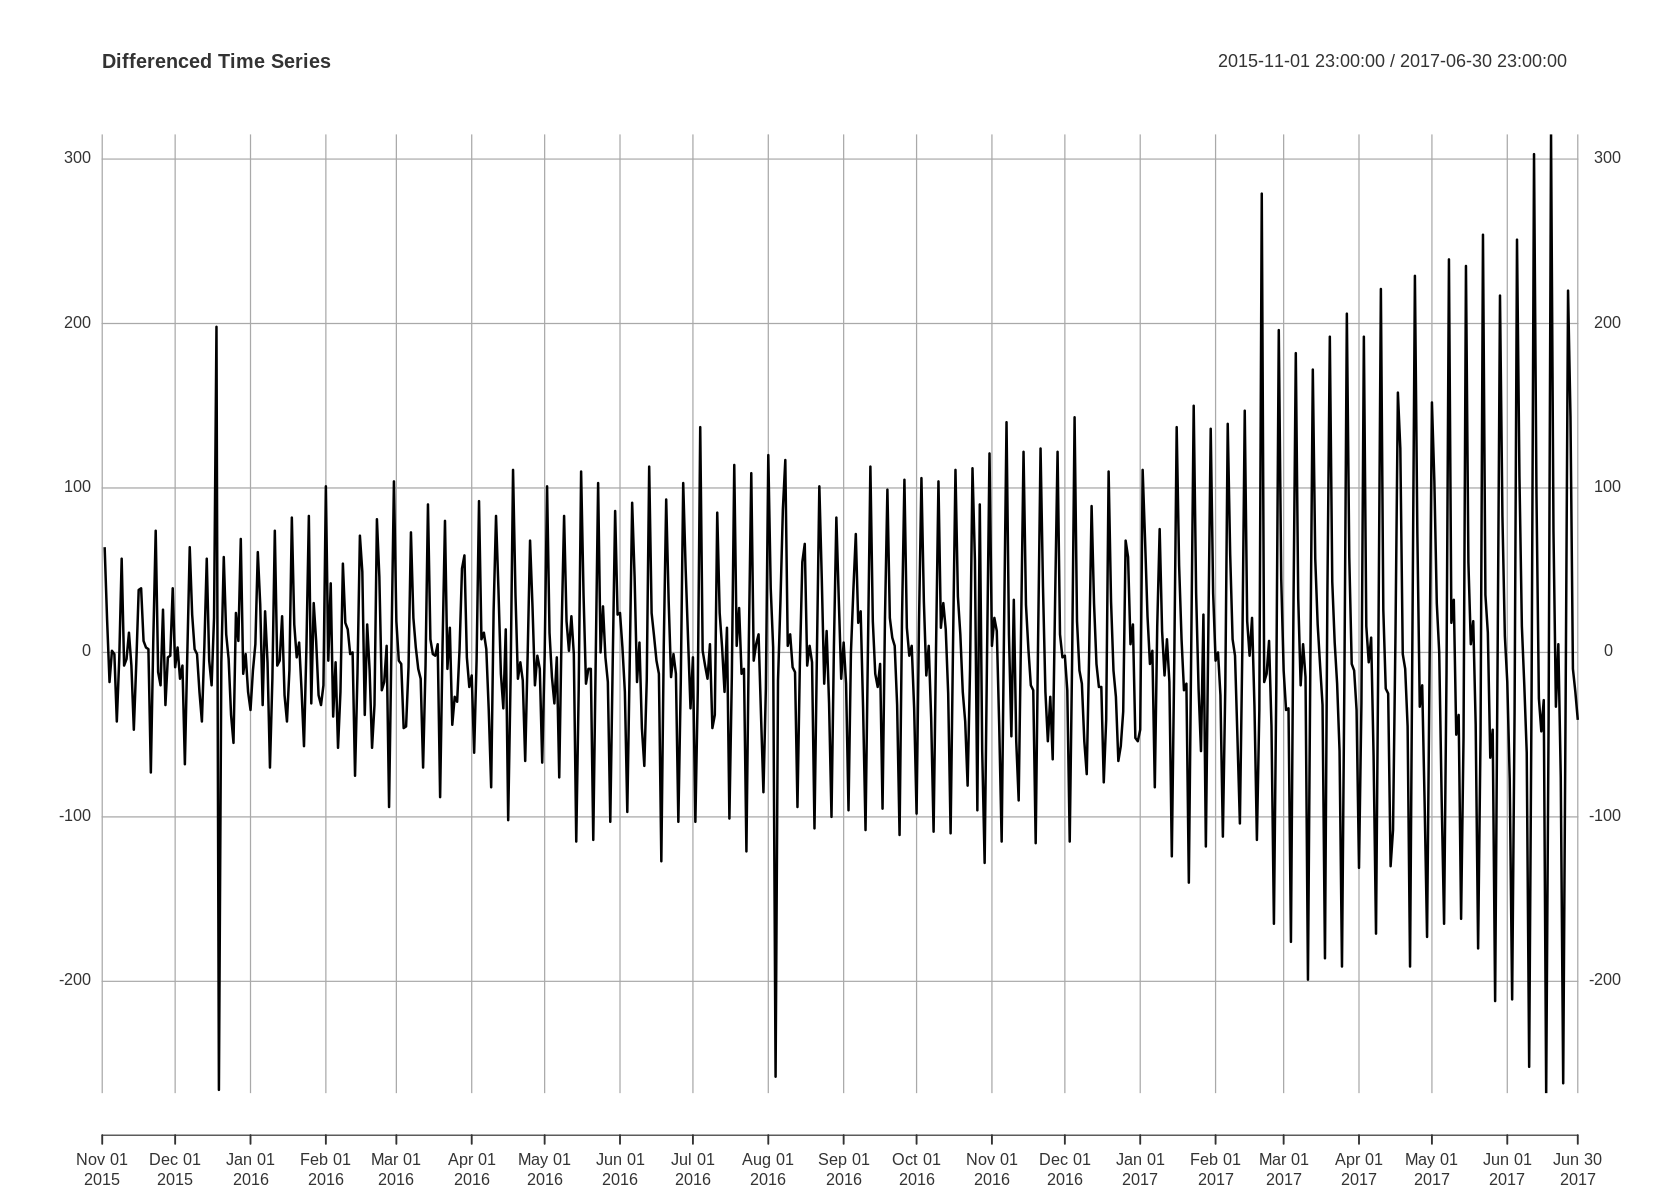

In [63]:
# Plot the differenced series
plot(J2_diff_series, main = "Differenced Time Series")

The differenced series appears more stable around a mean value of zero, indicating that the non-stationary trend in the original series has been removed.

**Fitting an ARIMA Model**

In [64]:
# Fit ARIMA model using auto.arima()
library(forecast)
arima_model <- auto.arima(J2_diff_series[,1])

# Print model summary
print(summary(arima_model))

Series: J2_diff_series[, 1] 
ARIMA(3,0,3) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1      ma2     ma3
      0.5035  -0.1178  -0.5070  -0.7524  -0.4954  0.5662
s.e.  0.0806   0.0906   0.0762   0.0696   0.0918  0.0487

sigma^2 = 2420:  log likelihood = -3224.59
AIC=6463.17   AICc=6463.36   BIC=6494.03

Training set error measures:
                   ME     RMSE      MAE MPE MAPE      MASE        ACF1
Training set 2.628466 48.94648 36.26307 NaN  Inf 0.7327828 -0.09384272


**Checking model's residuals**


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3) with zero mean
Q* = 449.12, df = 4, p-value < 2.2e-16

Model df: 6.   Total lags used: 10



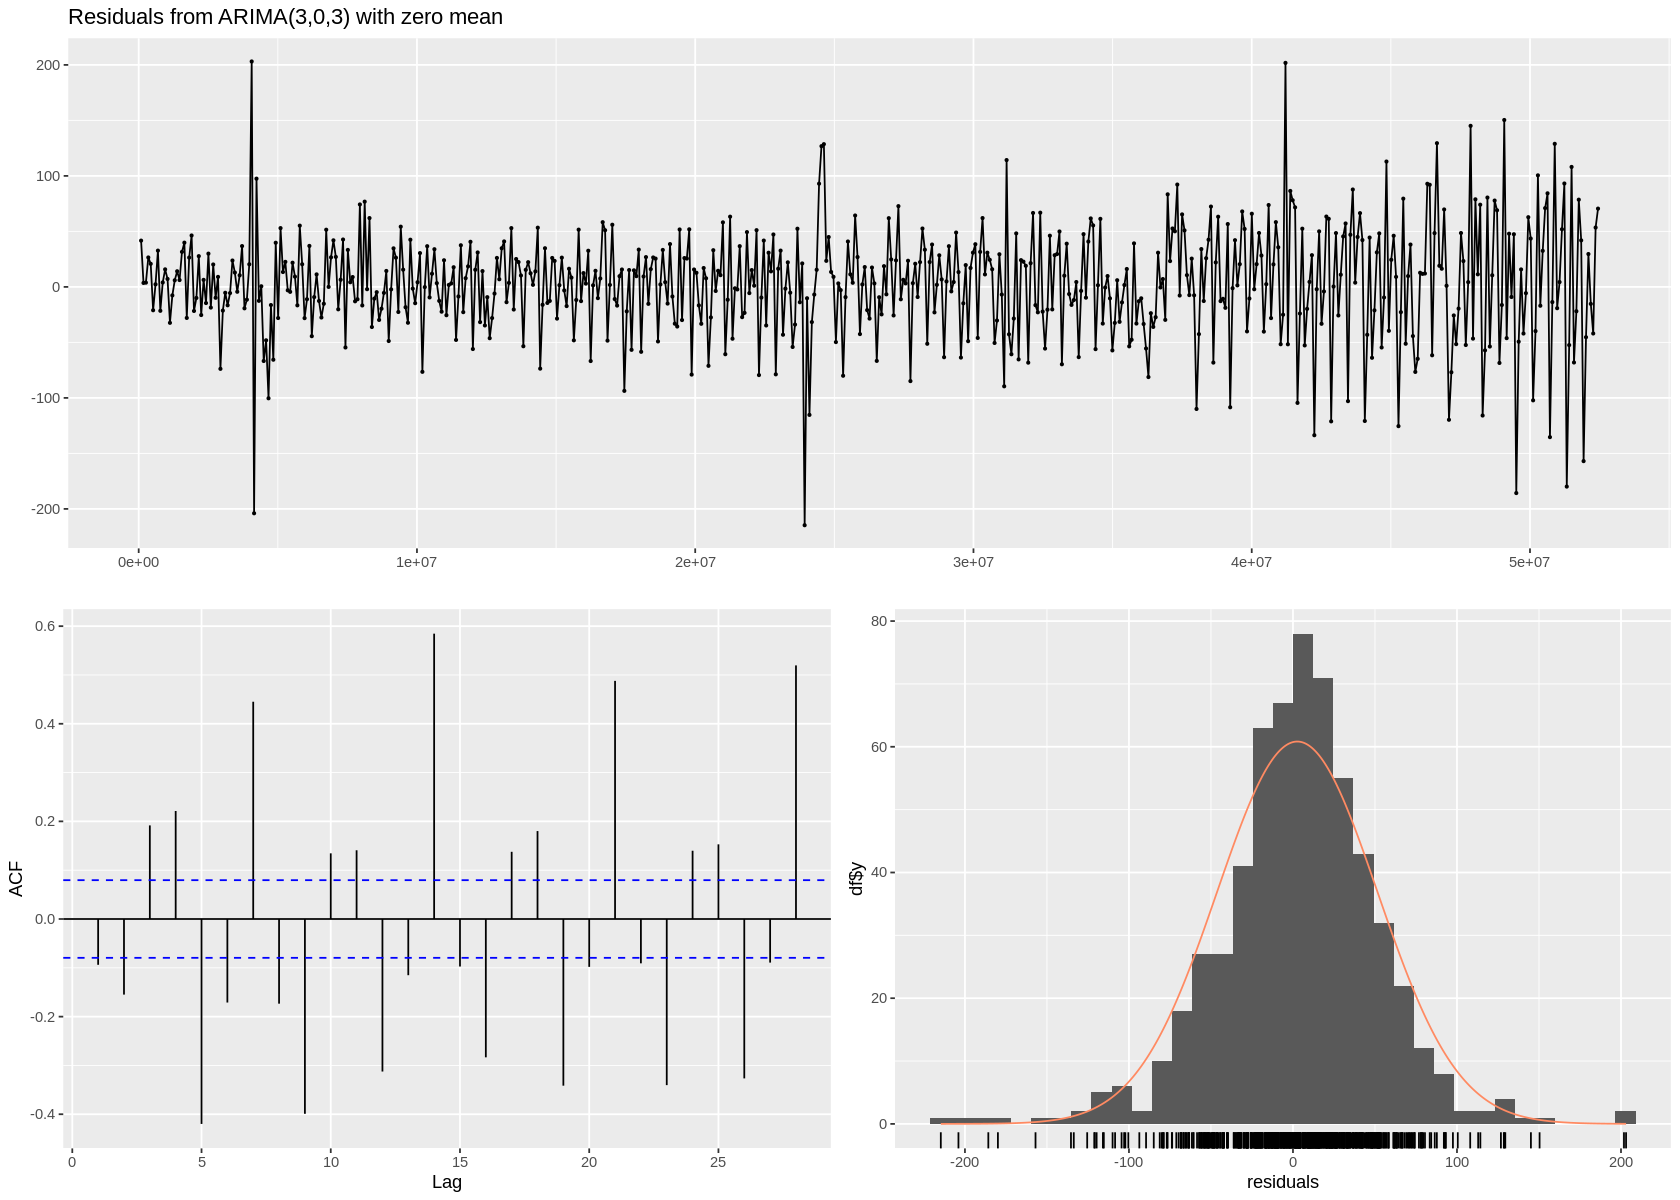

In [65]:
checkresiduals(arima_model)

The residuals from the ARIMA(3,0,3) model show some autocorrelation at specific lags, suggesting that the residuals are not purely white noise. This implies that the model may not have fully captured all underlying patterns, and further model diagnostics and adjustments might be necessary.

**Fitting a SARIMA Model**

Series: J2_diff_series[, 1] 
ARIMA(3,0,3) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1      ma2     ma3
      0.5035  -0.1178  -0.5070  -0.7524  -0.4954  0.5662
s.e.  0.0806   0.0906   0.0762   0.0696   0.0918  0.0487

sigma^2 = 2420:  log likelihood = -3224.59
AIC=6463.17   AICc=6463.36   BIC=6494.03

Training set error measures:
                   ME     RMSE      MAE MPE MAPE      MASE        ACF1
Training set 2.628466 48.94648 36.26307 NaN  Inf 0.7327828 -0.09384272


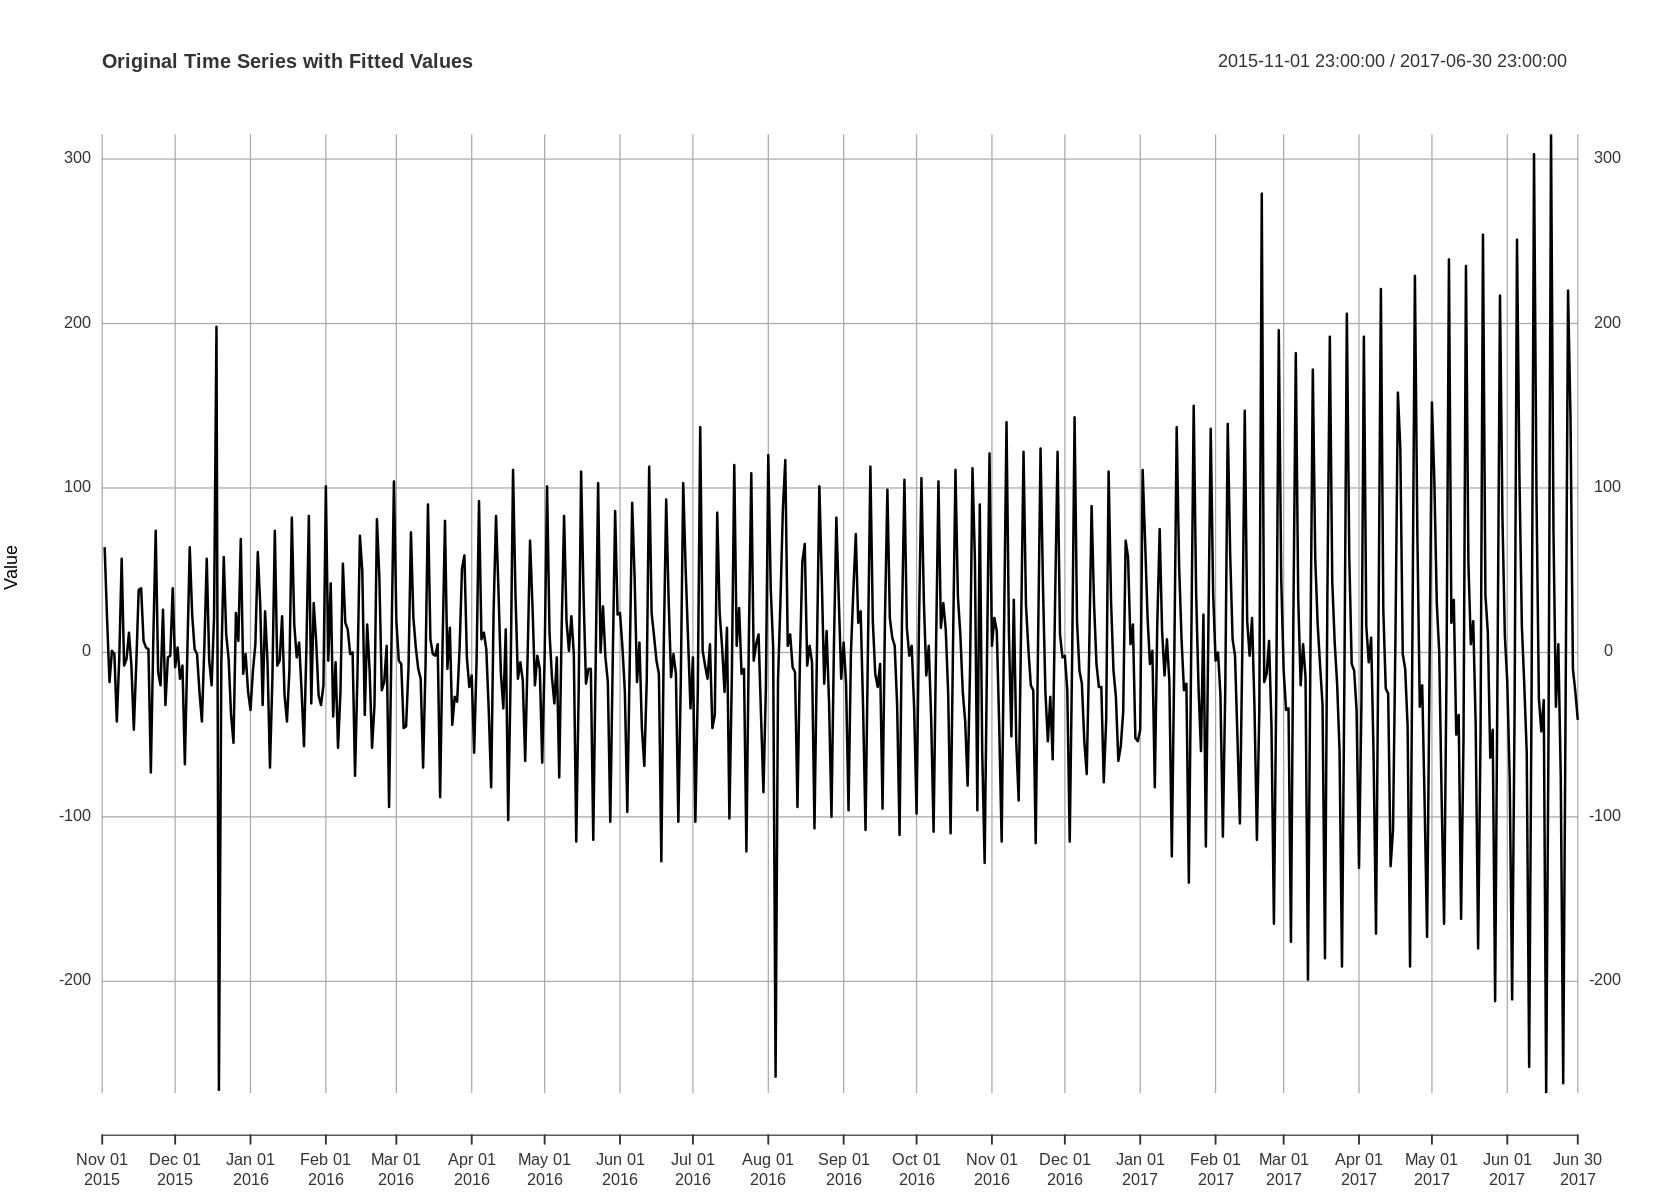

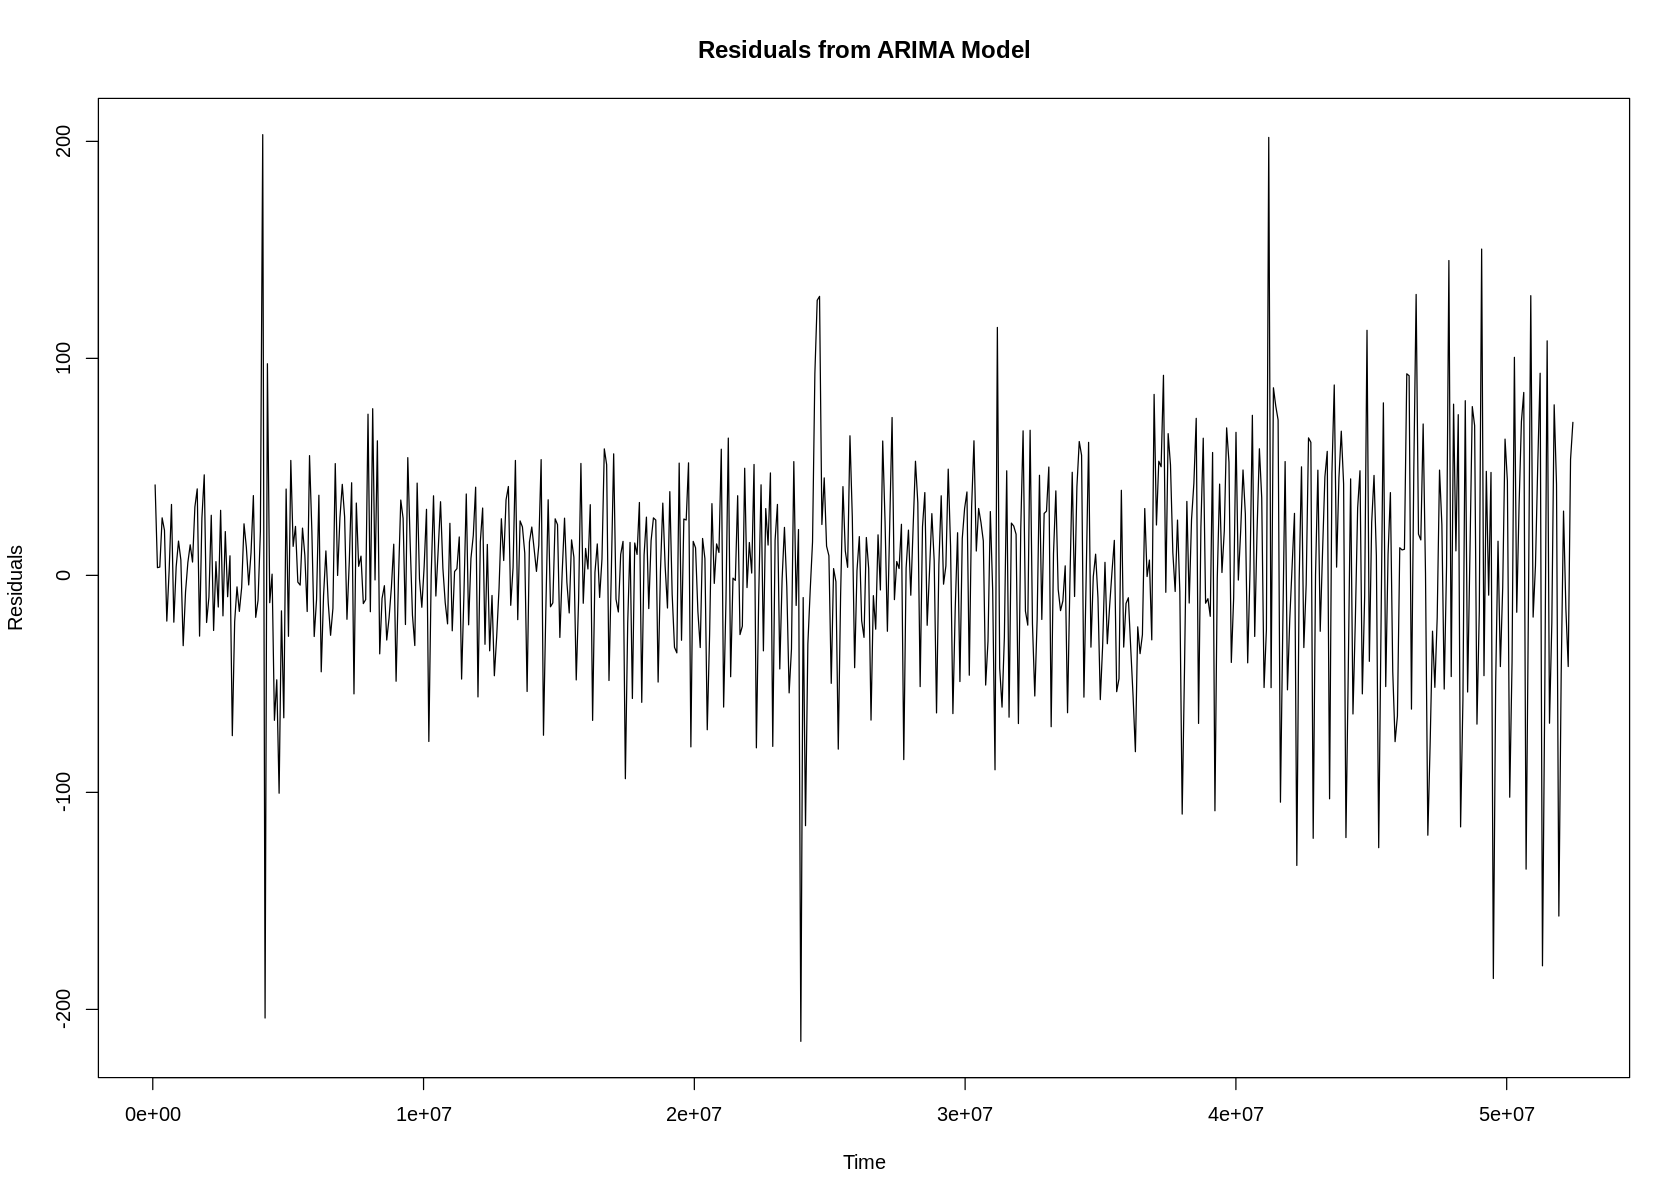

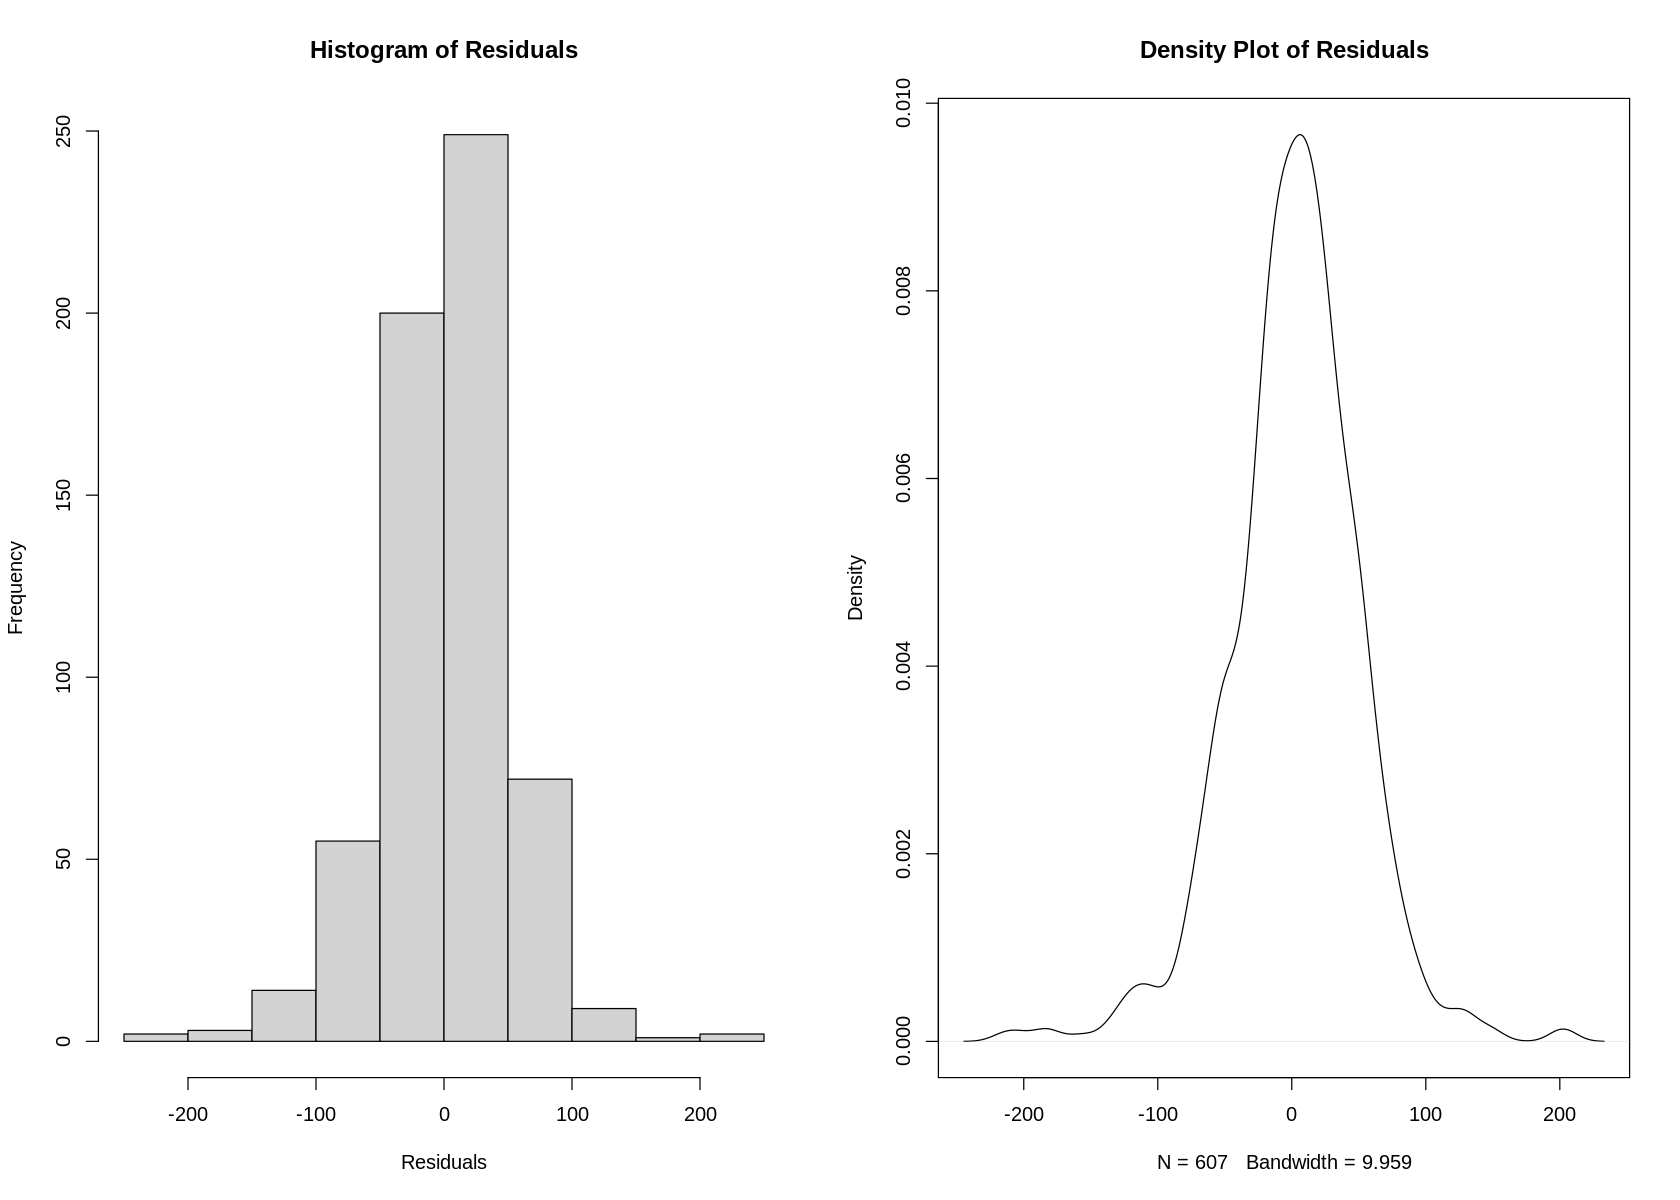


	Box-Ljung test

data:  residuals(arima_model)
X-squared = 911.13, df = 20, p-value < 2.2e-16


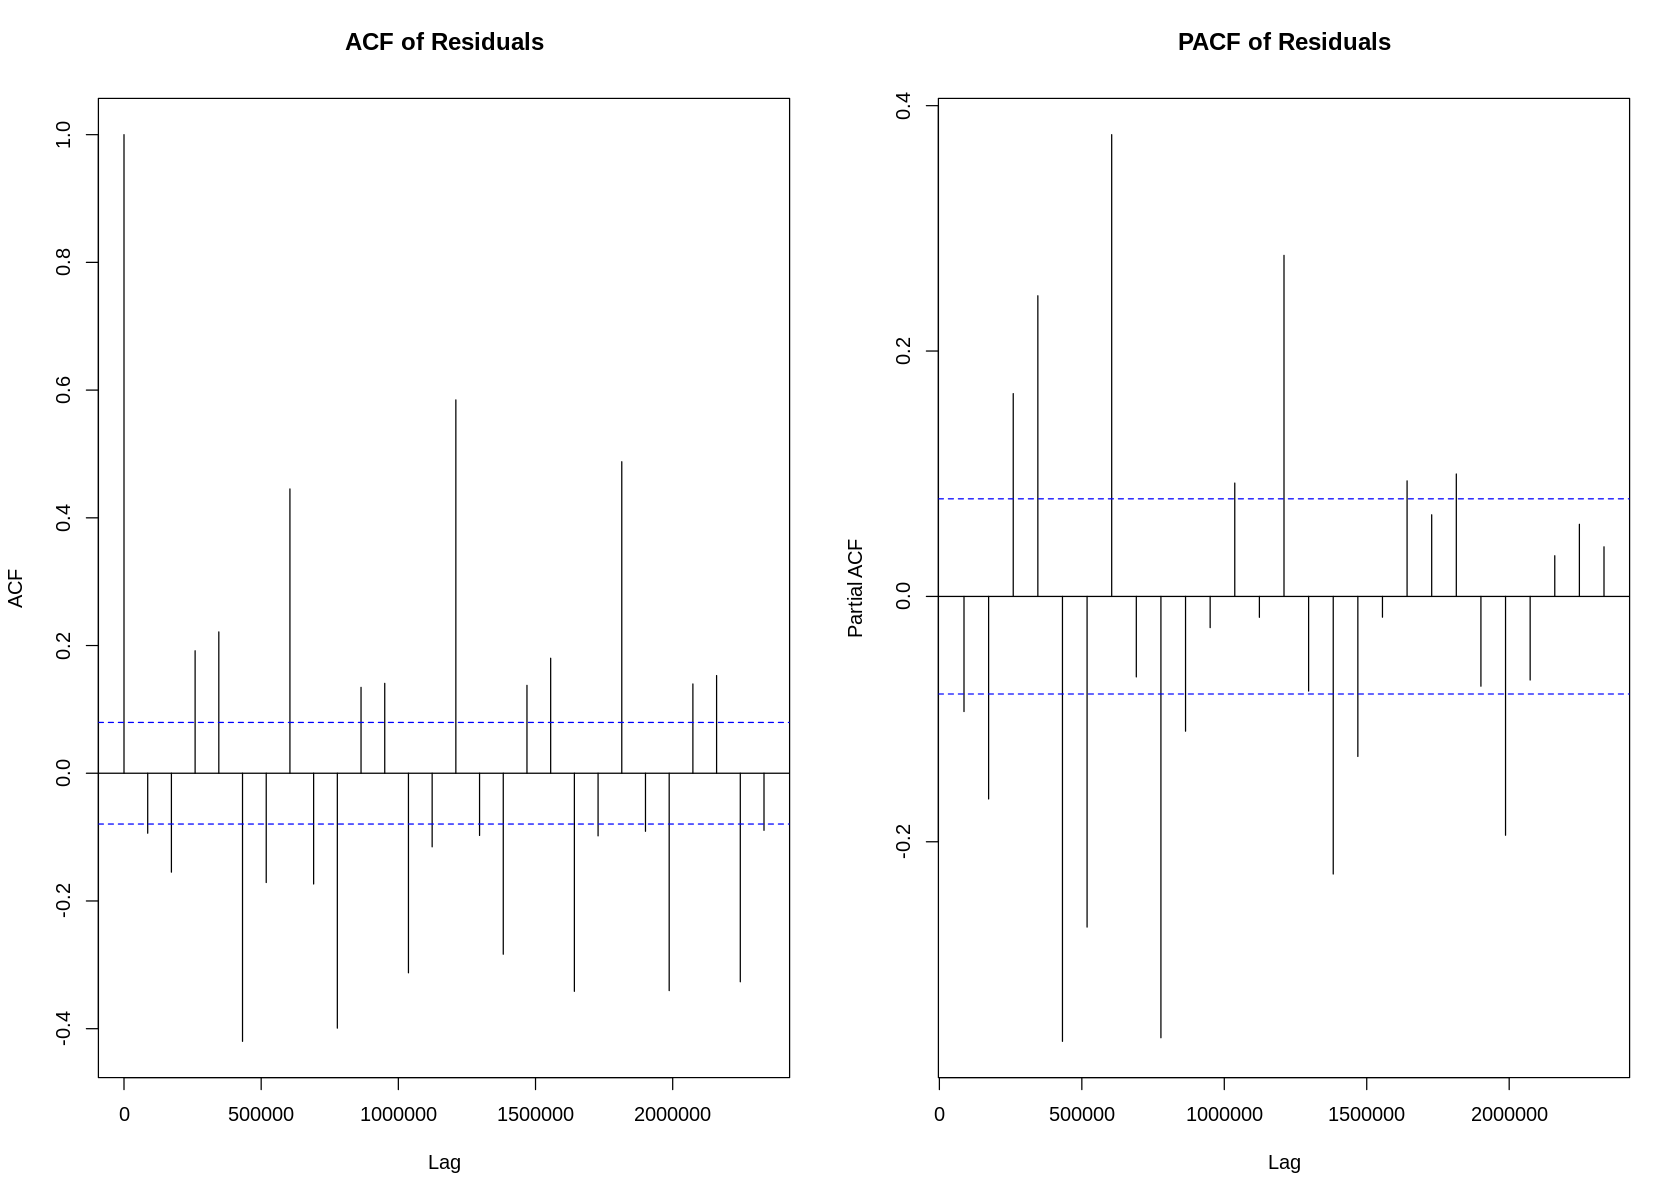

In [66]:
# Load necessary libraries
library(forecast)

# Fit an ARIMA model
arima_model <- auto.arima(J2_diff_series[,1], seasonal = TRUE)

# Print model summary
print(summary(arima_model))

# Plot original time series with fitted values
plot(J2_diff_series[,1], main = "Original Time Series with Fitted Values", ylab = "Value")
lines(fitted(arima_model), col = "red")

# Plot residuals
plot(residuals(arima_model), main = "Residuals from ARIMA Model", ylab = "Residuals")

# Histogram and density plot of residuals
par(mfrow = c(1, 2))
hist(residuals(arima_model), main = "Histogram of Residuals", xlab = "Residuals")
plot(density(residuals(arima_model)), main = "Density Plot of Residuals")

# ACF and PACF of residuals
par(mfrow = c(1, 2))
acf(residuals(arima_model), main = "ACF of Residuals")
pacf(residuals(arima_model), main = "PACF of Residuals")

# Ljung-Box test for autocorrelation in residuals
Box.test(residuals(arima_model), lag = 20, type = "Ljung-Box")


**Trying a forecast**

In [67]:
forecast(arima_model,12) # forecast on  12  day period

         Point Forecast       Lo 80     Hi 80      Lo 95     Hi 95
52531201    -116.064799 -179.104577 -53.02502 -212.47582 -19.65378
52617601     -46.097190 -111.060496  18.86612 -145.44999  53.25561
52704001      51.173973  -28.747944 131.09589  -71.05605 173.40400
52790401      90.039354    8.146102 171.93261  -35.20557 215.28428
52876801      62.677260  -19.336612 144.69113  -62.75213 188.10665
52963201      -4.992957  -91.637053  81.65114 -137.50367 127.51775
53049601     -55.545845 -145.089260  33.99757 -192.49068  81.39899
53136001     -59.155640 -148.888886  30.57761 -196.39080  78.07952
53222401     -20.710303 -111.512656  70.09205 -159.58052 118.15991
53308801      24.701720  -68.096118 117.49956 -117.22033 166.62377
53395201      44.868002  -48.574638 138.31064  -98.04018 187.77619
53481601      30.181042  -63.338049 123.70013 -112.84406 173.20615

### Stochastic Part

Warning message in adf.test(Model.res.s1$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Model.res.s1$residuals
Dickey-Fuller = -9.8325, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



Call:
arima(x = residuals(arima_model), order = c(3, 0, 3), seasonal = list(order = c(1, 
    1, 1), period = 7))

Coefficients:
         ar1     ar2      ar3      ma1     ma2     ma3     sar1     sma1
      0.6136  0.1978  -0.3777  -0.7306  0.3711  0.3093  -0.1891  -0.7503
s.e.  0.2966  0.2210   0.0804   0.3082  0.2695  0.2173   0.0528   0.0389

sigma^2 estimated as 816.4:  log likelihood = -2868.63,  aic = 5755.25

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.2541066 28.40768 18.99921 -124.9194 255.9571 0.3492565
                    ACF1
Training set -0.01017755


	Ljung-Box test

data:  Residuals from ARIMA(3,0,3)(1,1,1)[7]
Q* = 11.989, df = 3, p-value = 0.007421

Model df: 8.   Total lags used: 11



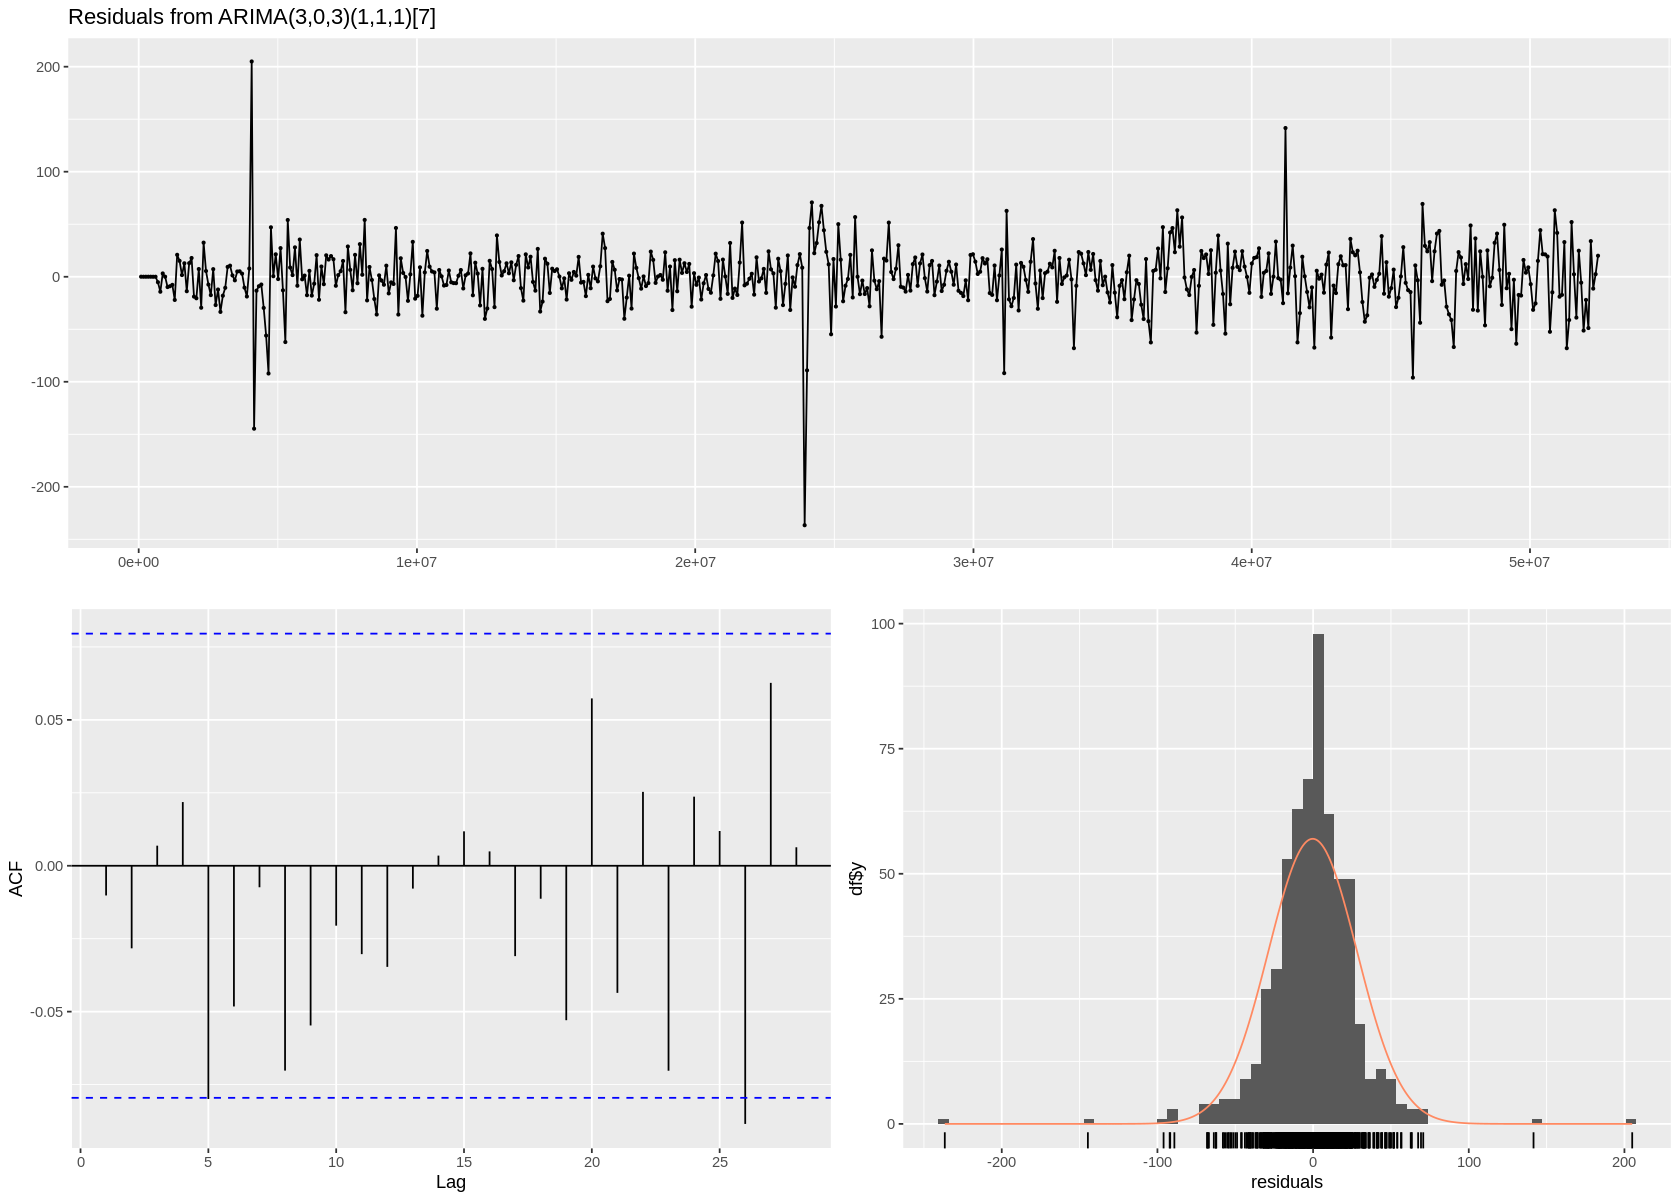

In [68]:
Model.res.s1<-arima(residuals(arima_model), order = c(3, 0, 3),seasonal = list(order = c(1,1,1), period = 7))
adf.test(Model.res.s1$residuals)
summary(Model.res.s1)
checkresiduals(Model.res.s1)

### Forecasting with SARIMA

In [69]:
forecast(Model.res.s1 ,7)

         Point Forecast      Lo 80     Hi 80      Lo 95     Hi 95
52531201    -123.955085 -160.57275 -87.33742 -179.95697 -67.95320
52617601     -19.969511  -56.83705  16.89802  -76.35354  36.41452
52704001     107.386766   66.27051 148.50302   44.50488 170.26865
52790401     -29.707119  -71.55965  12.14541  -93.71504  34.30080
52876801       7.255523  -35.77836  50.28940  -58.55912  73.07016
52963201      55.331160   12.28956  98.37276  -10.49529 121.15761
53049601      55.599289   12.55511  98.64347  -10.23110 121.42968

## **Junction 3**

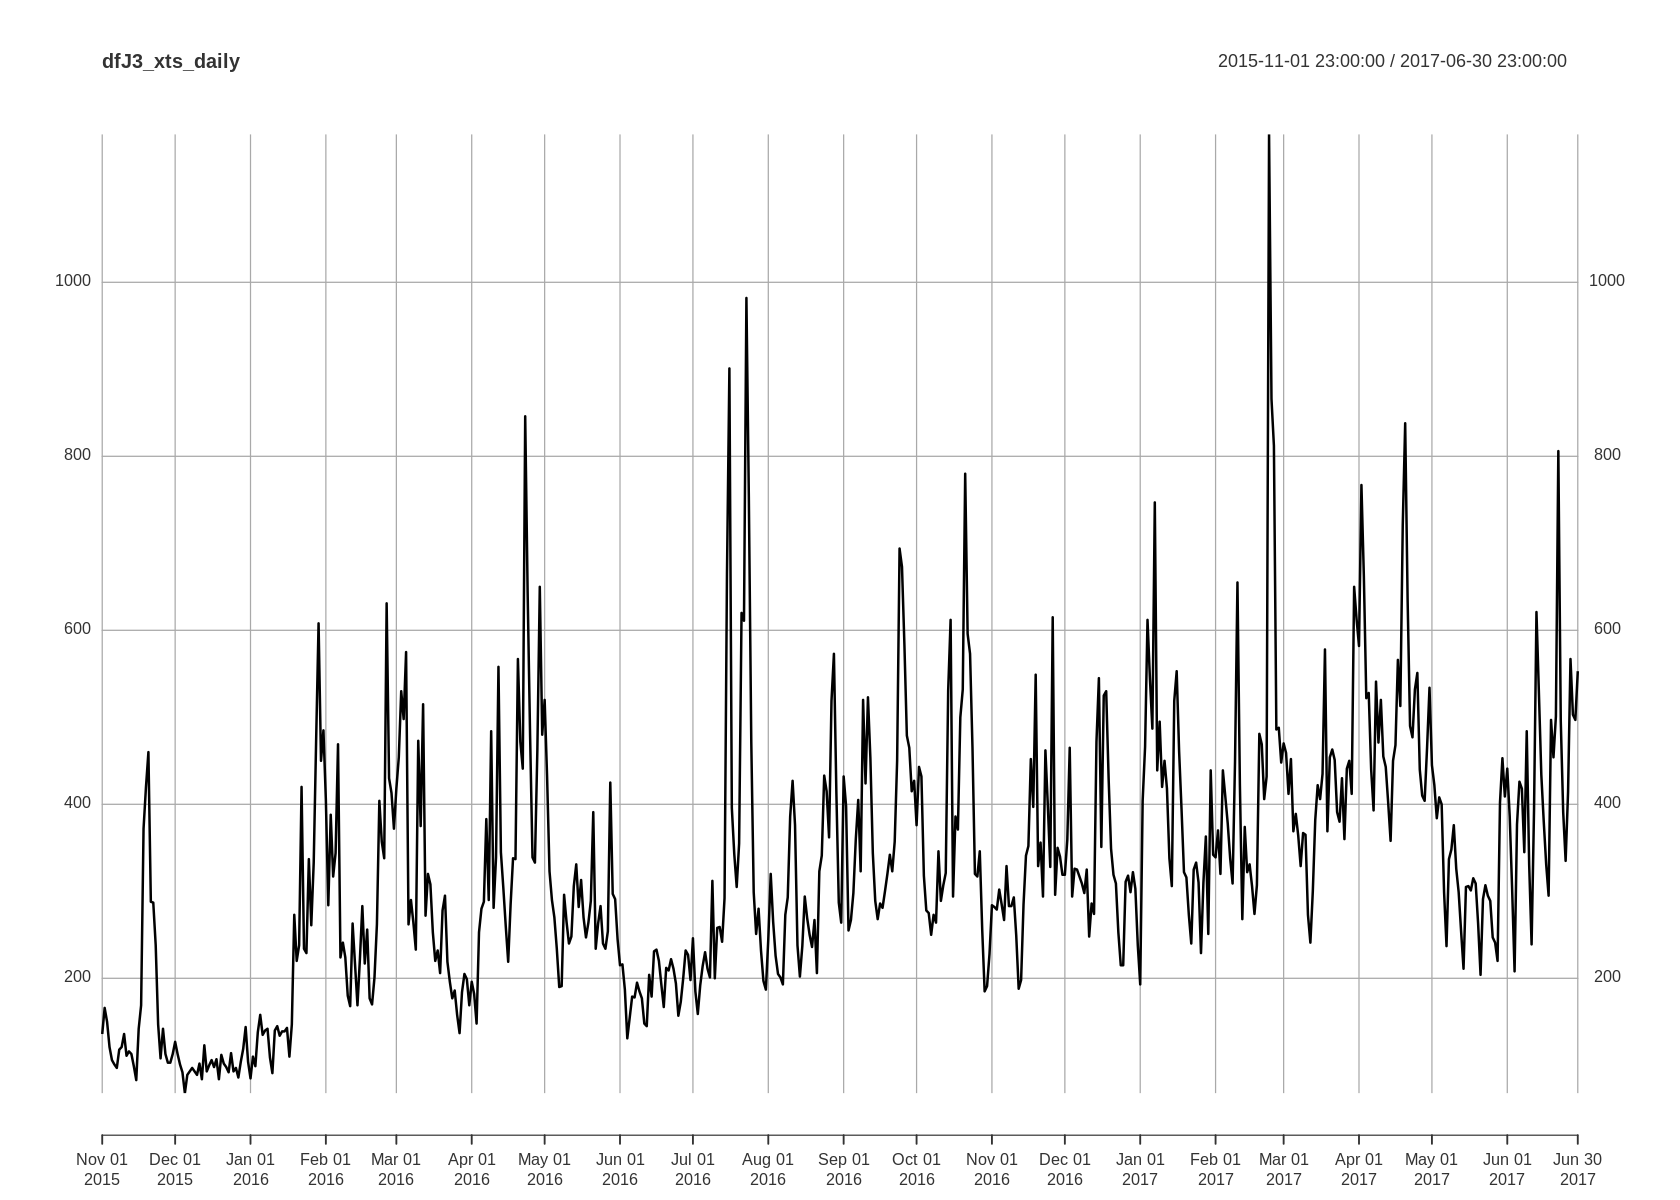

In [70]:
plot(dfJ3_xts_daily)

**Linear Regression**

In [71]:
# Perform linear regression
lm_model <- lm(dfJ3_xts_daily[,1] ~ index(dfJ2_xts_daily), data = dfJ3_xts_daily)

# Print summary of the linear regression model
summary(lm_model)


Call:
lm(formula = dfJ3_xts_daily[, 1] ~ index(dfJ2_xts_daily), data = dfJ3_xts_daily)

Residuals:
    Min      1Q  Median      3Q     Max 
-243.90  -86.34  -33.63   49.27  762.95 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -7.241e+03  5.232e+02  -13.84   <2e-16 ***
index(dfJ2_xts_daily)  5.140e-06  3.553e-07   14.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 132.9 on 606 degrees of freedom
Multiple R-squared:  0.2567,	Adjusted R-squared:  0.2555 
F-statistic: 209.3 on 1 and 606 DF,  p-value: < 2.2e-16


**Enhancing Linear regression**

In [72]:
# Apply logarithmic transformation to the dependent variable
log_counts <- log(dfJ3_xts_daily[,1])

# Perform linear regression on the transformed data
lm_model_log <- lm(log_counts ~ index(dfJ3_xts_daily), data = dfJ3_xts_daily)

# Print summary of the linear regression model
summary(lm_model_log)


Call:
lm(formula = log_counts ~ index(dfJ3_xts_daily), data = dfJ3_xts_daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99890 -0.24694 -0.03838  0.21691  1.28233 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.351e+01  1.575e+00  -14.93   <2e-16 ***
index(dfJ3_xts_daily)  1.982e-08  1.070e-09   18.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4 on 606 degrees of freedom
Multiple R-squared:  0.3617,	Adjusted R-squared:  0.3606 
F-statistic: 343.4 on 1 and 606 DF,  p-value: < 2.2e-16


The linear regression model indicates a significant positive relationship between time and the logarithm of counts. However, the R-squared value suggests that there is still a substantial amount of variability not explained by the model,

**Studying Stationarity**

In [73]:
adf_test <- adf.test(dfJ3_xts_daily[,1], alternative = "stationary")
print(adf_test)

Warning message in adf.test(dfJ3_xts_daily[, 1], alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dfJ3_xts_daily[, 1]
Dickey-Fuller = -5.8433, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



The p-value (0.01) is less than the common significance level (e.g., 0.05), indicating that we acccept the null hypothesis of non-stationarity.

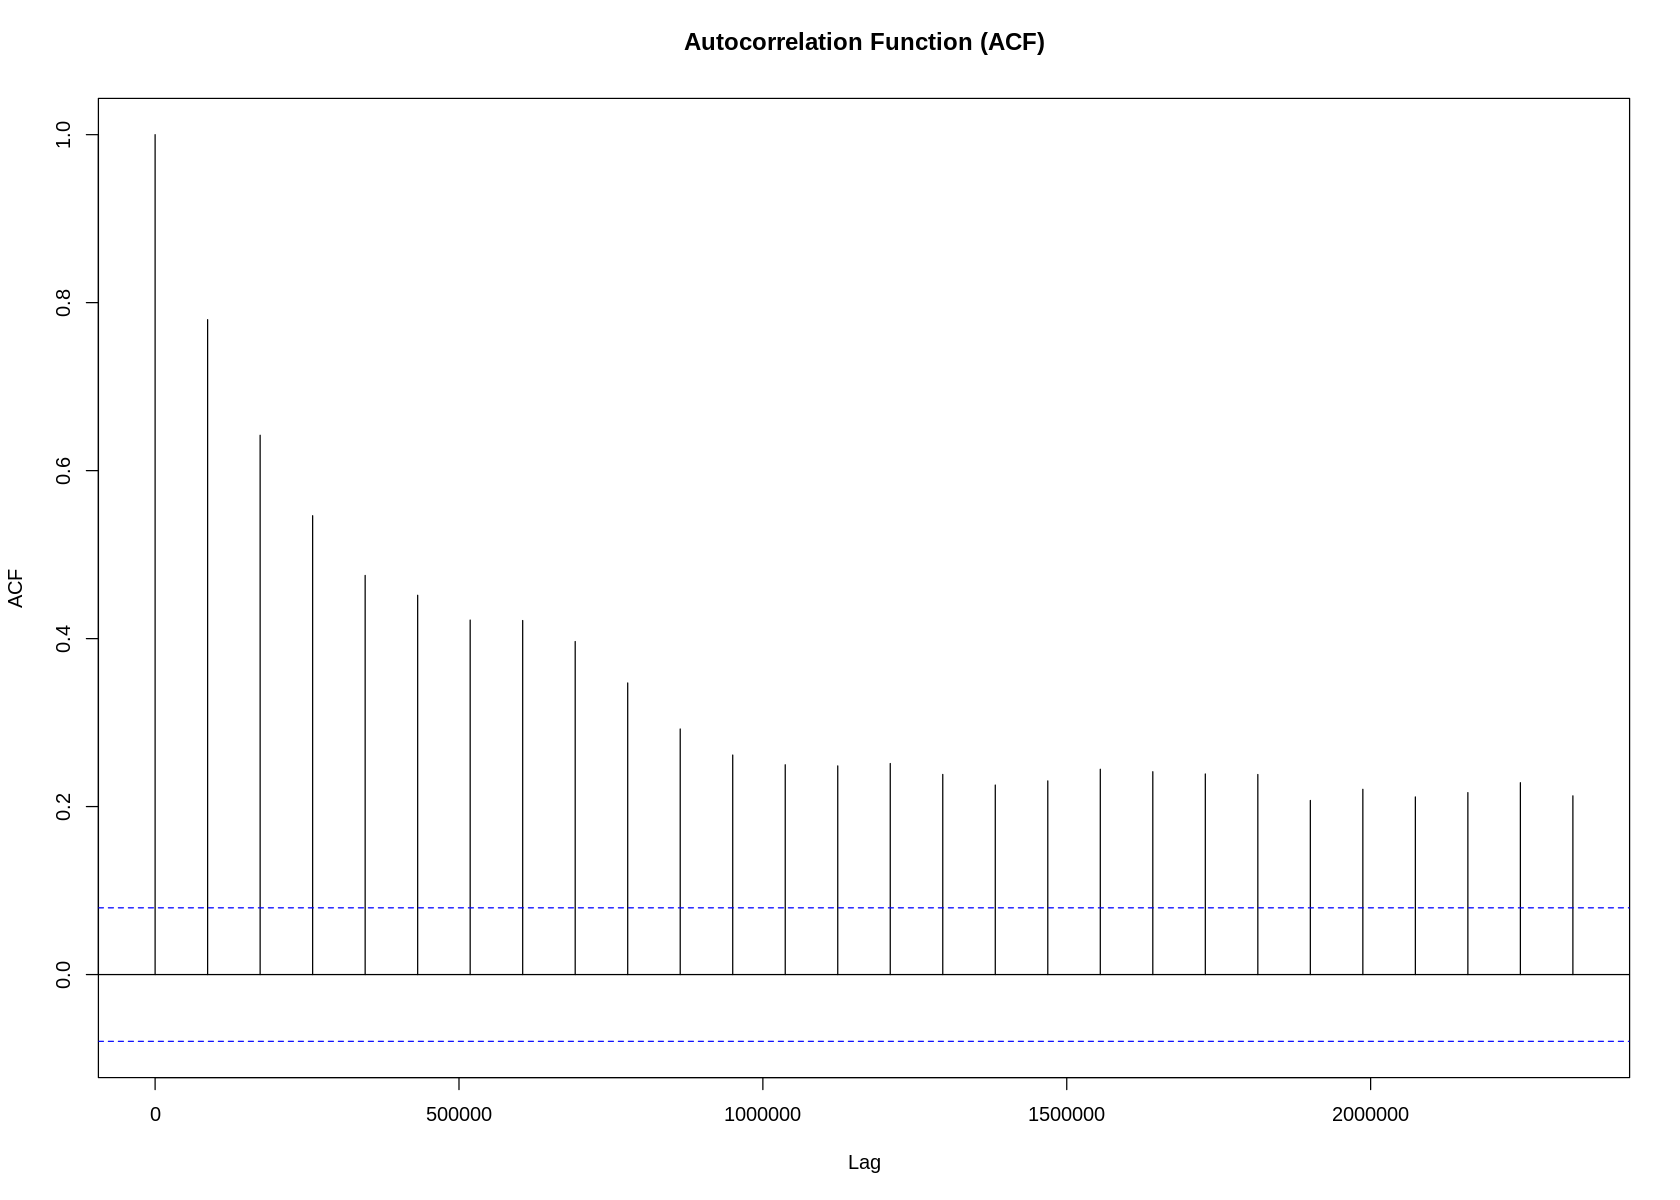

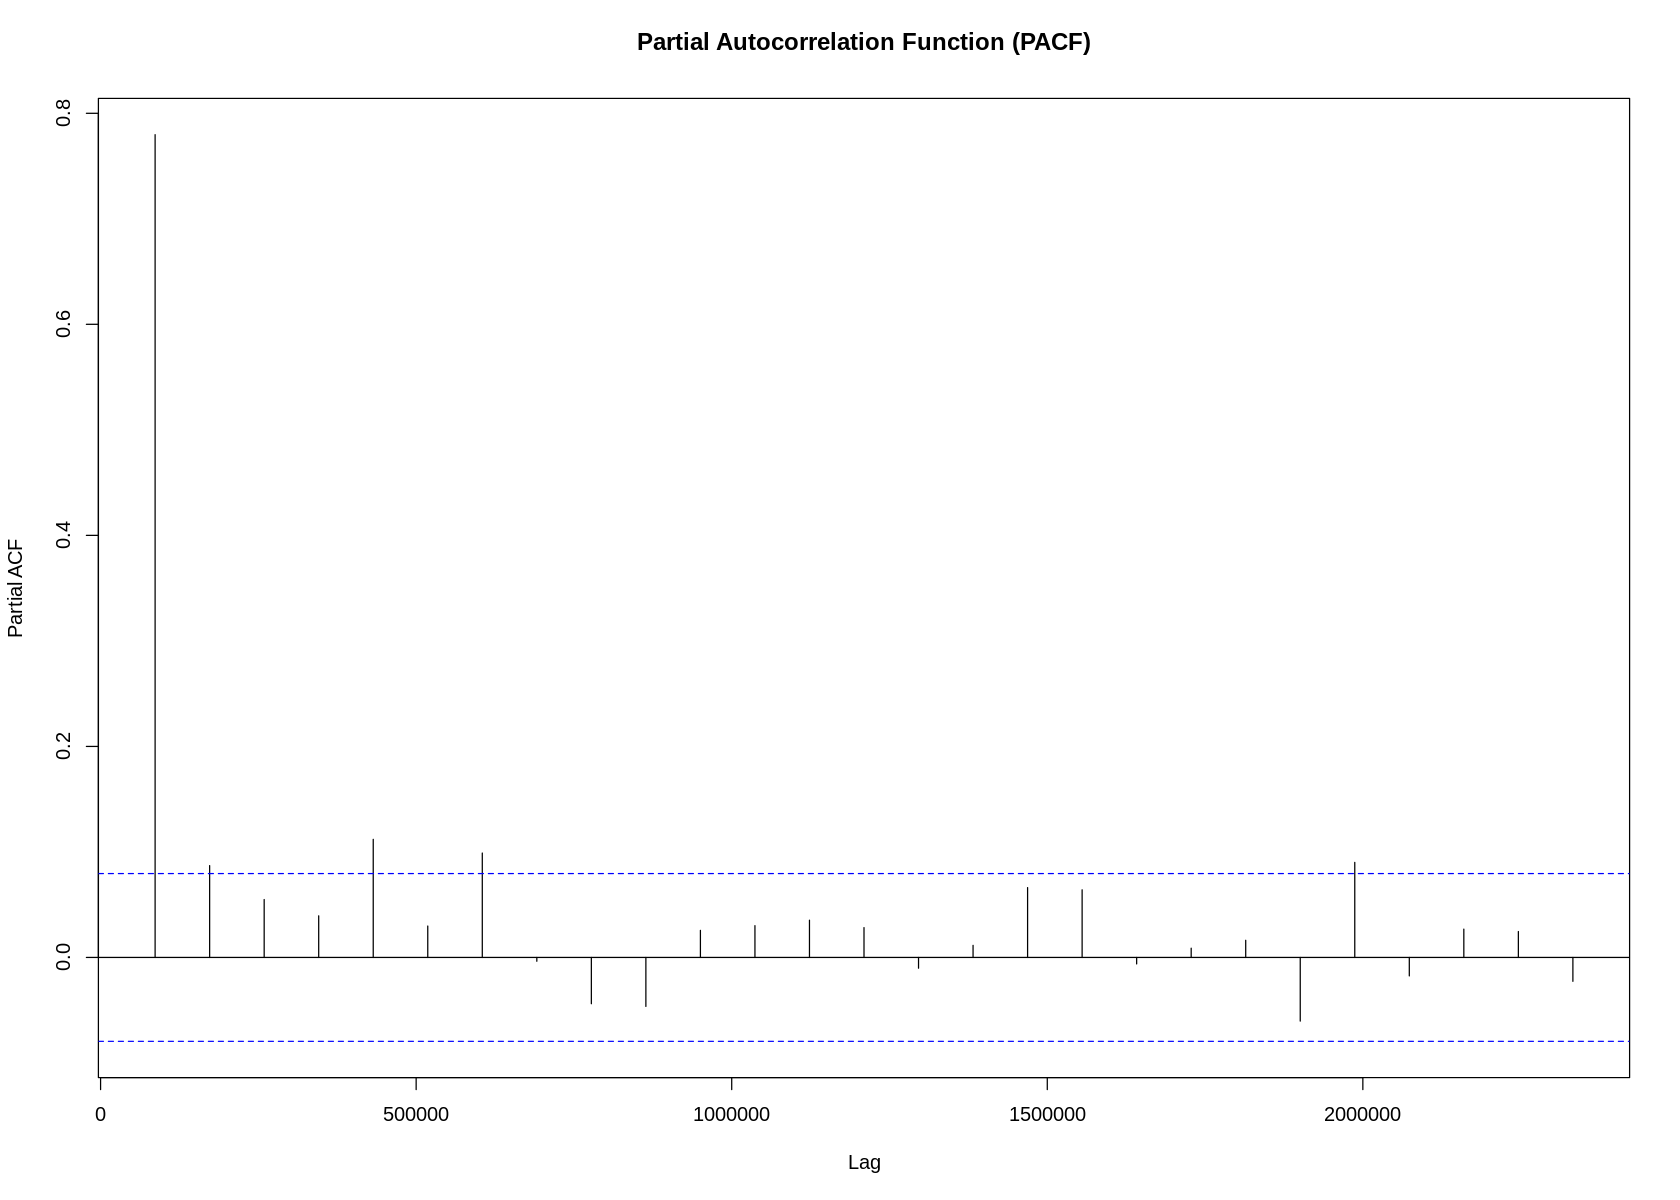

In [74]:
acf(dfJ3_xts_daily[,1], main = "Autocorrelation Function (ACF)")
pacf(dfJ3_xts_daily[,1], main = "Partial Autocorrelation Function (PACF)")


**Fitting an ARIMA Model**

In [75]:
# Fit ARIMA model using auto.arima()
library(forecast)
arima_model <- auto.arima(dfJ3_xts_daily[,1])

# Print model summary
print(summary(arima_model))

Series: dfJ3_xts_daily[, 1] 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.6875  -0.9727
s.e.  0.0363   0.0138

sigma^2 = 8950:  log likelihood = -3622.65
AIC=7251.3   AICc=7251.34   BIC=7264.53

Training set error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 5.31949 94.37248 61.92694 -3.980484 18.40941 0.1884246 -0.03006755


**Checking model's residuals**


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 11.913, df = 8, p-value = 0.1551

Model df: 2.   Total lags used: 10



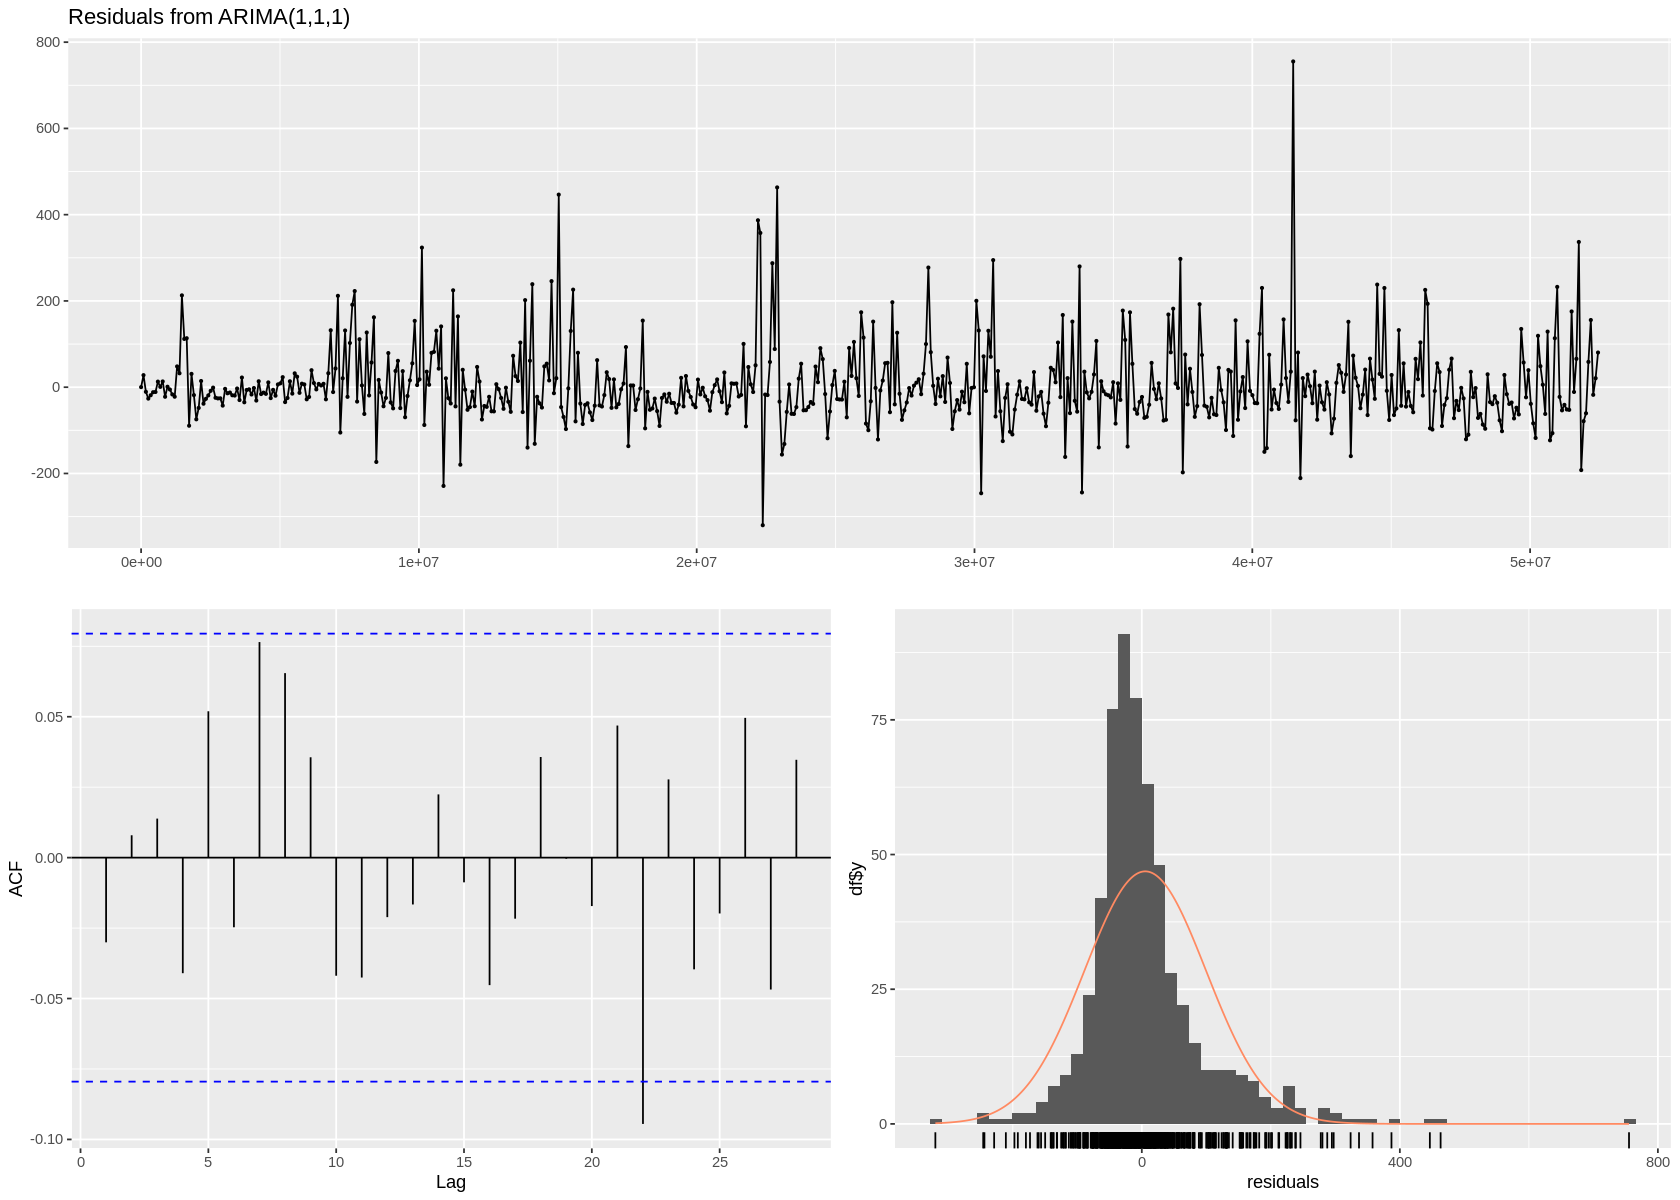

In [76]:
checkresiduals(arima_model)

The p-value is greater than 0.05, indicating that there is no significant autocorrelation in the residuals. The residuals resemble white noise.The histogram is approximately normal, centered around zero. The overlaid curve confirms the normal distribution of residuals.

**Fitting a SARIMA Model**

Series: dfJ3_xts_daily[, 1] 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.6875  -0.9727
s.e.  0.0363   0.0138

sigma^2 = 8950:  log likelihood = -3622.65
AIC=7251.3   AICc=7251.34   BIC=7264.53

Training set error measures:
                  ME     RMSE      MAE       MPE     MAPE      MASE        ACF1
Training set 5.31949 94.37248 61.92694 -3.980484 18.40941 0.1884246 -0.03006755


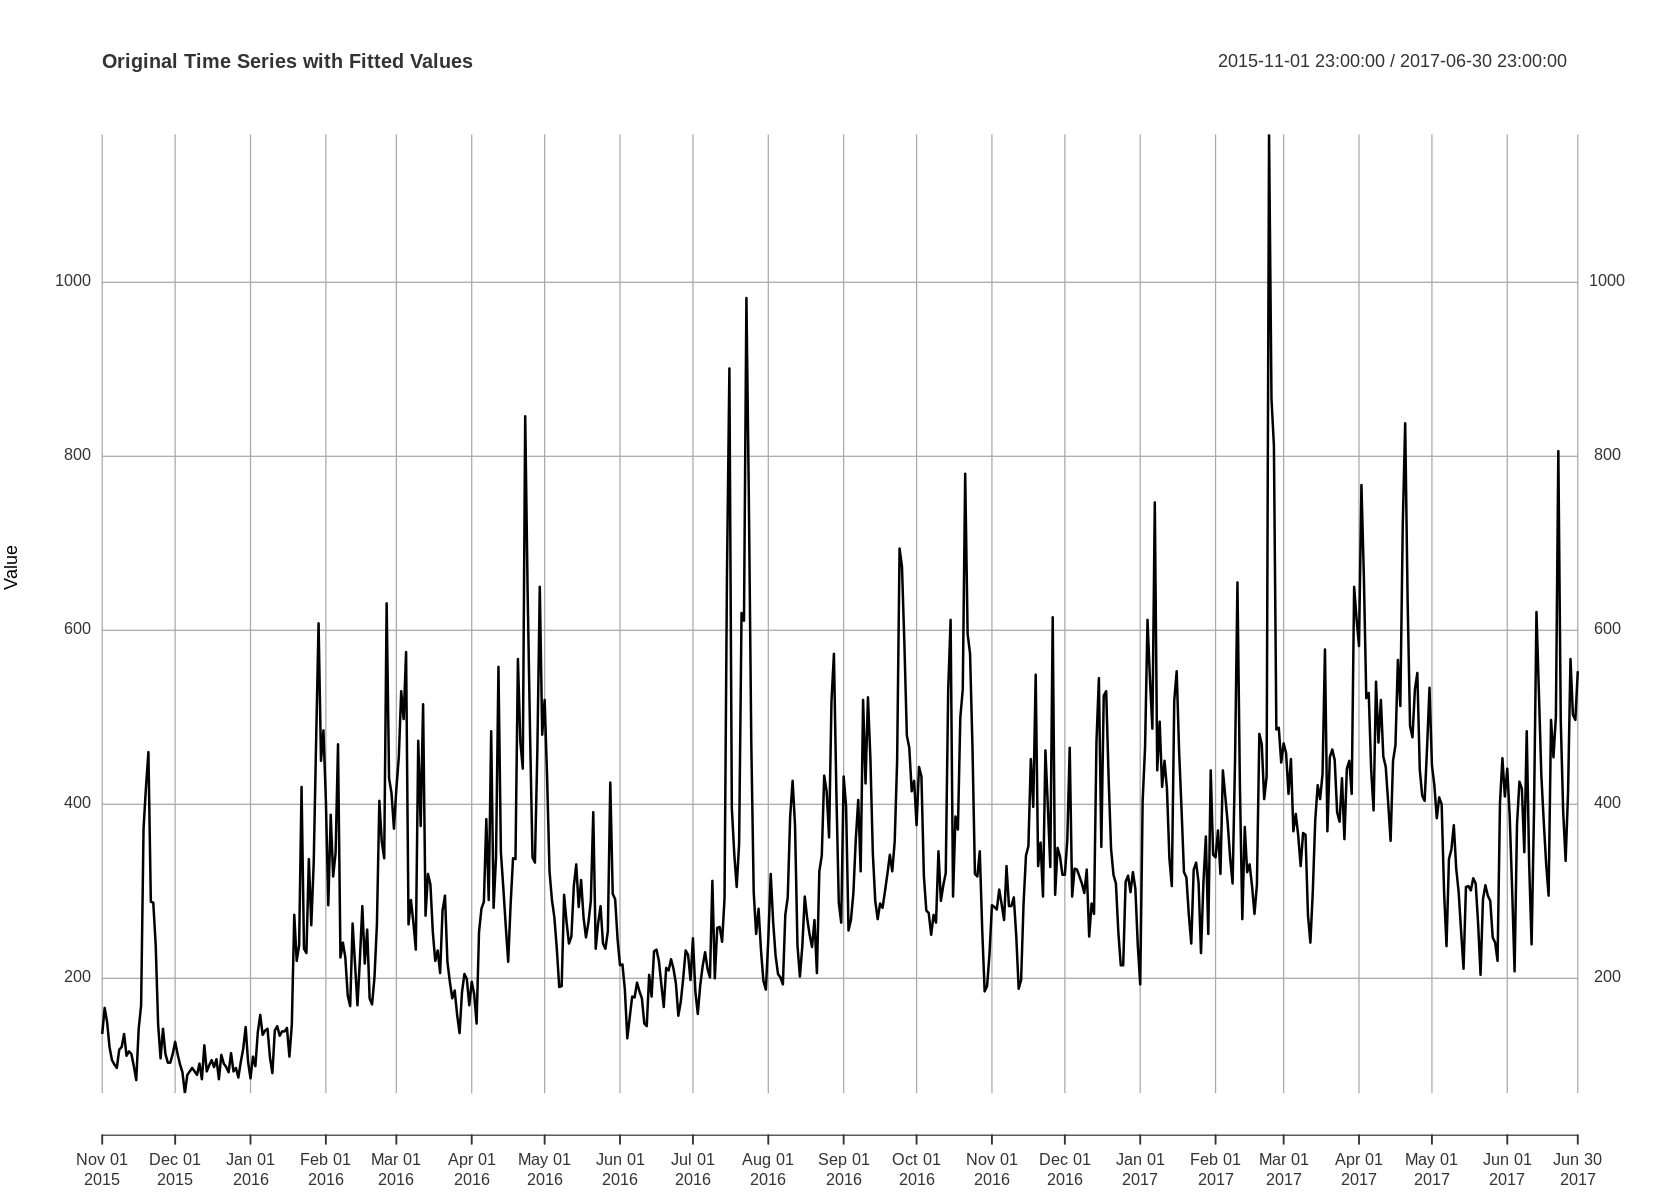

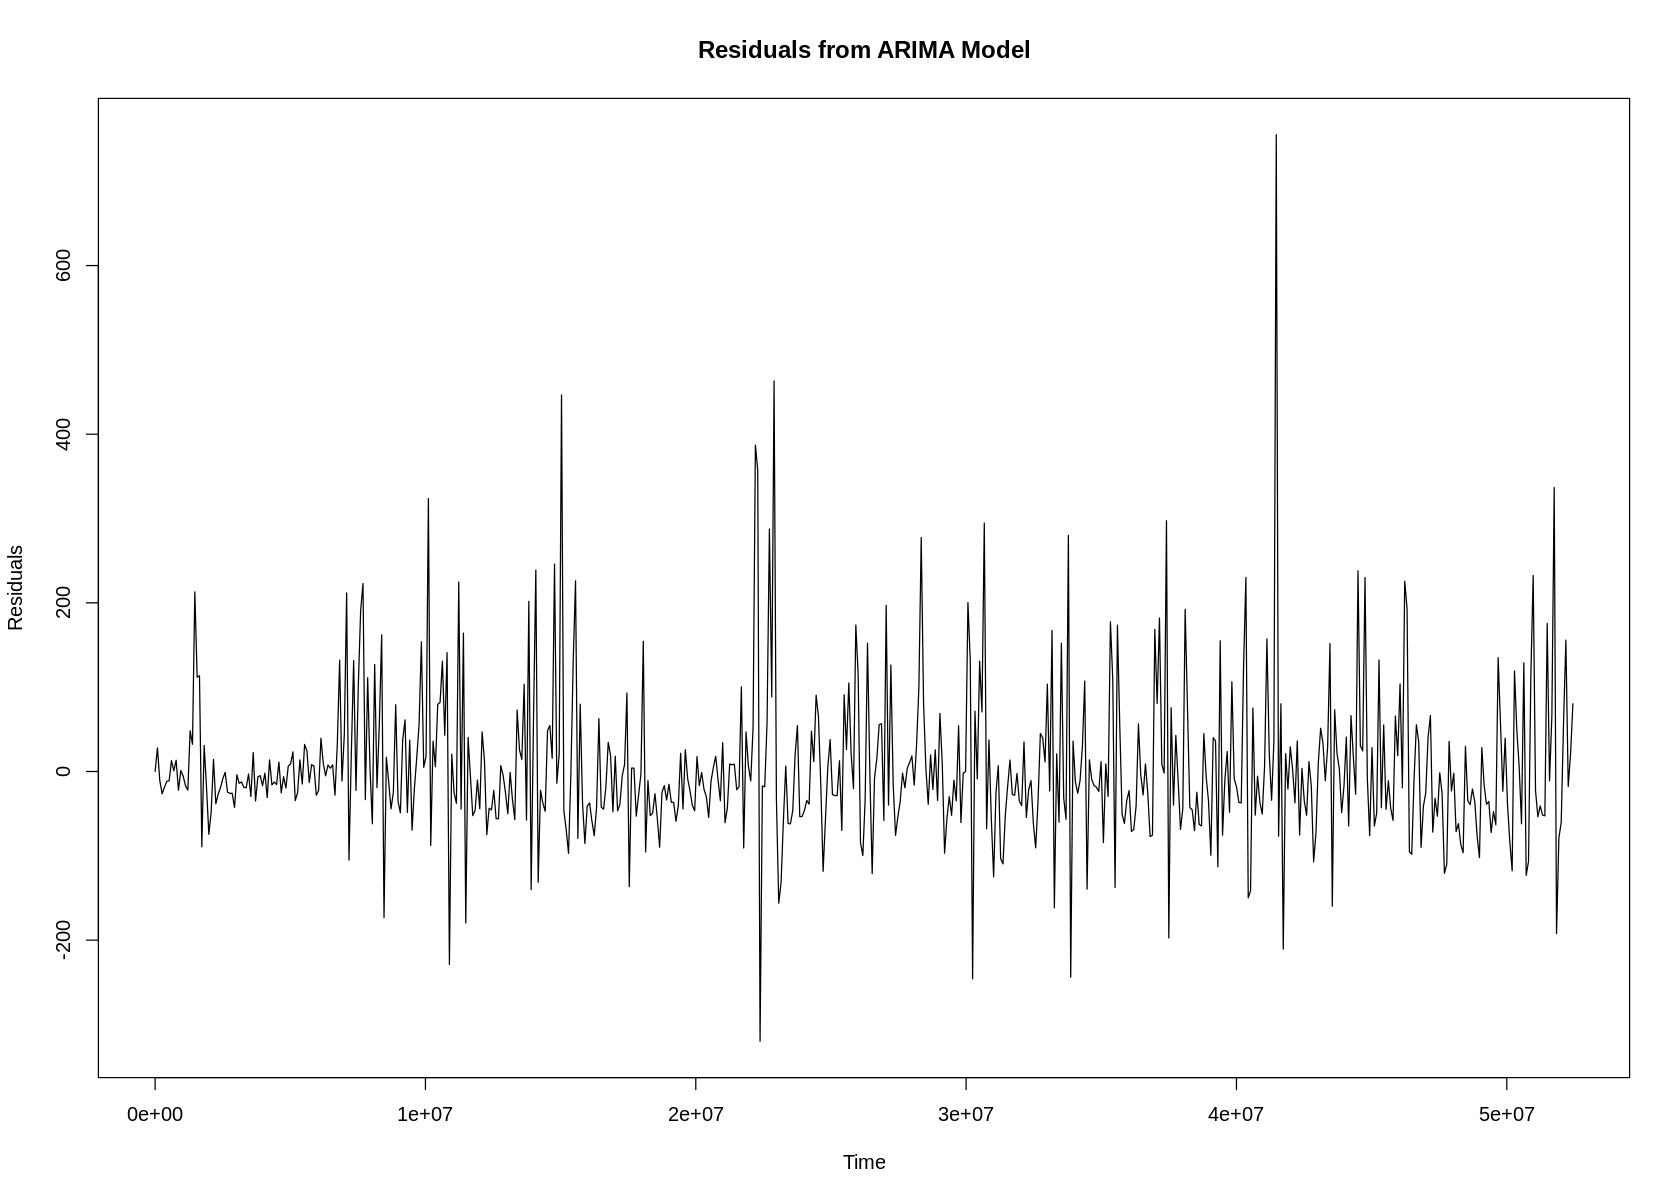

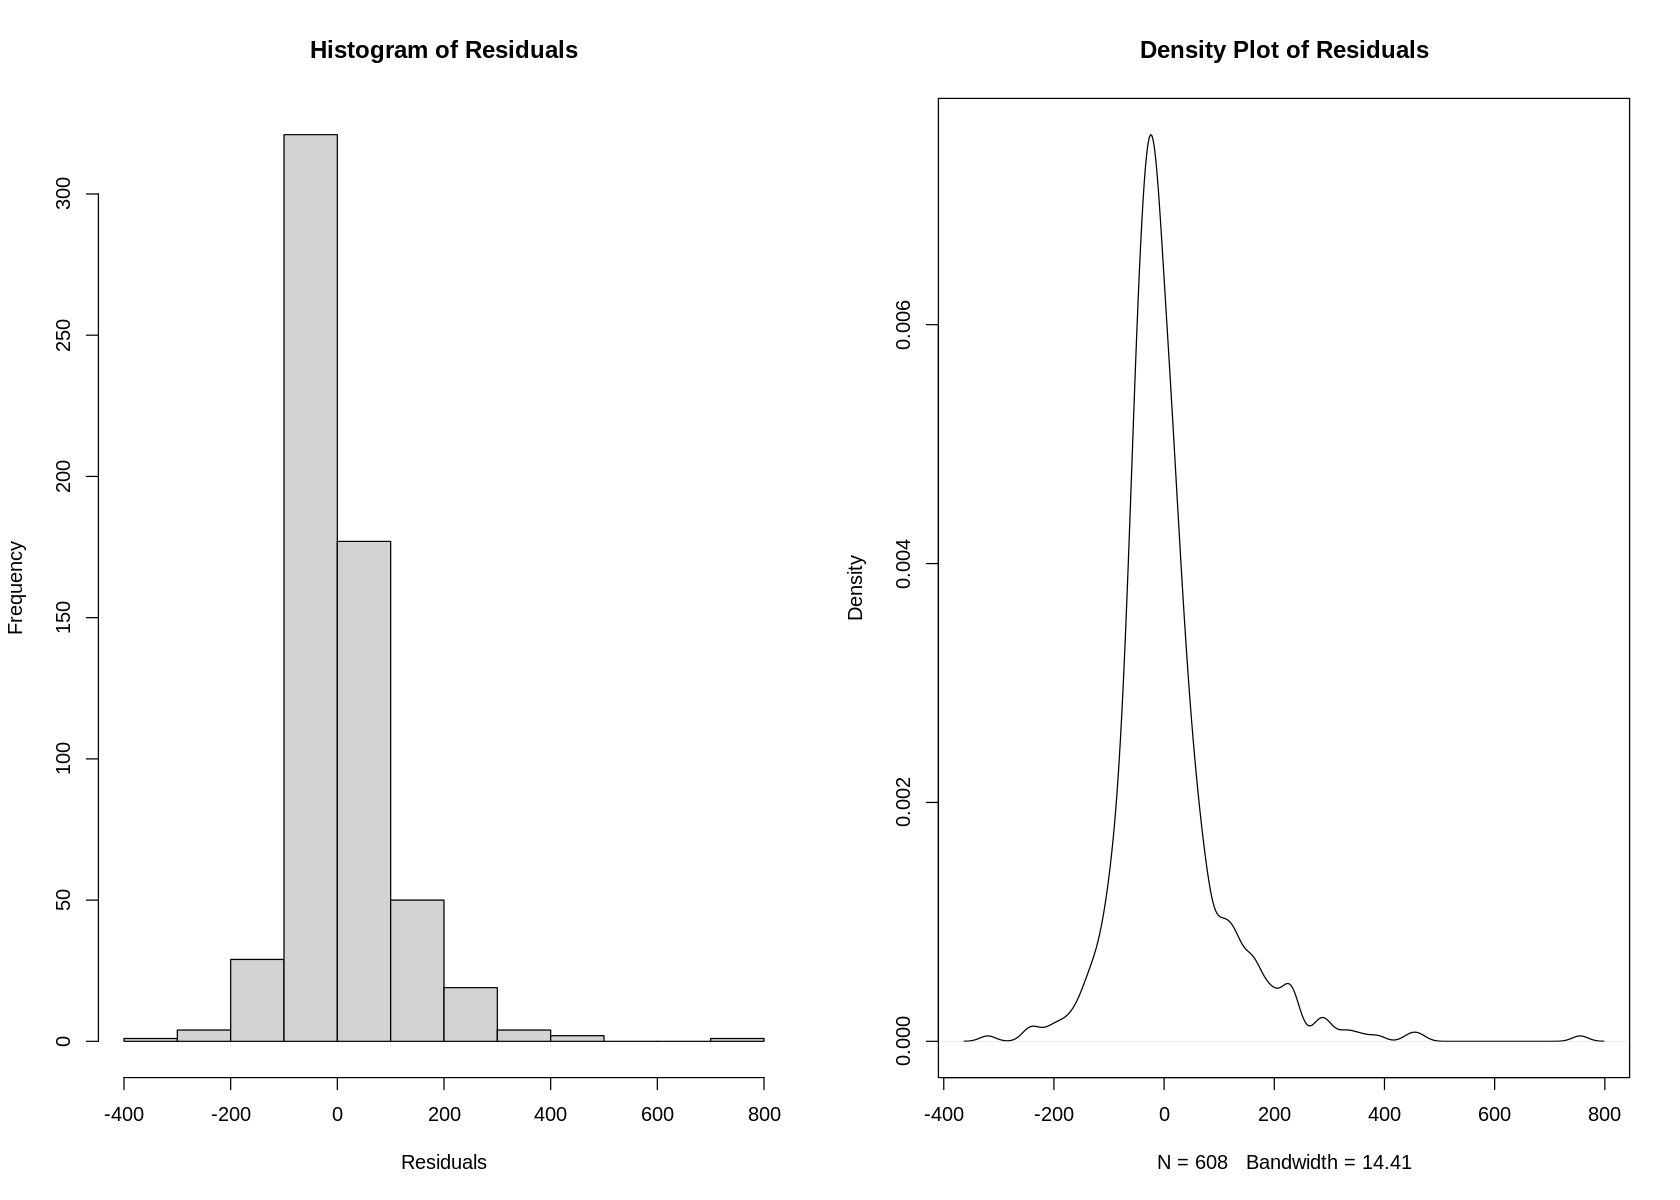


	Box-Ljung test

data:  residuals(arima_model)
X-squared = 16.415, df = 20, p-value = 0.6905


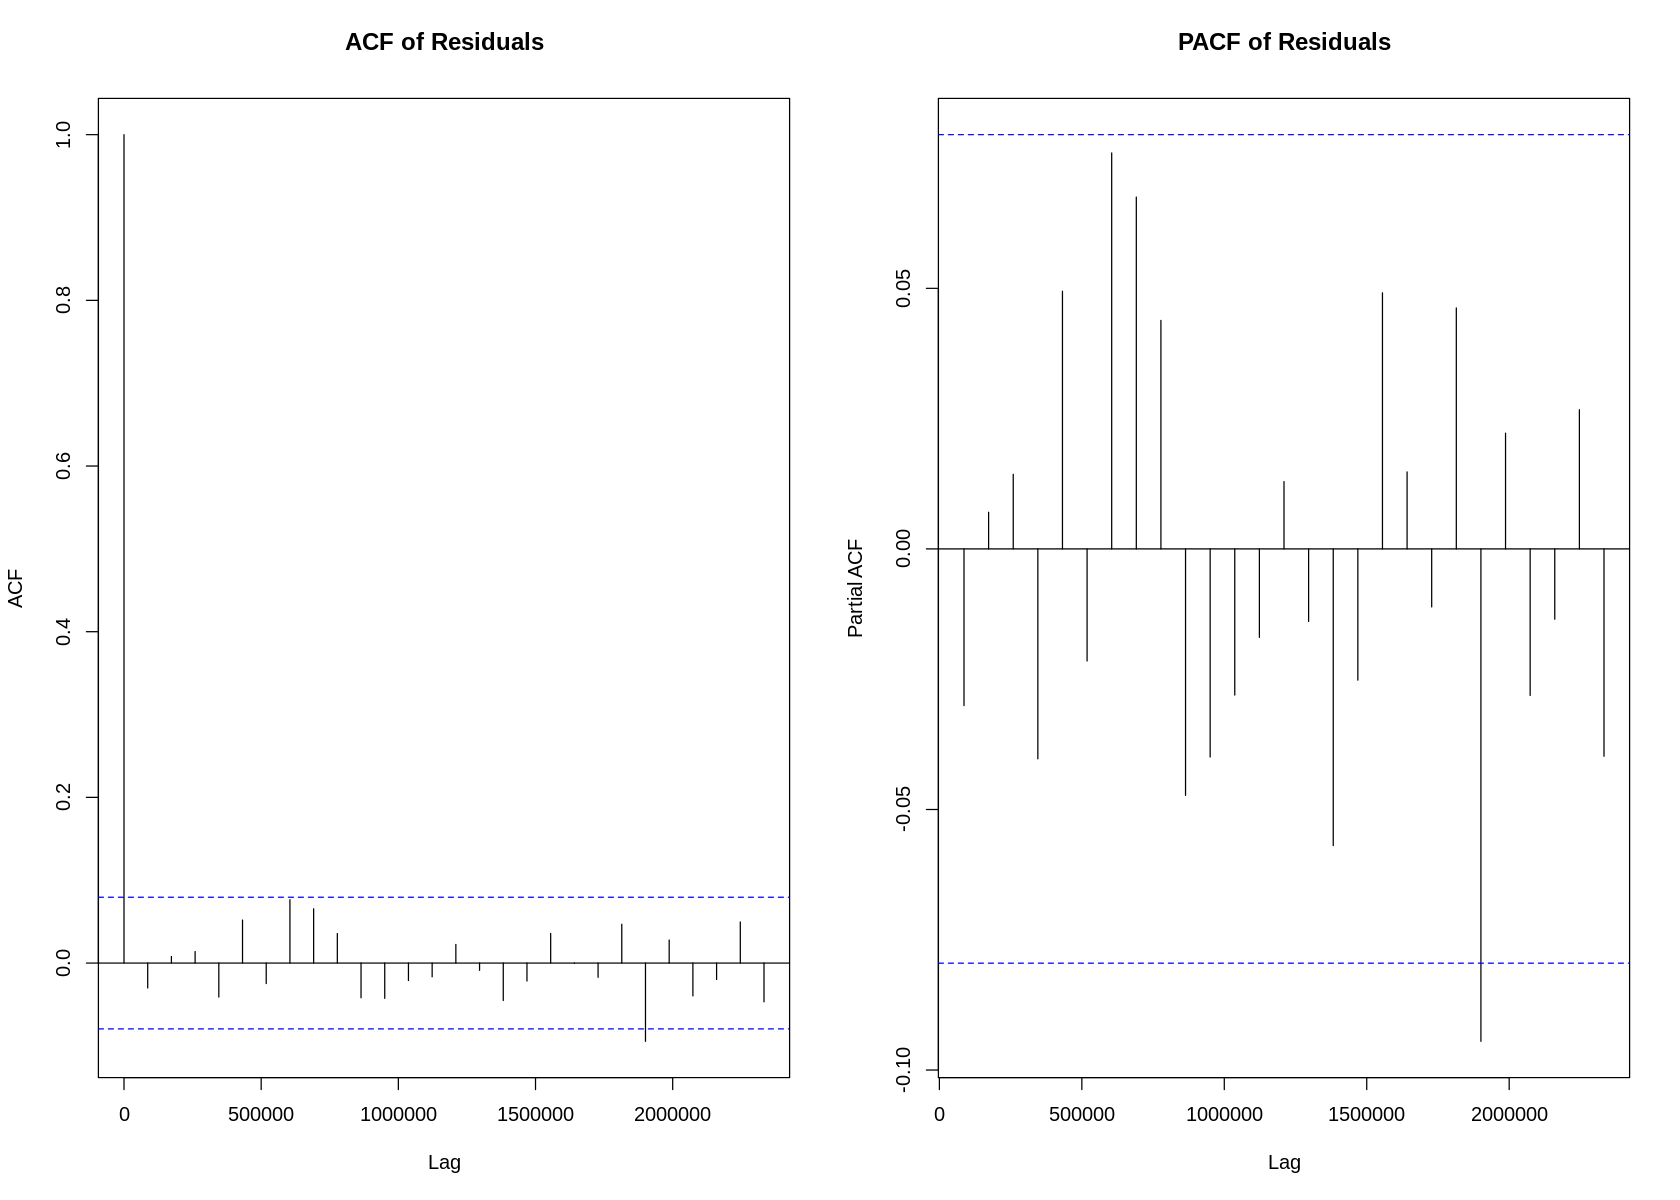

In [77]:
# Load necessary libraries
library(forecast)

# Fit an ARIMA model
arima_model <- auto.arima(dfJ3_xts_daily[,1], seasonal = TRUE)

#Automatically determines the best orders for an ARIMA model by evaluating different combinations of p, d, and q.

# Print model summary
print(summary(arima_model))

# Plot original time series with fitted values
plot(dfJ3_xts_daily[,1], main = "Original Time Series with Fitted Values", ylab = "Value")
lines(fitted(arima_model), col = "red")

# Plot residuals
plot(residuals(arima_model), main = "Residuals from ARIMA Model", ylab = "Residuals")

# Histogram and density plot of residuals
par(mfrow = c(1, 2))
hist(residuals(arima_model), main = "Histogram of Residuals", xlab = "Residuals")
plot(density(residuals(arima_model)), main = "Density Plot of Residuals")

# ACF and PACF of residuals
par(mfrow = c(1, 2))
acf(residuals(arima_model), main = "ACF of Residuals")
pacf(residuals(arima_model), main = "PACF of Residuals")

# Ljung-Box test for autocorrelation in residuals
Box.test(residuals(arima_model), lag = 20, type = "Ljung-Box")


The ARIMA model's residuals resemble white noise, with no significant autocorrelation or partial autocorrelation. The residuals are approximately normally distributed, indicating a good model fit.

**Trying forcasting**

In [78]:
forecast(arima_model,12)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
52531201       513.3341 392.0914 634.5768 327.9094 698.7588
52617601       486.0643 337.0307 635.0979 258.1371 713.9915
52704001       467.3166 305.5542 629.0789 219.9224 714.7108
52790401       454.4278 286.0993 622.7562 196.9916 711.8639
52876801       445.5668 273.5726 617.5611 182.5244 708.6093
52963201       439.4751 265.2809 613.6692 173.0681 705.8820
53049601       435.2870 259.6730 610.9011 166.7085 703.8656
53136001       432.4078 255.8076 609.0080 162.3212 702.4945
53222401       430.4284 253.0934 607.7633 159.2180 701.6388
53308801       429.0675 251.1488 606.9863 156.9643 701.1708
53395201       428.1320 249.7231 606.5408 155.2792 700.9848
53481601       427.4888 248.6496 606.3280 153.9778 700.9998

## **Junction 4**

**TS Plot**

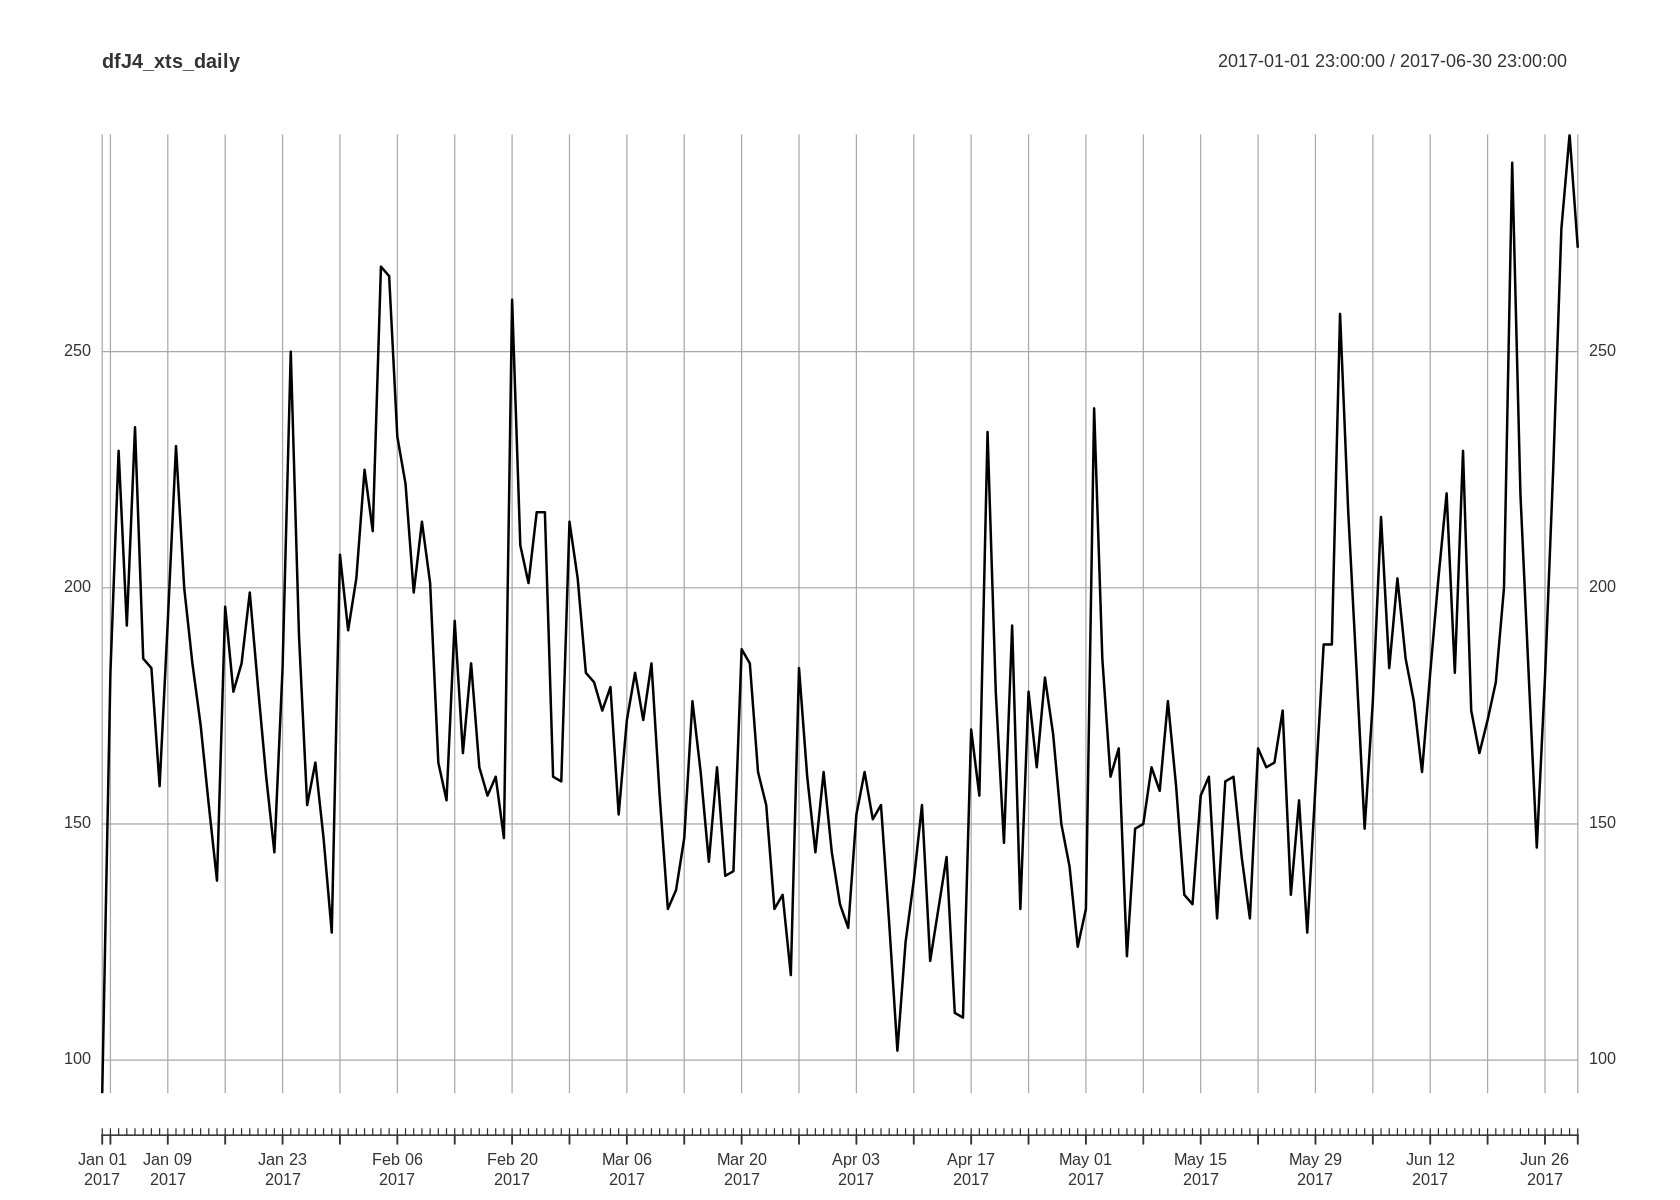

In [79]:
plot(dfJ4_xts_daily)

**Linear Regression**

In [80]:
# Perform linear regression
lm_model <- lm(dfJ4_xts_daily[,1] ~ index(dfJ4_xts_daily), data = dfJ4_xts_daily)

# Print summary of the linear regression model
summary(lm_model)


Call:
lm(formula = dfJ4_xts_daily[, 1] ~ index(dfJ4_xts_daily), data = dfJ4_xts_daily)

Residuals:
   Min     1Q Median     3Q    Max 
-82.21 -23.56  -4.70  16.18 123.12 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)            3.988e+02  8.995e+02   0.443    0.658
index(dfJ4_xts_daily) -1.508e-07  6.033e-07  -0.250    0.803

Residual standard error: 36.64 on 179 degrees of freedom
Multiple R-squared:  0.0003487,	Adjusted R-squared:  -0.005236 
F-statistic: 0.06245 on 1 and 179 DF,  p-value: 0.803


**Enhancing Linear regression**

In [81]:
# Apply logarithmic transformation to the dependent variable
log_counts <- log(dfJ4_xts_daily[,1])

# Perform linear regression on the transformed data
lm_model_log <- lm(log_counts ~ index(dfJ4_xts_daily), data = dfJ4_xts_daily)

# Print summary of the linear regression model
summary(lm_model_log)


Call:
lm(formula = log_counts ~ index(dfJ4_xts_daily), data = dfJ4_xts_daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61683 -0.12316 -0.00629  0.10653  0.56297 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)            7.264e+00  5.019e+00   1.447    0.150
index(dfJ4_xts_daily) -1.425e-09  3.366e-09  -0.424    0.672

Residual standard error: 0.2044 on 179 degrees of freedom
Multiple R-squared:  0.001001,	Adjusted R-squared:  -0.00458 
F-statistic: 0.1794 on 1 and 179 DF,  p-value: 0.6724


The linear regression model indicates a non significant  relationship between time and the logarithm of counts. the R-squared value suggests that there is still a substantial amount of variability not explained by the model.

**Adjusting the model to take into account both the trend and the seasonal behavior**

In [82]:
# Assuming dfJ4_xts_daily is your xts object
# Apply logarithmic transformation to the dependent variable
log_counts <- log(dfJ4_xts_daily[,1])

# Extract the date index
time_index <- index(dfJ4_xts_daily)

# Convert to numeric time for trend (number of days since the start)
time_numeric <- as.numeric(time_index - min(time_index))

# Define the period for seasonality (e.g., daily data with weekly seasonality)
P <- 7

# Add sine and cosine terms for the seasonal component
sin_term <- sin(2 * pi * time_numeric / P)
cos_term <- cos(2 * pi * time_numeric / P)

# Combine all components into a data frame
data_model <- data.frame(log_counts, time_numeric, sin_term, cos_term)

# Perform linear regression on the transformed data with trend and seasonal components
lm_model_log_seasonal <- lm(log_counts ~ time_numeric + sin_term + cos_term, data = data_model)

# Print summary of the enhanced linear regression model
summary(lm_model_log_seasonal)



Call:
lm(formula = log_counts ~ time_numeric + sin_term + cos_term, 
    data = data_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50700 -0.12546 -0.01536  0.10270  0.55497 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.151e+00  2.755e-02 186.987  < 2e-16 ***
time_numeric -1.667e-09  3.064e-09  -0.544  0.58710    
sin_term     -5.182e-02  1.957e-02  -2.648  0.00882 ** 
cos_term     -1.111e-01  1.955e-02  -5.684 5.32e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.186 on 177 degrees of freedom
Multiple R-squared:  0.182,	Adjusted R-squared:  0.1682 
F-statistic: 13.13 on 3 and 177 DF,  p-value: 8.817e-08


adding the seasonal component with cosins and sins improved the linear regression model but it still have sustantial data that has nt been detected

### Using Seasonal Dummies


In [83]:
# Aggregate hourly data to daily data
subset_data <- df[df$Junction == 4, ]

daily_data <- aggregate(Vehicles ~ as.Date(DateTime), data = subset_data, sum)

# Convert aggregated data to time series
ts_daily_data <- ts(daily_data$Vehicles, frequency = 7)  # Assuming data is daily

# Convert DateTime column to Date
subset_data$Date <- as.Date(subset_data$DateTime)

# Extract month and year from Date
subset_data$Month <- as.integer(format(subset_data$Date, "%m"))
subset_data$Year <- as.integer(format(subset_data$Date, "%Y"))

# Create dummy variables for month
dummy_months <- model.matrix(~ factor(subset_data$Month) - 1)

# Combine original data with dummy variables
data_with_dummies <- cbind(subset_data, dummy_months)

# Fit linear regression model
lm_model <- lm(Vehicles ~ ., data = data_with_dummies)

# Summary of the model
summary(lm_model)


Call:
lm(formula = Vehicles ~ ., data = data_with_dummies)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8657 -2.0169 -0.3084  1.5689 28.5706 

Coefficients: (4 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.513e+01  9.048e+01   0.167    0.867    
DateTime                      6.301e-05  1.846e-06  34.133  < 2e-16 ***
Junction                             NA         NA      NA       NA    
Date                         -5.445e+00  1.596e-01 -34.122  < 2e-16 ***
Month                         1.950e+00  2.259e-01   8.633  < 2e-16 ***
Year                                 NA         NA      NA       NA    
`factor(subset_data$Month)1`  8.596e+00  7.250e-01  11.857  < 2e-16 ***
`factor(subset_data$Month)2`  7.465e+00  5.712e-01  13.068  < 2e-16 ***
`factor(subset_data$Month)3`  3.898e+00  4.179e-01   9.329  < 2e-16 ***
`factor(subset_data$Month)4`  1.544e+00  2.738e-01   5.639 1.81e-08 **

Using dummies instead of cosinus and sinus improved the model a bit

**Studying Stationarity**

In [84]:
adf_test <- adf.test(dfJ4_xts_daily[,1], alternative = "stationary")
print(adf_test)


	Augmented Dickey-Fuller Test

data:  dfJ4_xts_daily[, 1]
Dickey-Fuller = -1.9041, Lag order = 5, p-value = 0.6163
alternative hypothesis: stationary



=> Given that the p-value=0.6163 is significantly greater than the common significance level of 0.05, we fail to reject the null hypothesis. Therefore, we conclude that the time series is non-stationary. This implies that the series may have trends or other non-stationary behaviors

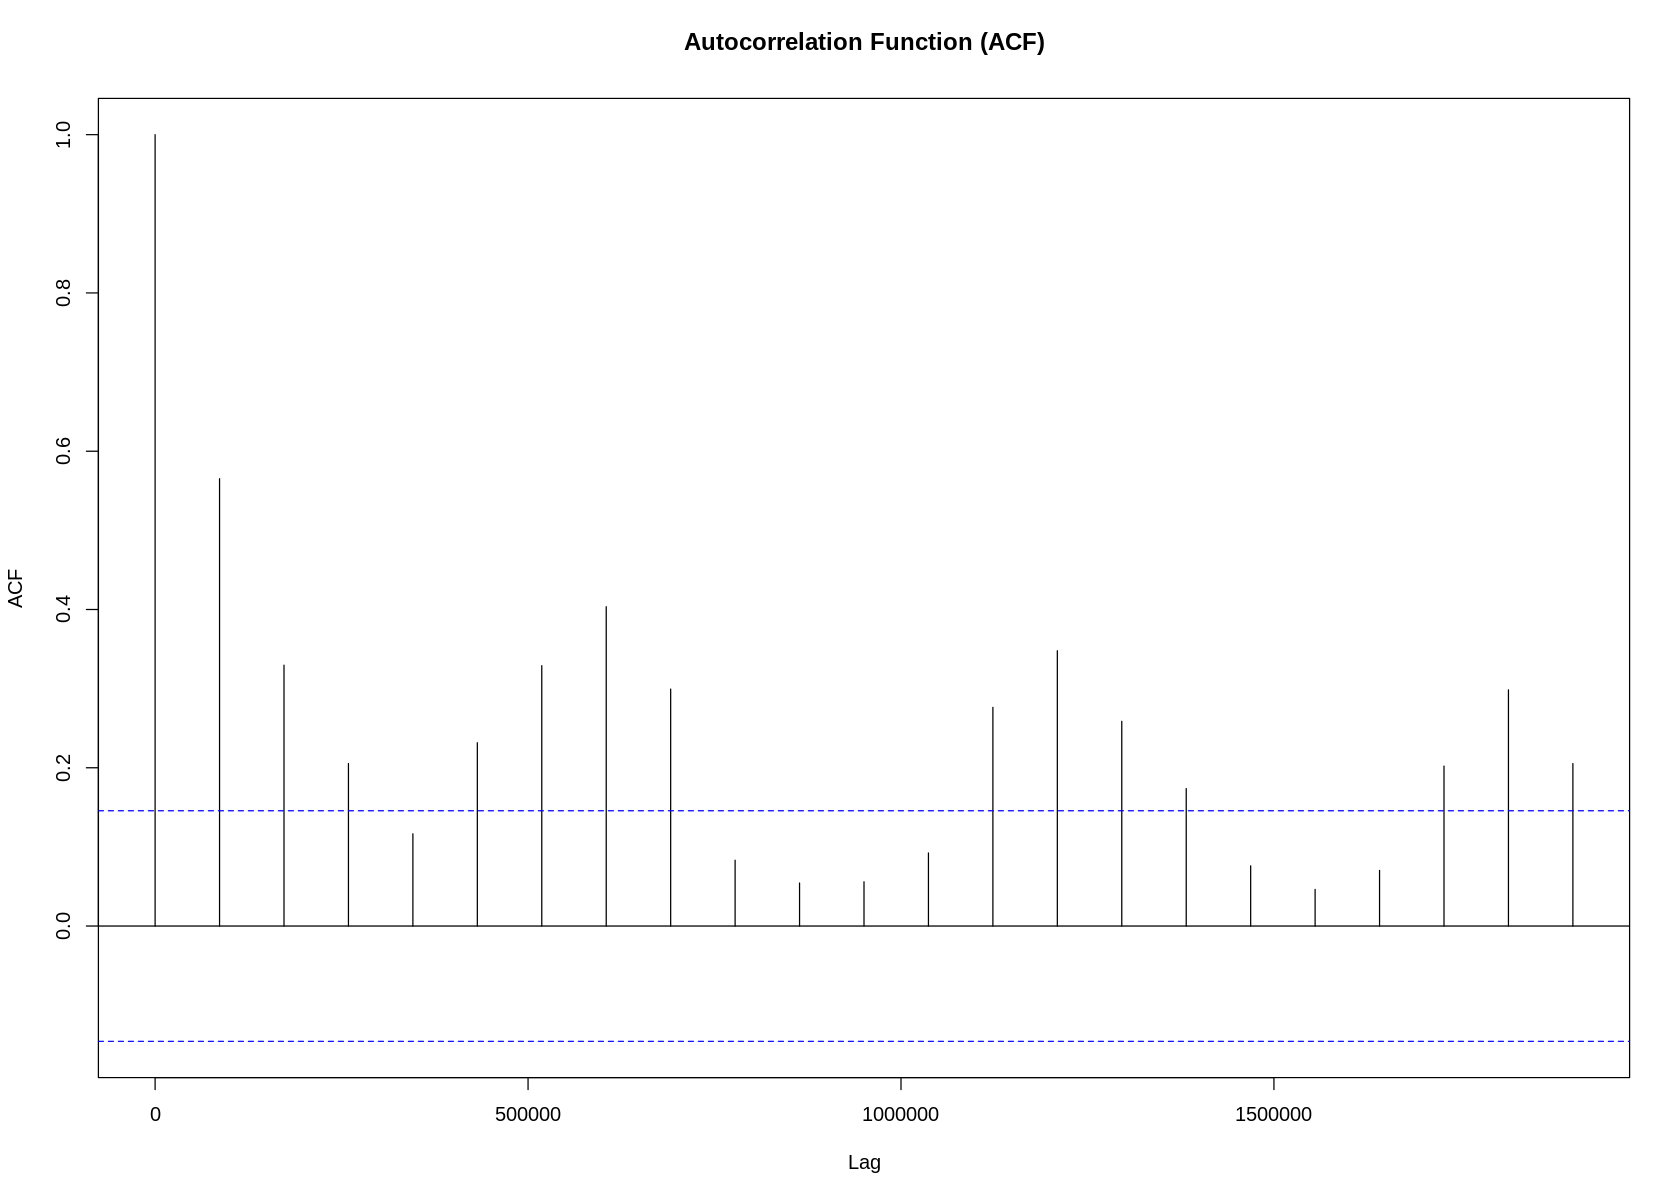

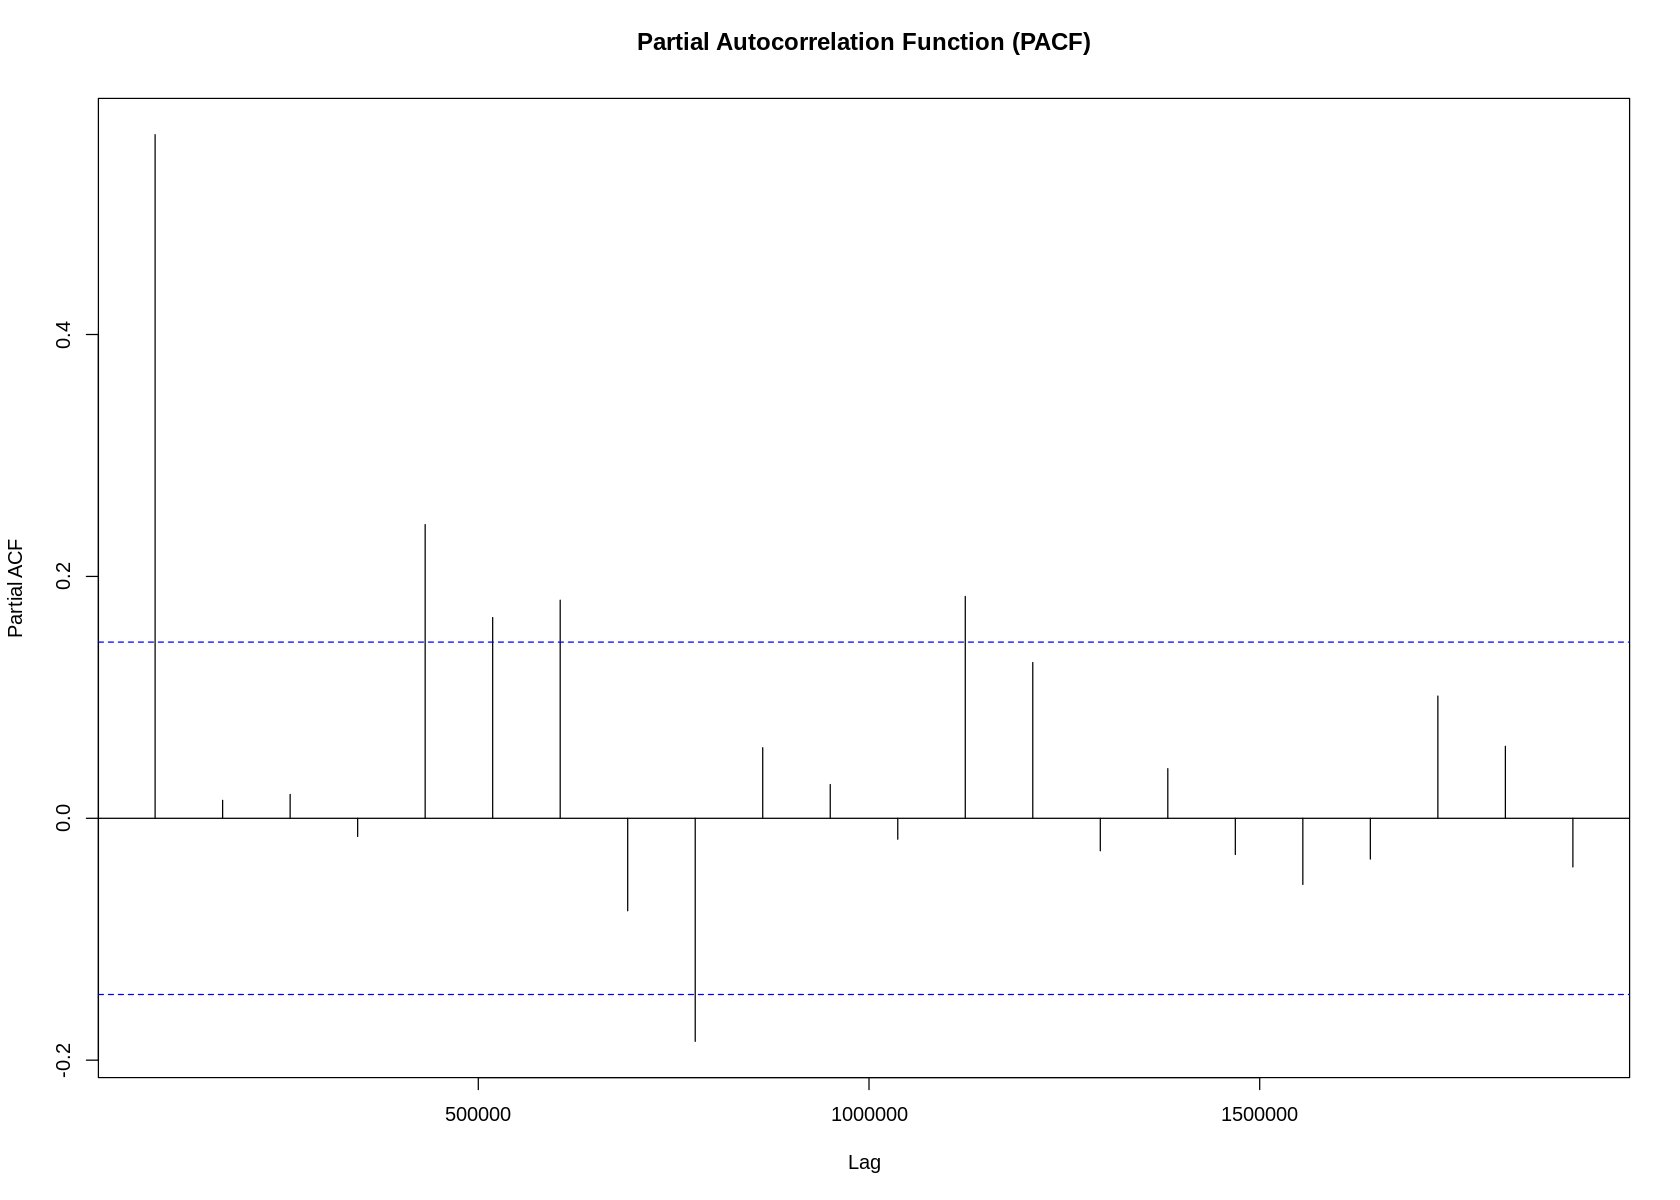

In [85]:
acf(dfJ4_xts_daily[,1], main = "Autocorrelation Function (ACF)")
pacf(dfJ4_xts_daily[,1], main = "Partial Autocorrelation Function (PACF)")

**Differencing**

In [86]:
install.packages("feasts")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [87]:
library(feasts)

**The function unitroot_ndiffs performs a statistical test to determine the minimum number of differentiations required.**

In [88]:
unitroot_ndiffs(dfJ4_xts_daily)

ndiffs 
     1

In [89]:
J4_diff_series <- diff(dfJ4_xts_daily[,1])

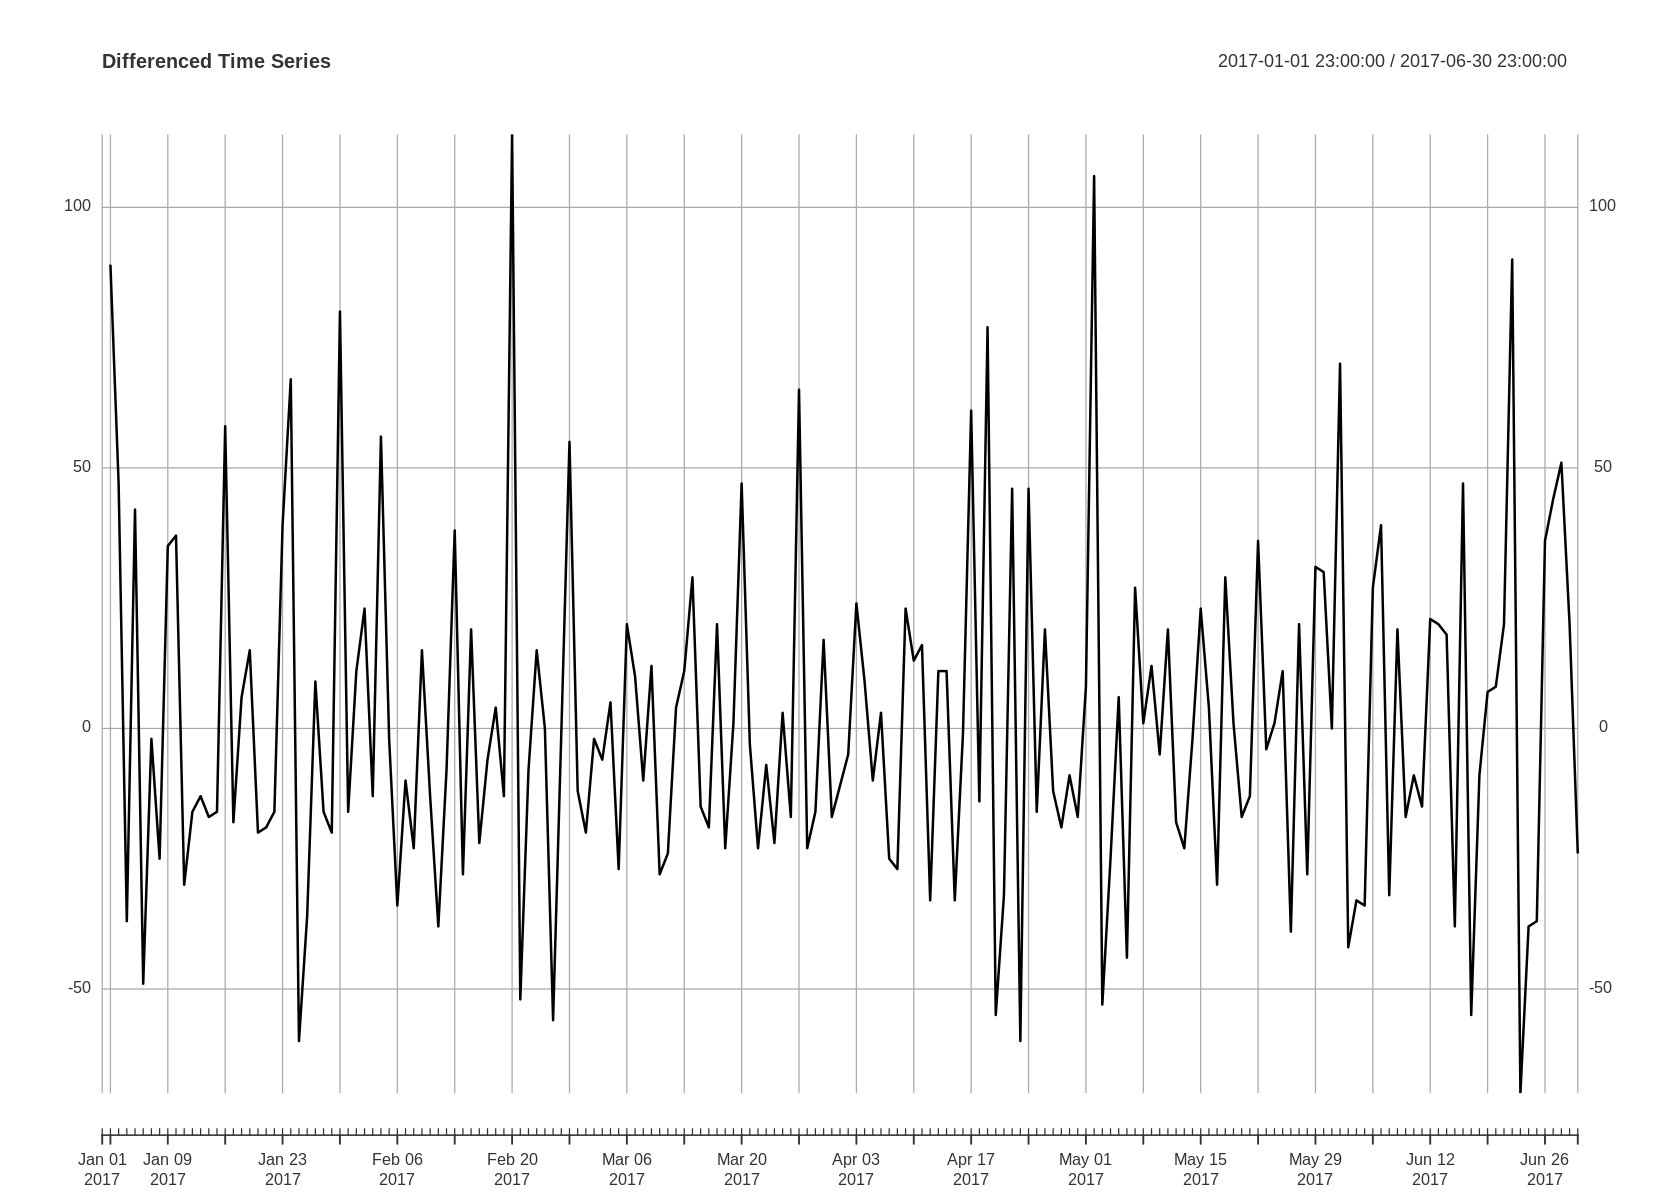

In [90]:
# Plot the differenced series
plot(J4_diff_series, main = "Differenced Time Series")

**Fitting an ARIMA Model**

In [91]:
# Fit ARIMA model using auto.arima()
library(forecast)
arima_model <- auto.arima(J4_diff_series[,1])

#Automatically determines the best orders for an ARIMA model by evaluating different combinations of p, d, and q.

# Print model summary
print(summary(arima_model))

Series: J4_diff_series[, 1] 
ARIMA(1,0,2) with zero mean 

Coefficients:
         ar1      ma1      ma2
      0.3005  -0.7500  -0.1336
s.e.  0.1931   0.1944   0.1591

sigma^2 = 864.1:  log likelihood = -862.93
AIC=1733.86   AICc=1734.09   BIC=1746.63

Training set error measures:
                   ME     RMSE      MAE MPE MAPE      MASE       ACF1
Training set 2.360914 29.14902 21.85718 NaN  Inf 0.8589321 0.01894975


**Checking Model's Residuals**


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with zero mean
Q* = 22.988, df = 7, p-value = 0.001713

Model df: 3.   Total lags used: 10



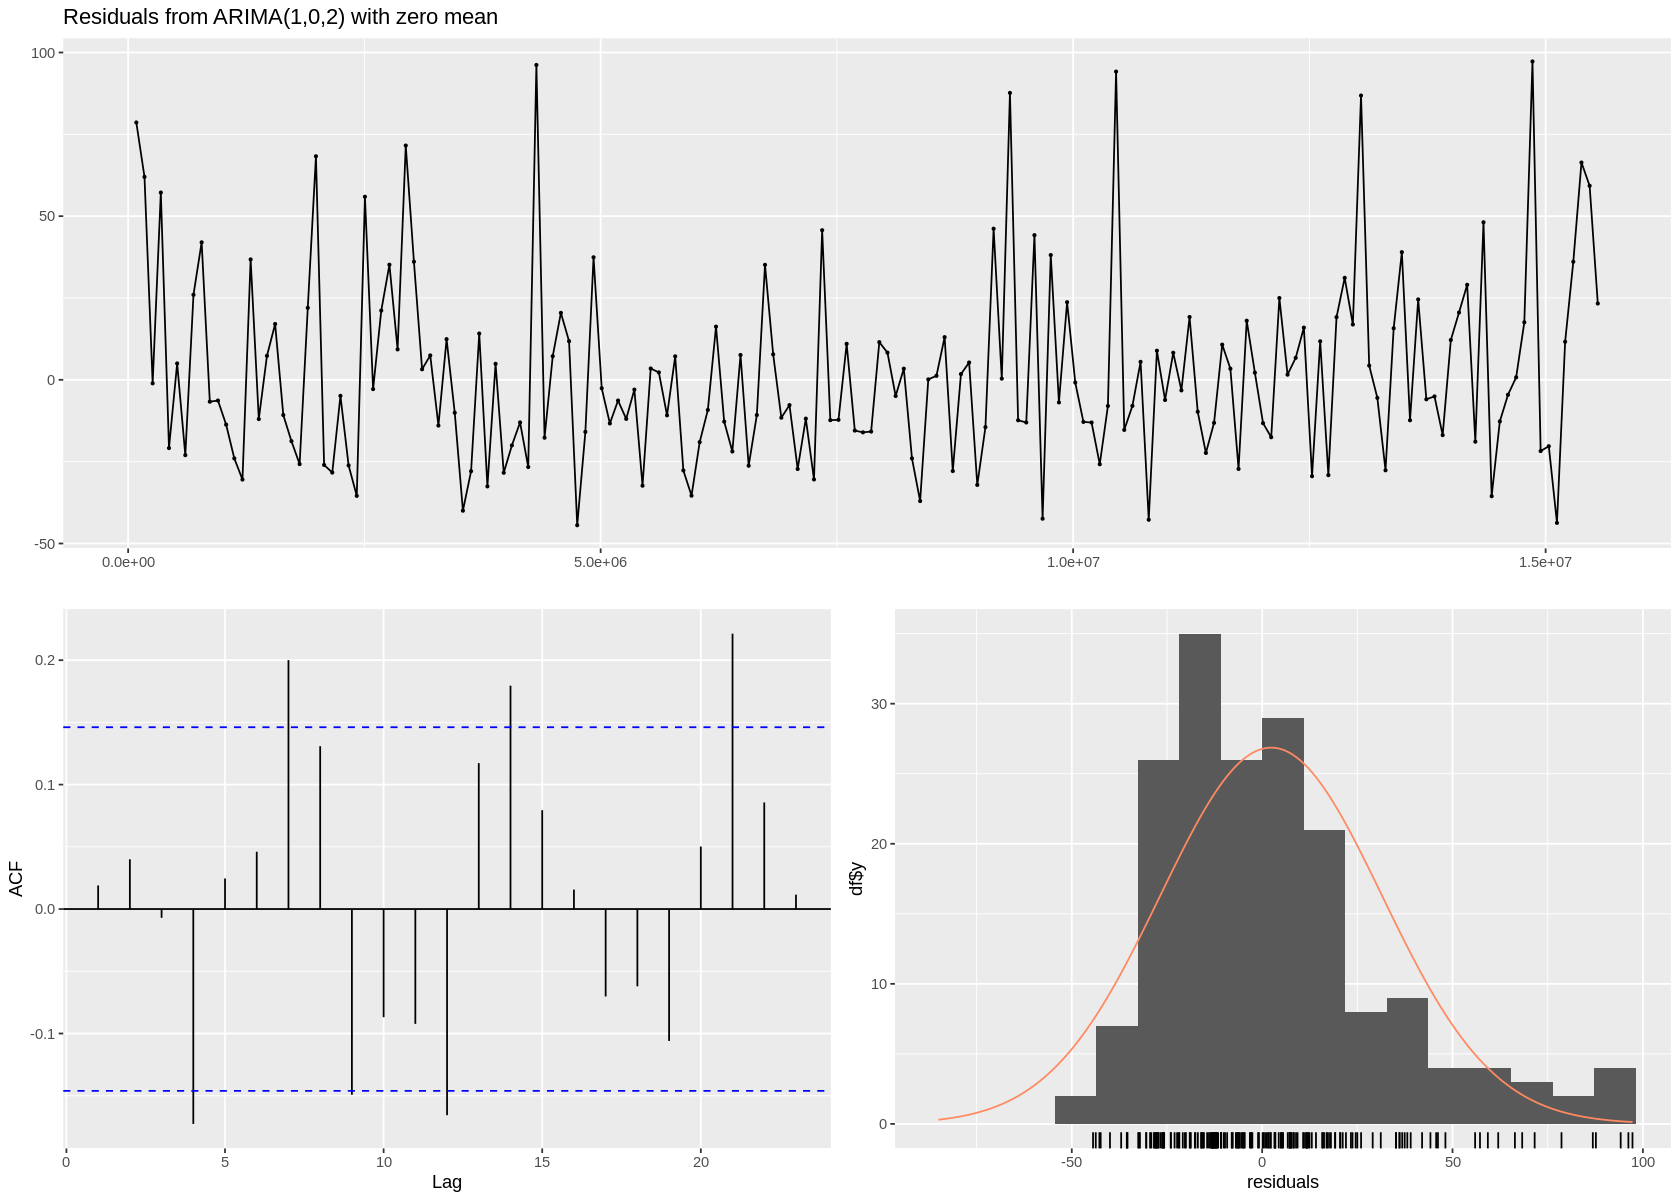

In [92]:
checkresiduals(arima_model)

The p-value is less than 0.05, indicating significant autocorrelation in the residuals. The residuals do not resemble white noise.The ARIMA(1,0,2) model has residuals that are not entirely white noise and exhibit significant autocorrelation. This suggests the model may not fully capture the underlying data patterns, and further adjustments or an alternative model may be needed.

**Fitting a SARIMA Model**

Series: J4_diff_series[, 1] 
ARIMA(1,0,2) with zero mean 

Coefficients:
         ar1      ma1      ma2
      0.3005  -0.7500  -0.1336
s.e.  0.1931   0.1944   0.1591

sigma^2 = 864.1:  log likelihood = -862.93
AIC=1733.86   AICc=1734.09   BIC=1746.63

Training set error measures:
                   ME     RMSE      MAE MPE MAPE      MASE       ACF1
Training set 2.360914 29.14902 21.85718 NaN  Inf 0.8589321 0.01894975


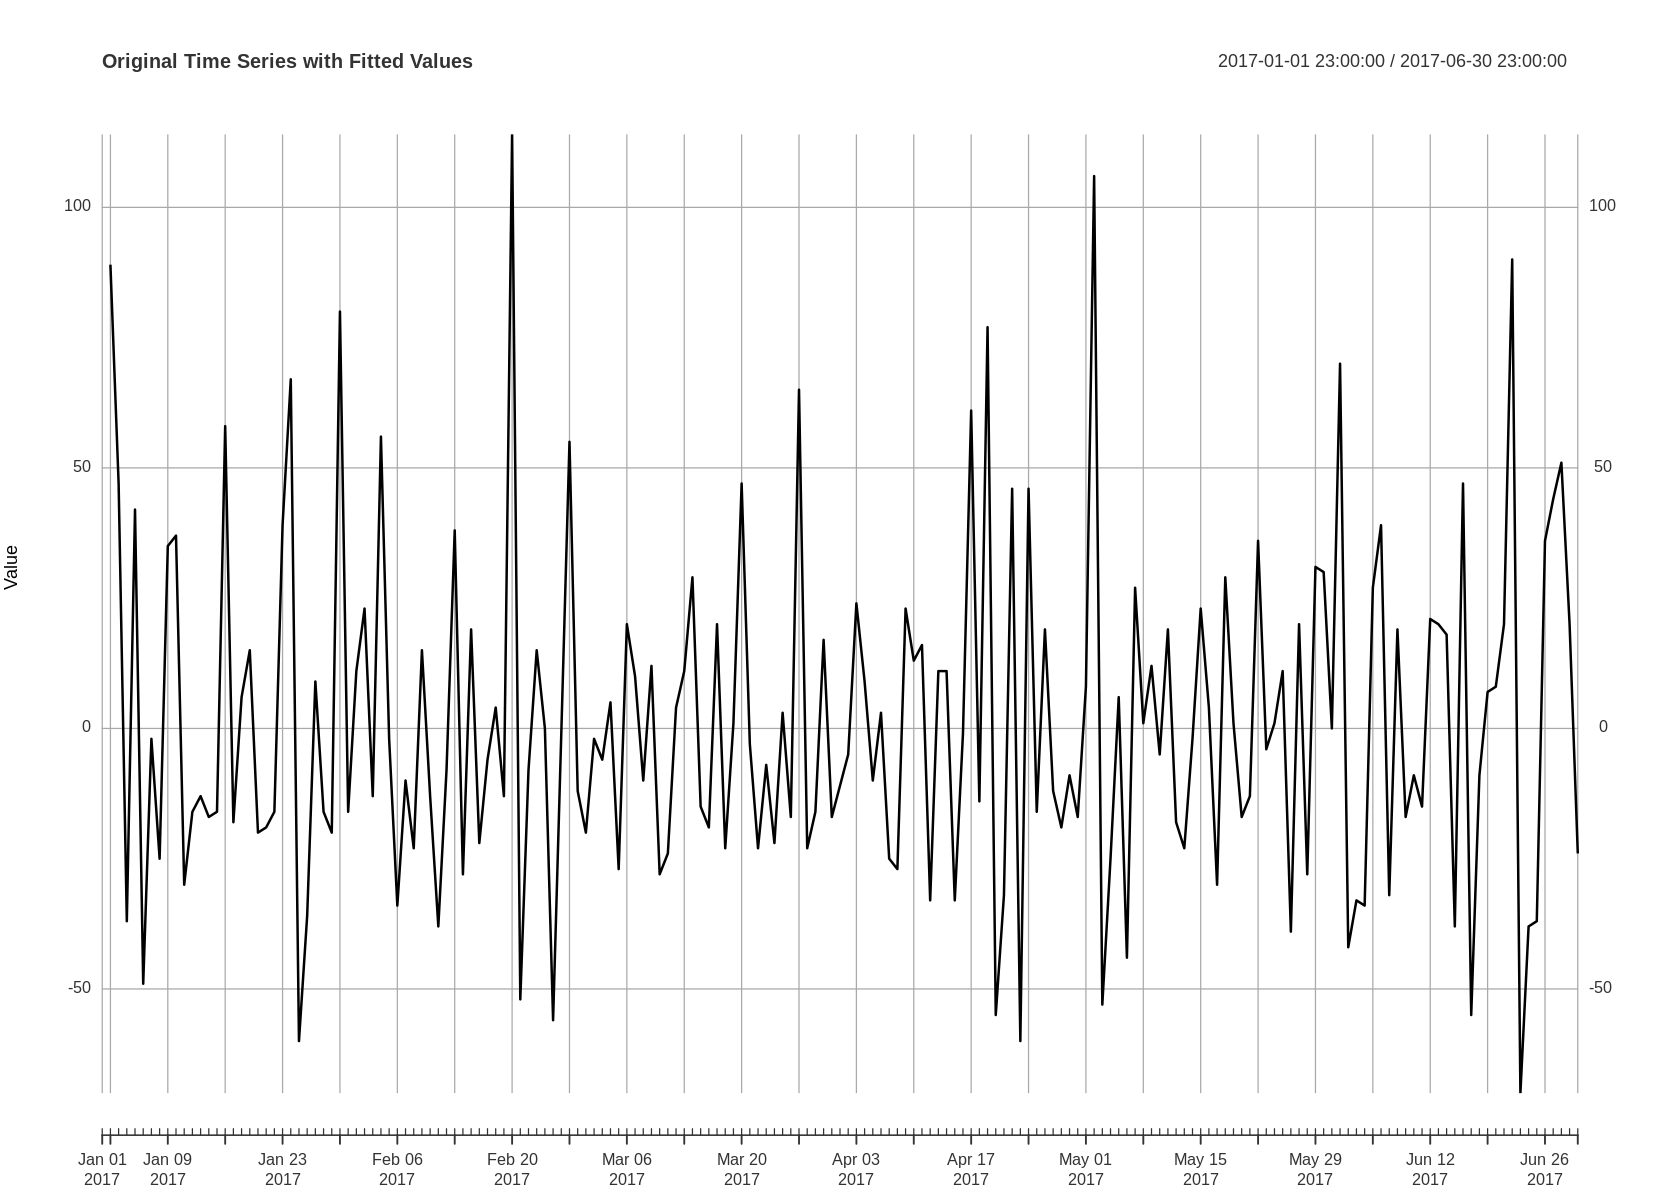

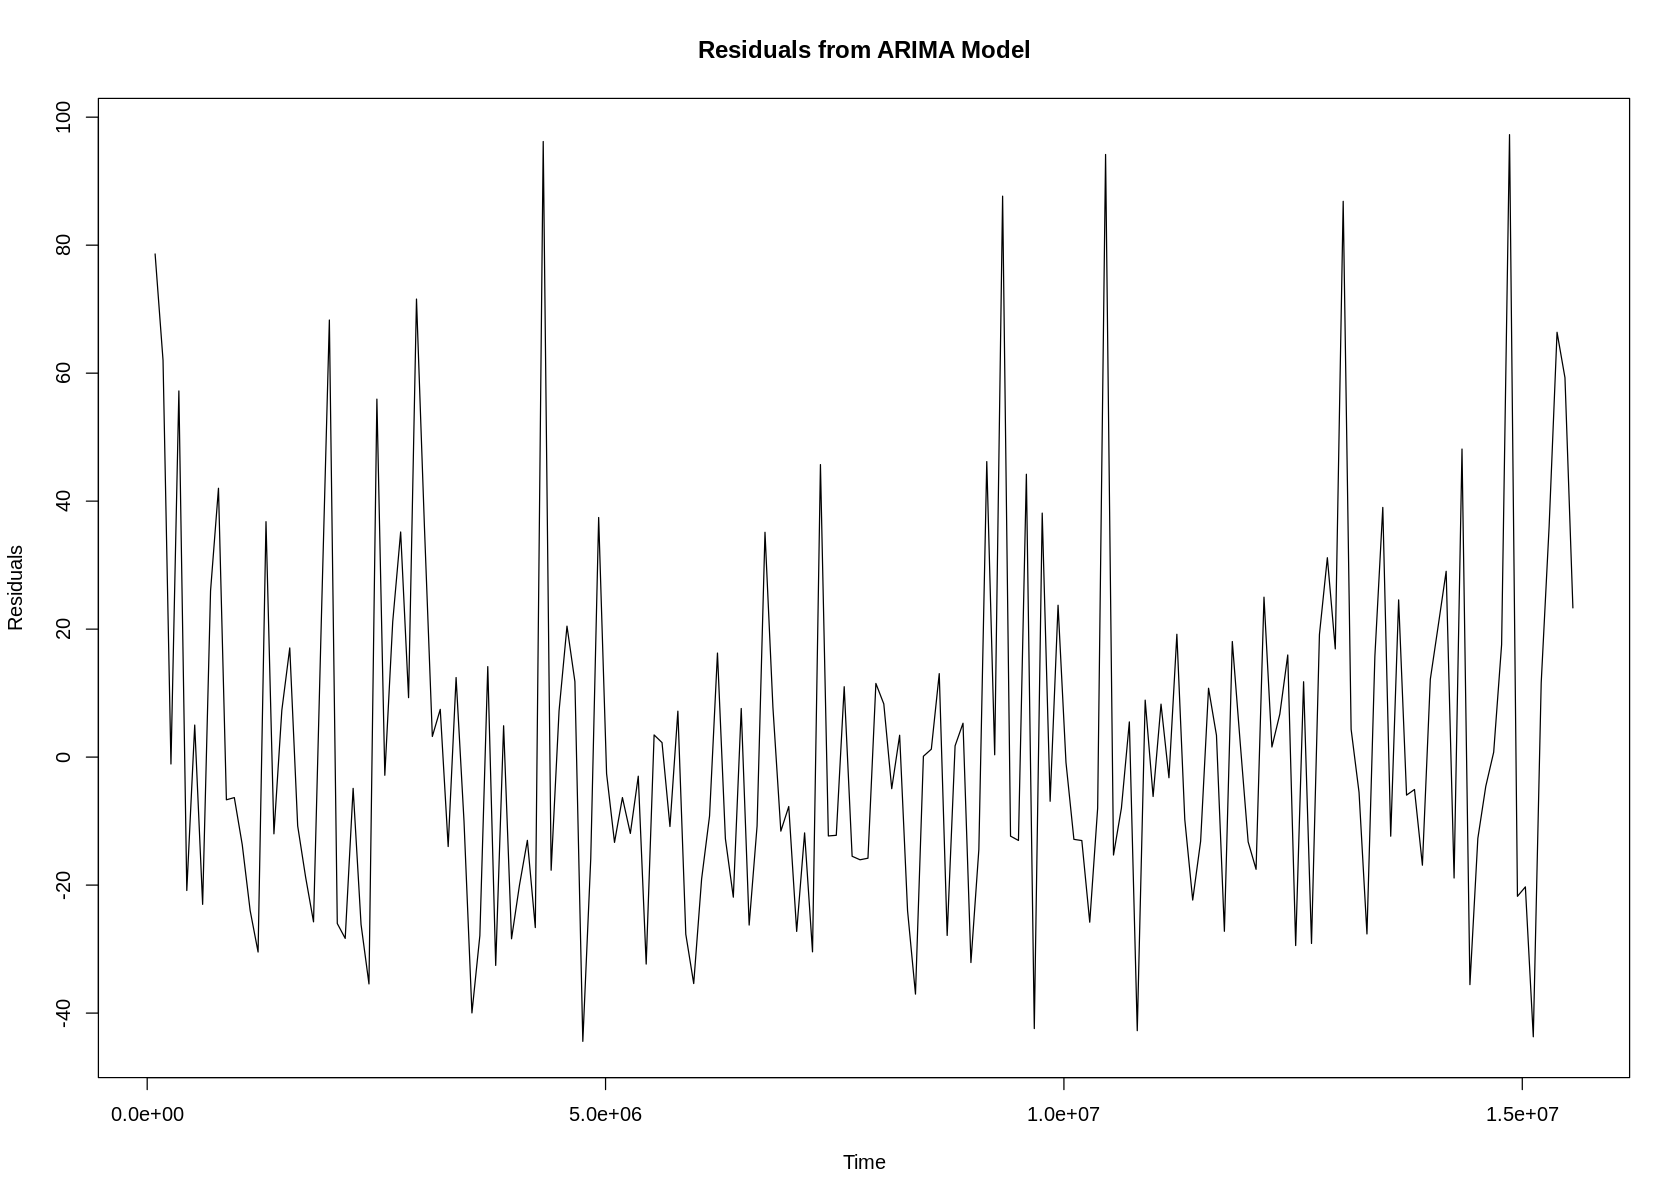

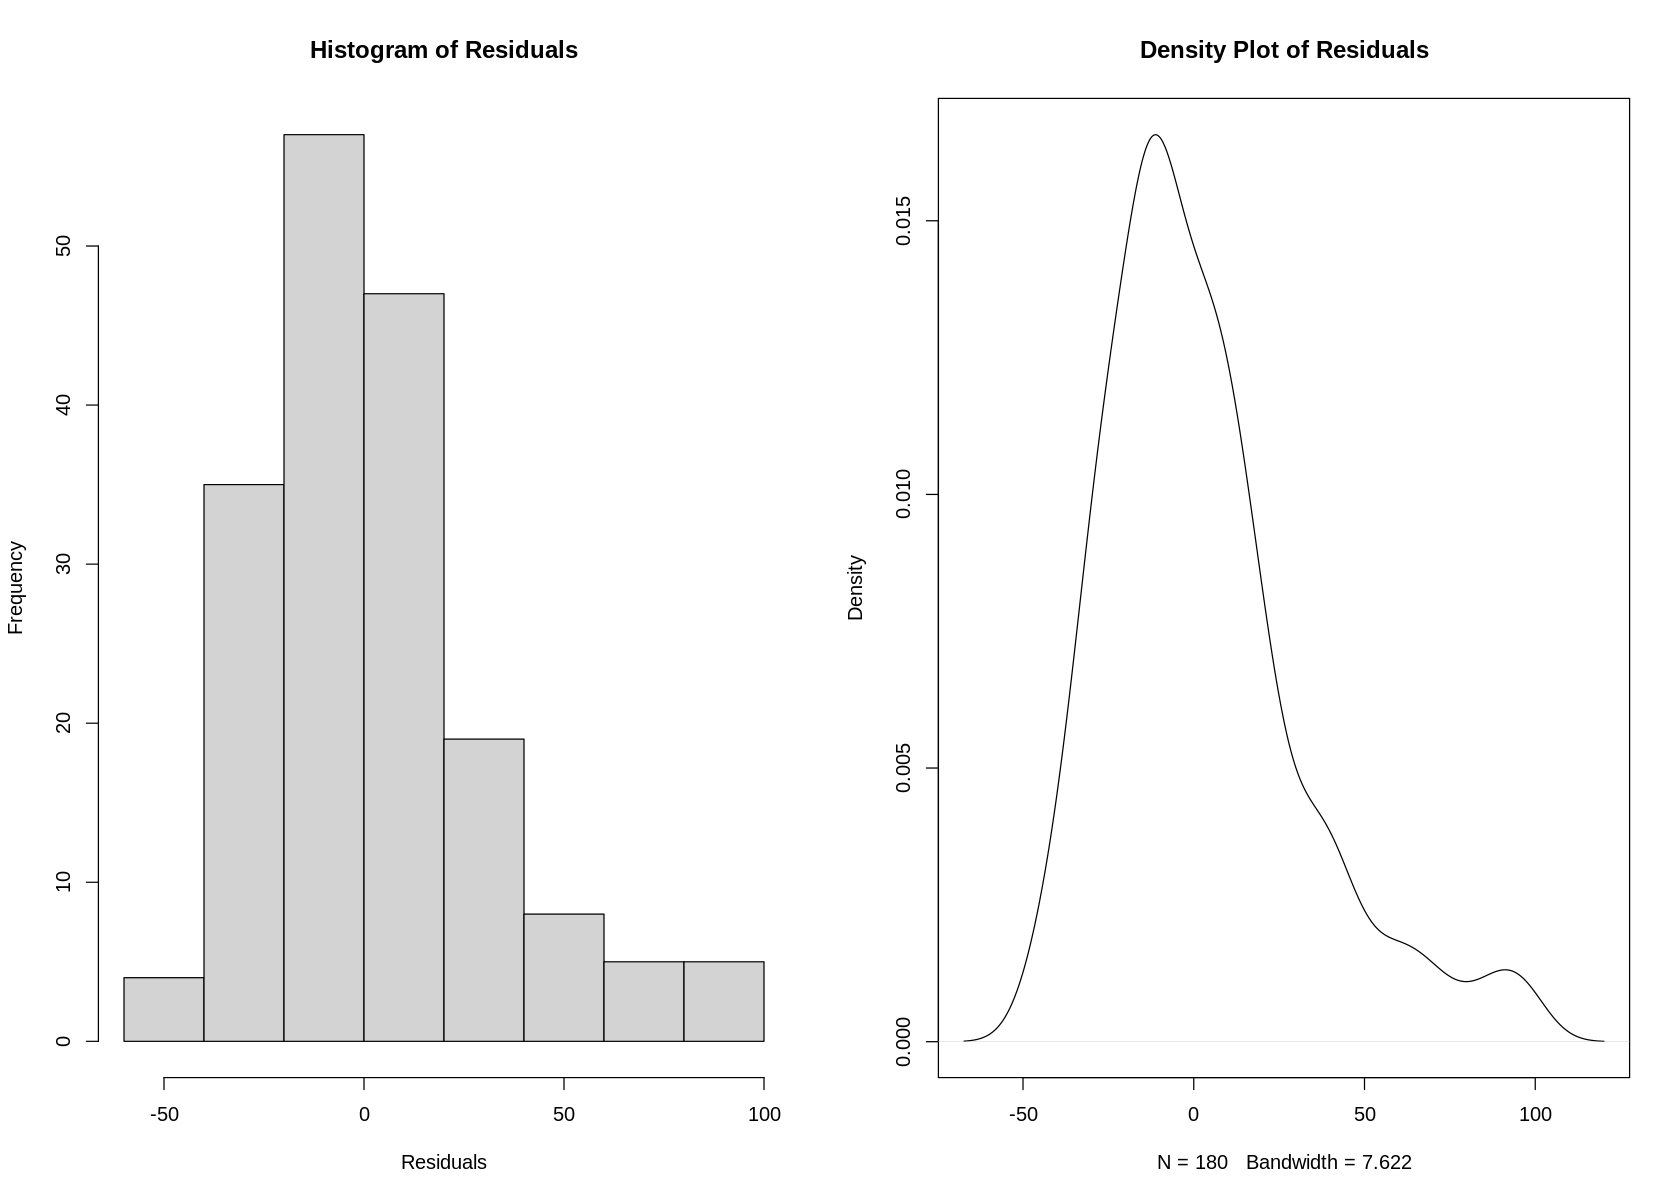


	Box-Ljung test

data:  residuals(arima_model)
X-squared = 44.919, df = 20, p-value = 0.001132


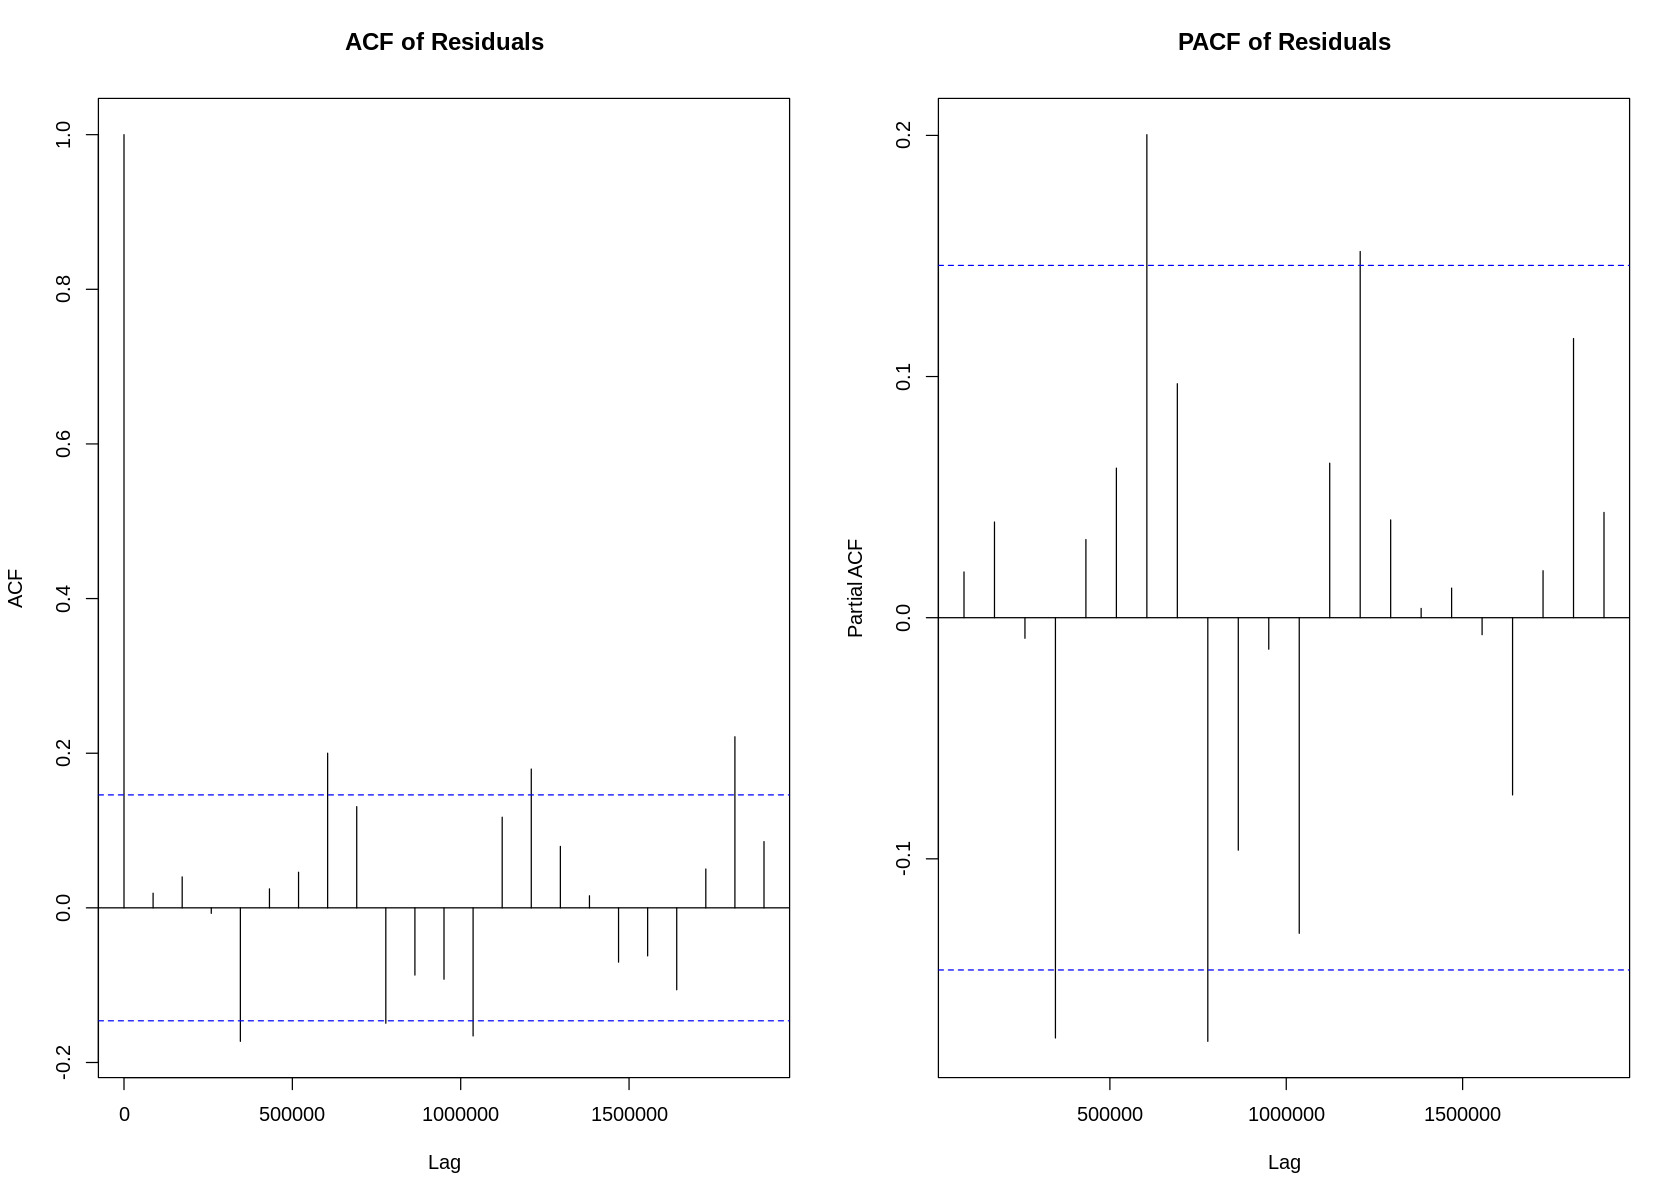

In [93]:
# Load necessary libraries
library(forecast)

# Fit an ARIMA model
arima_model <- auto.arima(J4_diff_series[,1], seasonal = TRUE)

# Print model summary
print(summary(arima_model))

# Plot original time series with fitted values
plot(J4_diff_series[,1], main = "Original Time Series with Fitted Values", ylab = "Value")
lines(fitted(arima_model), col = "red")

# Plot residuals
plot(residuals(arima_model), main = "Residuals from ARIMA Model", ylab = "Residuals")

# Histogram and density plot of residuals
par(mfrow = c(1, 2))
hist(residuals(arima_model), main = "Histogram of Residuals", xlab = "Residuals")
plot(density(residuals(arima_model)), main = "Density Plot of Residuals")

# ACF and PACF of residuals
par(mfrow = c(1, 2))
acf(residuals(arima_model), main = "ACF of Residuals")
pacf(residuals(arima_model), main = "PACF of Residuals")

# Ljung-Box test for autocorrelation in residuals
Box.test(residuals(arima_model), lag = 20, type = "Ljung-Box")

The model's residuals exhibit significant autocorrelation, indicating that the model does not fully capture the data's patterns. The residuals are not purely white noise, and there are indications of non-normality. Further model adjustments or alternative models are necessary to improve fit.

**Trying a forecast**

In [94]:
forecast(arima_model,12)

         Point Forecast     Lo 80     Hi 80     Lo 95    Hi 95
15638401  -3.262526e+01 -70.29648  5.045954 -90.23842 24.98789
15724801  -1.292000e+01 -54.22184 28.381841 -76.08571 50.24571
15811201  -3.882142e+00 -46.40632 38.642036 -68.91726 61.15298
15897601  -1.166488e+00 -43.79930 41.466324 -66.36775 64.03477
15984001  -3.505010e-01 -42.99311 42.292106 -65.56674 64.86574
16070401  -1.053169e-01 -42.74881 42.538174 -65.32291 65.11227
16156801  -3.164515e-02 -42.67522 42.611926 -65.24936 65.18607
16243201  -9.508588e-03 -42.65309 42.634069 -65.22723 65.20822
16329601  -2.857097e-03 -42.64644 42.640722 -65.22058 65.21487
16416001  -8.584873e-04 -42.64444 42.642720 -65.21858 65.21687
16502401  -2.579543e-04 -42.64384 42.643321 -65.21798 65.21747
16588801  -7.750893e-05 -42.64366 42.643501 -65.21780 65.21765

### Stochastic Part

Warning message in adf.test(Model.res.s4$residuals):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Model.res.s4$residuals
Dickey-Fuller = -5.5199, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary



Call:
arima(x = residuals(arima_model), order = c(1, 0, 2), seasonal = list(order = c(1, 
    1, 2), period = 7))

Coefficients:
         ar1      ma1     ma2    sar1     sma1    sma2
      0.6802  -0.7662  0.1915  0.5534  -1.5208  0.6492
s.e.  0.3133   0.3114  0.0756  0.2139   0.1929  0.1660

sigma^2 estimated as 646.1:  log likelihood = -809.74,  aic = 1633.48

Training set error measures:
                     ME     RMSE     MAE      MPE     MAPE      MASE
Training set -0.1074121 24.91888 17.1974 109.3926 242.6693 0.5608034
                     ACF1
Training set -0.009464714


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(1,1,2)[7]
Q* = 9.69, df = 4, p-value = 0.04599

Model df: 6.   Total lags used: 10



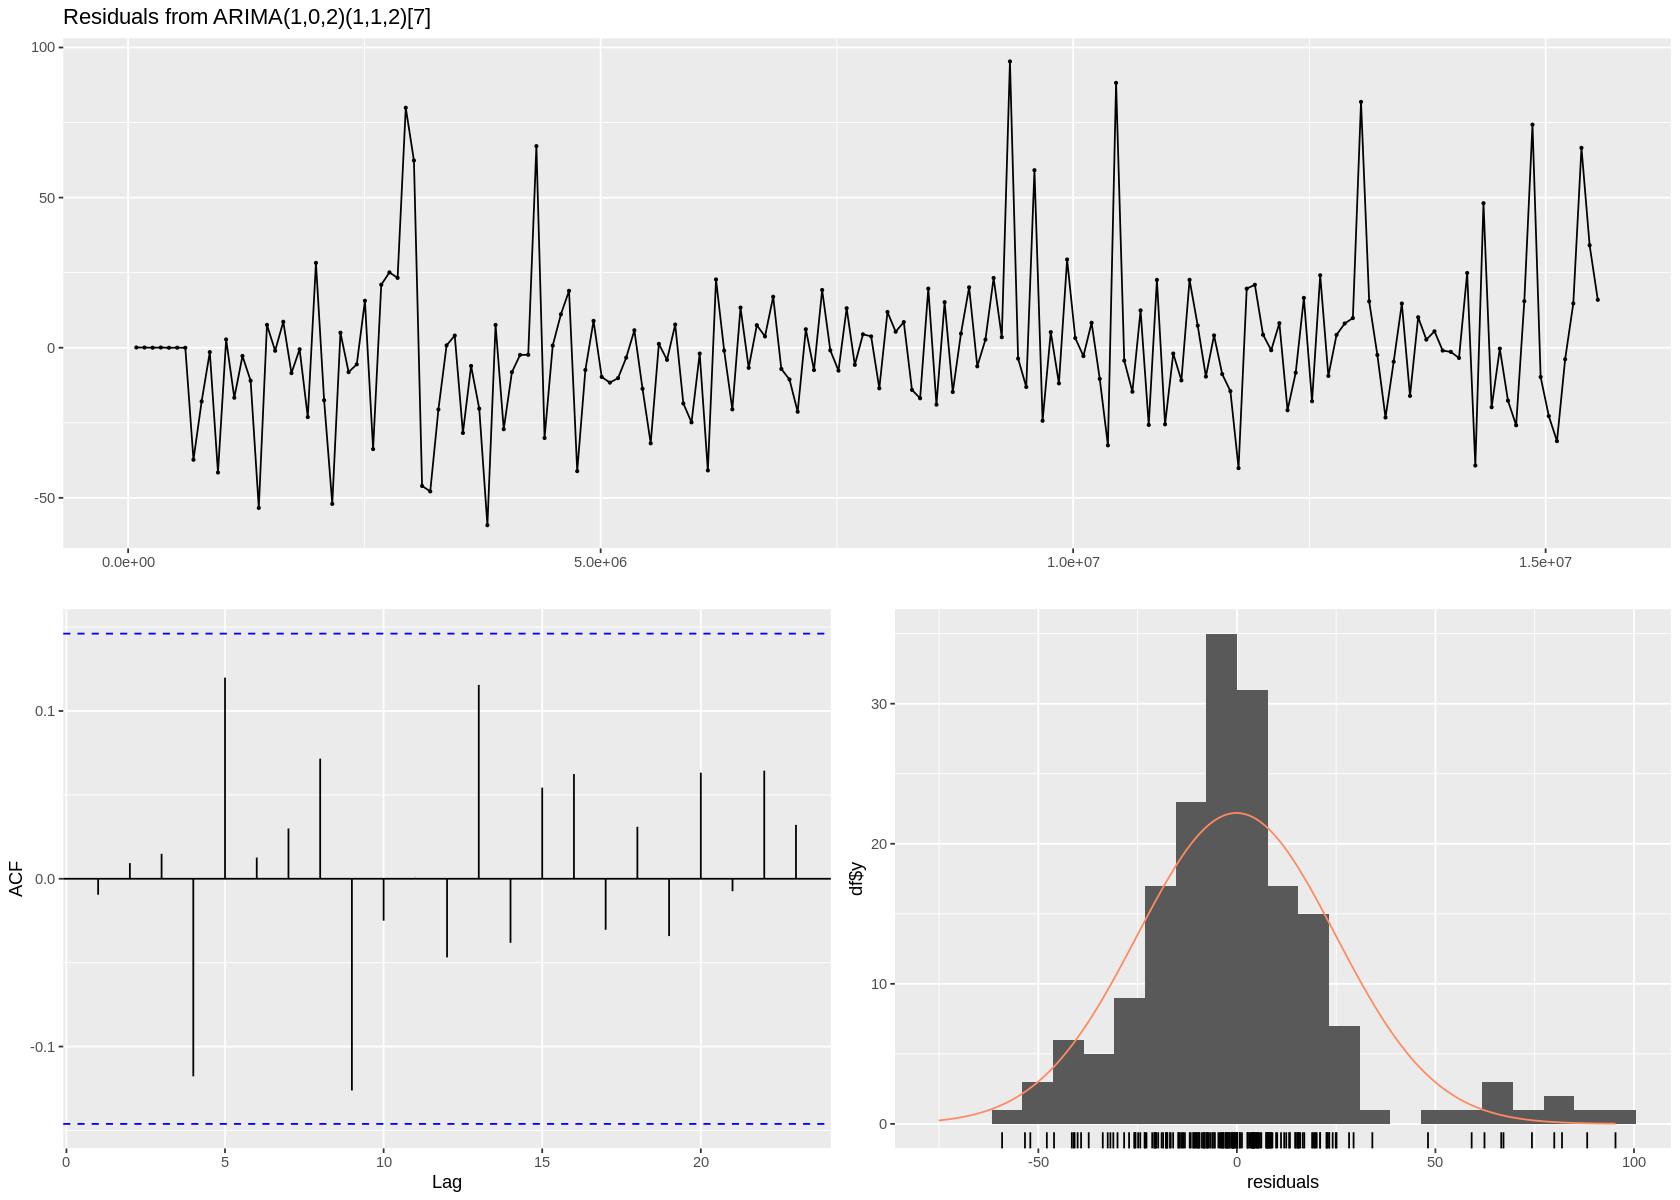

In [95]:
Model.res.s4<-arima(residuals(arima_model), order = c(1, 0, 2),seasonal = list(order = c(1,1,2), period = 7))
adf.test(Model.res.s4$residuals)
summary(Model.res.s4)
checkresiduals(Model.res.s4)

In [97]:
forecast(Model.res.s4,30)

         Point Forecast      Lo 80    Hi 80        Lo 95     Hi 95
15638401     -0.5887201 -33.163268 31.98583 -50.40719239  49.22975
15724801    -10.8825858 -43.577168 21.81200 -60.88463439  39.11946
15811201     17.0487592 -15.931647 50.02917 -33.39041974  67.48794
15897601     27.2960277  -5.815808 60.40786 -23.34415561  77.93621
15984001     11.9183880 -21.254087 45.09086 -38.81453459  62.65131
16070401     41.5530786   8.352582 74.75357  -9.22269892  92.32886
16156801      5.2575033 -27.955951 38.47096 -45.53809181  56.05310
16243201    -11.0012827 -44.257816 22.25525 -61.86276186  39.86020
16329601    -21.9477804 -55.206032 11.31047 -72.81188751  28.91633
16416001     10.3175818 -22.943488 43.57865 -40.55083546  61.18600
16502401     23.4424597  -9.819916 56.70483 -27.42795338  74.31287
16588801     17.8619028 -15.401076 51.12488 -33.00943371  68.73324
16675201     47.1562556  13.892997 80.41951  -3.71550817  98.02802
16761601      7.4034036 -25.859984 40.66679 -43.46855787  58.2

# Evaluation

The appropriate models for each junction are different :
for junction 1 the arima model was the best  since it capture trend and seasonality component.

For junction 2 the best mdel is arima (3,1,3) wich is a combination of arima (3,0,3) with diffeenciation executed manualy

For junction  3 the sarima(1,1,1) is the best model and the most effictive using autoarima since it capture all the information leaving only white noise.

For junction 4 the lack of observation ans the absence of trend and seasonality component made fitting a model difficult with the best mdel being  linear regression using seasonal dummies. However, using SARIMA captures all of the features of the time series

## Sustainable Development Goals (SDGs)




This project aligns with the United Nations Sustainable Development Goals, particularly SDG 9 (Industry, Innovation, and Infrastructure) and SDG 11 (Sustainable Cities and Communities).
By accurately forecasting vehicle counts, city planners and policymakers can better manage traffic, reduce congestion, and minimize environmental impact, contributing to the development of smart and sustainable urban infrastructure.

# Conclusion

By leveraging advanced time series modeling techniques, we have developed a robust framework for forecasting vehicle counts passing threw 4 junction , aiding in the advancement of sustainable urban environments. This project demonstrates the practical application of data science in addressing real-world challenges and contributing to global sustainability efforts.

Here is a summary of the steps and findings throughout the project:

**Data Preparation:**

We started by loading and exploring the time series data, ensuring that the data was properly formatted for anal and splitting it into subsets for each junctions.

**Stationarity and Differencing:**

We applied the Augmented Dickey-Fuller (ADF) test to check for stat, results, differencing was applied to the series to remove trends and make the data stationary.


**Autocorrelation Analysis:**
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots were used to identify the presence of autocorrelation and determine the appropriate order of ARIMA models.


**Model Fitting:**

We fitted several ARIMA and SARIMA models to the time series data, experimenting with different settings for a good fit.


**Model Diagnostics:**

Residual analysis showed that some models had residuals with significant autocorrelation, suggesting the need for further refinement.
The final chosen model showed residuals that were approximately normally distributed with no significant autocorrelation, indicating no additional data missing from interpretaion


**Impact on SDGs**


 The insights from this project can help in making informed decisions for urban planning and infrastructure development, aligning with the goals of creating sustainable and resilient cities.